In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from dateutil.parser import parse

import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
import shapely

from geopy.geocoders import Nominatim

In [2]:
os.listdir()

['boston_bikeshare.csv',
 '.DS_Store',
 'sample_by_date.ipynb',
 'dataset_1.csv',
 '.ipynb_checkpoints',
 'alex_notebook.ipynb',
 '.git',
 'demographics.csv',
 'group_by_hour.ipynb']

In [3]:
df_demographics = pd.read_csv('demographics.csv')

In [4]:
#this dataframe gives info about NYC demographics
df_demographics

nta_name    borough nta_code  \
0                                          Bath Beach   Brooklyn     BK27   
1                                           Bay Ridge   Brooklyn     BK31   
2                                             Bedford   Brooklyn     BK75   
3                                    Bensonhurst East   Brooklyn     BK29   
4                                    Bensonhurst West   Brooklyn     BK28   
5                                        Borough Park   Brooklyn     BK88   
6                                      Brighton Beach   Brooklyn     BK19   
7                        Brooklyn Heights-Cobble Hill   Brooklyn     BK09   
8                                         Brownsville   Brooklyn     BK81   
9                                      Bushwick North   Brooklyn     BK77   
10                                     Bushwick South   Brooklyn     BK78   
11                                           Canarsie   Brooklyn     BK50   
12           Carroll Gardens-Columbia Street-Red Hook   Brooklyn     BK33   
13                                       Clinton Hill   Brooklyn     BK69   
14                                Crown Heights North   Brooklyn     BK61   
15                                Crown Heights South   Brooklyn     BK63   
16                            Cypress Hills-City Line   Brooklyn     BK83   
17   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   Brooklyn     BK38   
18                                      Dyker Heights   Brooklyn     BK30   
19                             East Flatbush-Farragut   Brooklyn     BK91   
20                                      East New York   Brooklyn     BK82   
21                   East New York (Pennsylvania Ave)   Brooklyn     BK85   
22                                  East Williamsburg   Brooklyn     BK90   
23                                            Erasmus   Brooklyn     BK95   
24                                           Flatbush   Brooklyn     BK42   
25                                          Flatlands   Brooklyn     BK58   
26                                        Fort Greene   Brooklyn     BK68   
27     Georgetown-Marine Park-Bergen Beach-Mill Basin   Brooklyn     BK45   
28                                          Gravesend   Brooklyn     BK26   
29                                         Greenpoint   Brooklyn     BK76   
..                                                ...        ...      ...   
165                                      East Tremont  The Bronx     BX17   
166                   Eastchester-Edenwald-Baychester  The Bronx     BX03   
167                                     Fordham South  The Bronx     BX40   
168                                        Highbridge  The Bronx     BX26   
169                                       Hunts Point  The Bronx     BX27   
170                               Kingsbridge Heights  The Bronx     BX30   
171                                          Longwood  The Bronx     BX33   
172                    Melrose South-Mott Haven North  The Bronx     BX34   
173                                Morrisania-Melrose  The Bronx     BX35   
174                            Mott Haven-Port Morris  The Bronx     BX39   
175                                        Mount Hope  The Bronx     BX41   
176               North Riverdale-Fieldston-Riverdale  The Bronx     BX22   
177                                           Norwood  The Bronx     BX43   
178                           park-cemetery-etc-Bronx  The Bronx     BX99   
179                                       Parkchester  The Bronx     BX46   
180               Pelham Bay-Country Club-City Island  The Bronx     BX10   
181                                    Pelham Parkway  The Bronx     BX49   
182                                     Rikers Island  The Bronx     BX98   
183          Schuylerville-Throgs Neck-Edgewater Park  The Bronx     BX52   
184                                Soundview-Bruckner  The Bronx     BX55   
185   Soundview-Castle Hill-Clason Point-

In [5]:
df_boston = pd.read_csv('boston_bikeshare.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_boston.head()

tripduration          starttime           stoptime start_station_id  \
0          1712  11-30-11 23:58:00  12-01-11 00:26:00           D32005   
1           313  11-30-11 23:56:00  12-01-11 00:01:00           C32008   
2          1111  11-30-11 23:18:00  11-30-11 23:36:00           A32009   
3          1313  11-30-11 23:15:00  11-30-11 23:37:00           A32001   
4           345  11-30-11 22:59:00  11-30-11 23:05:00           B32008   

  end_station_id  bikeid  usertype  birthyear  gender  
0         D32011  B00056         1        NaN       1  
1         D32011  B00133         0        NaN       0  
2         D32006  B00471         1        NaN       1  
3         D32005  B00056         1        NaN       1  
4         D32006  B00174         1        NaN       1

In [7]:
age = 2020-df_boston['birthyear']

(10, 100)

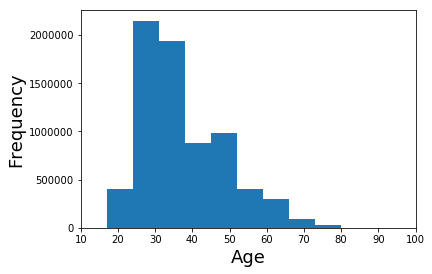

In [16]:
age.plot(kind='hist',bins=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('Boston_age.pdf',format='pdf',dpi=1200)
plt.xlim([10,100])

In [17]:
df_nyc = pd.read_csv('nyc_bikeshare.csv')

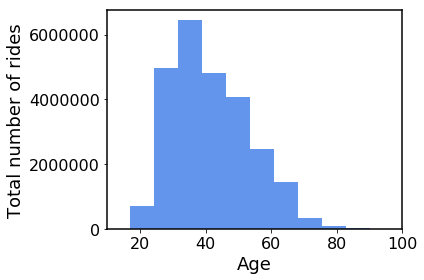

In [338]:
fig, ax = plt.subplots()
age_nyc = 2020-df_nyc['birthyear']
age_nyc.plot(kind='hist',bins=20,color='cornflowerblue')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Total number of rides',fontsize=18)
plt.savefig('Boston_age.pdf',format='pdf',dpi=1200)
[j.set_linewidth(1.5) for j in ax.spines.values()]
ax.tick_params(axis='x',labelsize='16')
ax.tick_params(axis='y',labelsize='16')
plt.xlim([10,100])
plt.tight_layout()
plt.savefig('rides.png',format='png',dpi=400)

In [31]:
def assign_gender(x):
    if x==1:
        return 'Male'
    elif x==2:
        return 'Female'
    else:
        return 'Unknown'
    
def assign_user_type(x):
    if x==1:
        return 'subscriber'
    else:
        return 'customer'

In [24]:
df_nyc['gender'] = df_nyc['gender'].apply(lambda x: assign_gender(x))

In [39]:
gender_distrib = df_nyc.groupby('gender').size().reset_index(name='counts')

In [40]:
print(gender_distrib)

    gender    counts
0   Female   6062687
1     Male  18351569
2  Unknown   2801080


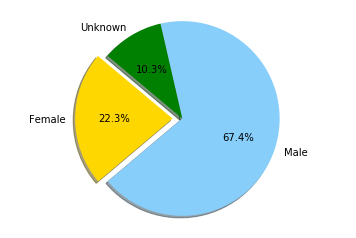

In [334]:
# Data to plot
labels = 'Female', 'Male','Unknown'
sizes = gender_distrib['counts'][0],gender_distrib['counts'][1],gender_distrib['counts'][2]
colors = ['gold',  'lightskyblue','green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('gender_distribution.pdf',format='pdf',dpi=1200)
plt.savefig('gender_distribution.png',format='png',dpi=400)
plt.show()

In [32]:
df_nyc['usertype'] = df_nyc['usertype'].apply(lambda x: assign_user_type(x))

In [33]:
usertype_distrib = df_nyc.groupby('usertype').size().reset_index(name='counts')
print(usertype_distrib)

     usertype    counts
0    customer   3309416
1  subscriber  23905920


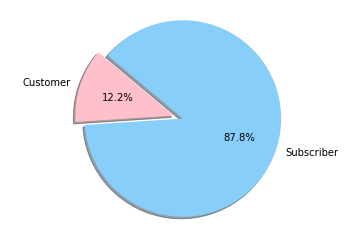

In [336]:
# Data to plot
labels = 'Customer', 'Subscriber',
sizes = usertype_distrib['counts'][0],usertype_distrib['counts'][1],
colors = ['pink',  'lightskyblue',]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('usertype_distribution.pdf',format='pdf',dpi=400)
plt.savefig('usertype_distribution.png',format='png',dpi=400)
plt.show()

In [36]:
df_demographics

nta_name    borough nta_code  \
0                                          Bath Beach   Brooklyn     BK27   
1                                           Bay Ridge   Brooklyn     BK31   
2                                             Bedford   Brooklyn     BK75   
3                                    Bensonhurst East   Brooklyn     BK29   
4                                    Bensonhurst West   Brooklyn     BK28   
5                                        Borough Park   Brooklyn     BK88   
6                                      Brighton Beach   Brooklyn     BK19   
7                        Brooklyn Heights-Cobble Hill   Brooklyn     BK09   
8                                         Brownsville   Brooklyn     BK81   
9                                      Bushwick North   Brooklyn     BK77   
10                                     Bushwick South   Brooklyn     BK78   
11                                           Canarsie   Brooklyn     BK50   
12           Carroll Gardens-Columbia Street-Red Hook   Brooklyn     BK33   
13                                       Clinton Hill   Brooklyn     BK69   
14                                Crown Heights North   Brooklyn     BK61   
15                                Crown Heights South   Brooklyn     BK63   
16                            Cypress Hills-City Line   Brooklyn     BK83   
17   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   Brooklyn     BK38   
18                                      Dyker Heights   Brooklyn     BK30   
19                             East Flatbush-Farragut   Brooklyn     BK91   
20                                      East New York   Brooklyn     BK82   
21                   East New York (Pennsylvania Ave)   Brooklyn     BK85   
22                                  East Williamsburg   Brooklyn     BK90   
23                                            Erasmus   Brooklyn     BK95   
24                                           Flatbush   Brooklyn     BK42   
25                                          Flatlands   Brooklyn     BK58   
26                                        Fort Greene   Brooklyn     BK68   
27     Georgetown-Marine Park-Bergen Beach-Mill Basin   Brooklyn     BK45   
28                                          Gravesend   Brooklyn     BK26   
29                                         Greenpoint   Brooklyn     BK76   
..                                                ...        ...      ...   
165                                      East Tremont  The Bronx     BX17   
166                   Eastchester-Edenwald-Baychester  The Bronx     BX03   
167                                     Fordham South  The Bronx     BX40   
168                                        Highbridge  The Bronx     BX26   
169                                       Hunts Point  The Bronx     BX27   
170                               Kingsbridge Heights  The Bronx     BX30   
171                                          Longwood  The Bronx     BX33   
172                    Melrose South-Mott Haven North  The Bronx     BX34   
173                                Morrisania-Melrose  The Bronx     BX35   
174                            Mott Haven-Port Morris  The Bronx     BX39   
175                                        Mount Hope  The Bronx     BX41   
176               North Riverdale-Fieldston-Riverdale  The Bronx     BX22   
177                                           Norwood  The Bronx     BX43   
178                           park-cemetery-etc-Bronx  The Bronx     BX99   
179                                       Parkchester  The Bronx     BX46   
180               Pelham Bay-Country Club-City Island  The Bronx     BX10   
181                                    Pelham Parkway  The Bronx     BX49   
182                                     Rikers Island  The Bronx     BX98   
183          Schuylerville-Throgs Neck-Edgewater Park  The Bronx     BX52   
184                                Soundview-Bruckner  The Bronx     BX55   
185   Soundview-Castle Hill-Clason Point-

In [37]:
df_nyc.head()

tripduration          starttime           stoptime  start_station_id  \
0          2059  06-01-13 00:00:44  06-01-13 00:35:03             406.0   
1          1521  06-01-13 00:01:22  06-01-13 00:26:43            2008.0   
2          2028  06-01-13 00:01:47  06-01-13 00:35:35             485.0   
3          1829  06-01-13 00:03:47  06-01-13 00:34:16             265.0   
4           899  06-01-13 00:09:25  06-01-13 00:24:24             494.0   

   end_station_id  bikeid    usertype  birthyear   gender  
0           406.0   19599    customer        NaN  Unknown  
1           310.0   15567  subscriber     1983.0     Male  
2           406.0   18445    customer        NaN  Unknown  
3           436.0   15234  subscriber     1984.0     Male  
4           494.0   15539  subscriber     1967.0     Male

In [42]:
df_nyc_key = pd.read_csv('nyc_bikeshare_key.csv')

In [43]:
df_nyc = df_nyc.merge(df_nyc_key,how='left',on=

station_id                     station_name  station_latitude  \
0             72                 W 52 St & 11 Ave         40.767272   
1             79         Franklin St & W Broadway         40.719116   
2             82           St James Pl & Pearl St         40.711174   
3             83    Atlantic Ave & Fort Greene Pl         40.683826   
4            116                  W 17 St & 8 Ave         40.741776   
5            119         Park Ave & St Edwards St         40.696089   
6            120      Lexington Ave & Classon Ave         40.686768   
7            127            Barrow St & Hudson St         40.731724   
8            128         MacDougal St & Prince St         40.727103   
9            137            E 56 St & Madison Ave         40.761628   
10           143        Clinton St & Joralemon St         40.692395   
11           144              Nassau St & Navy St         40.698399   
12           146             Hudson St & Reade St         40.716250   
13           147         Greenwich St & Warren St         40.715422   
14           150                E 2 St & Avenue C         40.720874   
15           151         Cleveland Pl & Spring St         40.722104   
16           152            Warren St & Church St         40.714740   
17           153                  E 40 St & 5 Ave         40.752062   
18           157          Henry St & Atlantic Ave         40.690893   
19           160          E 37 St & Lexington Ave         40.748158   
20           161            LaGuardia Pl & W 3 St         40.729170   
21           164                  E 47 St & 2 Ave         40.753231   
22           167                  E 39 St & 3 Ave         40.748901   
23           168                  W 18 St & 6 Ave         40.739713   
24           173               Broadway & W 49 St         40.760683   
25           174                  E 25 St & 1 Ave         40.738177   
26           195            Liberty St & Broadway         40.709056   
27           212          W 16 St & The High Line         40.743349   
28           216  Columbia Heights & Cranberry St         40.700379   
29           217                    Old Fulton St         40.702772   
...          ...                              ...               ...   
1075        3868    Knickerbocker Ave & Halsey St         40.693000   
1076        3869          Van Buren St & Broadway         40.692000   
1077        3870            Melrose St & Broadway         40.697481   
1078        3871        Bushwick Ave & Furman Ave         40.682810   
1079        3872         Hancock St & Wyckoff Ave         40.697200   
1080        3873         Madison St & Cypress Ave         40.700680   
1081        3874          Menahan St & Seneca Ave         40.704610   
1082        3875          Stephen St & Seneca Ave         40.698800   
1083        3876      Forest Ave & Summerfield St         40.699220   
1084        3878          Cypress Ave & George St         40.698120   
1085        3879            Broadway & Madison St         40.688220   
1086        3880   Willoughby Ave & Onderdonk Ave         40.709800   
1087        3881                12 Ave & W 125 St         40.818299   
1088        3882          Norman St & Wyckoff Ave         40.695170   
1089        3883           Harman St & Seneca Ave         40.705770   
1090        3885        Onderdonk Ave & Gates Ave         40.704130   
1091        3886       Menahan St & Onderdonk Ave         40.705530   
1092        3887      Flushing Ave & Woodward Ave         40.712460   
1093        3890              Grove St & Broadway         40.690470   
1094        3891         Irving Ave & Palmetto St         40.698000   
1095        3892                   38 Ave & 29 St         40.754730   
1096        3893     Rockaway Ave & Bainbridge St         40.683200   
1097        3895        Cypress Ave & Palmetto St         40.701573   
1098        3896          Madison St & Seneca Ave         40.701830   
1099        3898              

In [45]:
df_nyc_all = pd.merge(df_nyc, df_nyc_key, left_on='start_station_id', right_on='station_id')

In [46]:
df_nyc_all.head()

tripduration          starttime           stoptime  start_station_id  \
0          2059  06-01-13 00:00:44  06-01-13 00:35:03             406.0   
1           977  06-01-13 03:26:18  06-01-13 03:42:35             406.0   
2          1344  06-01-13 04:15:42  06-01-13 04:38:06             406.0   
3           636  06-01-13 07:12:30  06-01-13 07:23:06             406.0   
4           572  06-01-13 12:41:51  06-01-13 12:51:23             406.0   

   end_station_id  bikeid    usertype  birthyear   gender  station_id  \
0           406.0   19599    customer        NaN  Unknown         406   
1           463.0   20194  subscriber     1988.0     Male         406   
2           150.0   17621  subscriber     1989.0     Male         406   
3           216.0   19599  subscriber     1968.0     Male         406   
4           217.0   15874  subscriber     1963.0     Male         406   

             station_name  station_latitude  station_longitude  
0  Hicks St & Montague St         40.695128         -73.995951  
1  Hicks St & Montague St         40.695128         -73.995951  
2  Hicks St & Montague St         40.695128         -73.995951  
3  Hicks St & Montague St         40.695128         -73.995951  
4  Hicks St & Montague St         40.695128         -73.995951

In [47]:
# groupby most popular stations...

station_distrib = df_nyc_all.groupby('station_name').size().reset_index(name='counts')

In [81]:
most_popular_stations = station_distrib.sort_values(by='counts').iloc[-20:]

In [82]:
most_popular_stations['station_name'].values

array(['Central Park S & 6 Ave', 'W 18 St & 6 Ave', 'W 38 St & 8 Ave',
       'W 31 St & 7 Ave', 'University Pl & E 14 St', '12 Ave & W 40 St',
       'Carmine St & 6 Ave', 'Christopher St & Greenwich St',
       'Broadway & W 60 St', 'Cleveland Pl & Spring St',
       'W 41 St & 8 Ave', 'W 20 St & 11 Ave', '8 Ave & W 33 St',
       'Lafayette St & E 8 St', 'Broadway & E 14 St',
       'West St & Chambers St', 'Broadway & E 22 St', 'W 21 St & 6 Ave',
       'E 17 St & Broadway', 'Pershing Square North'], dtype=object)

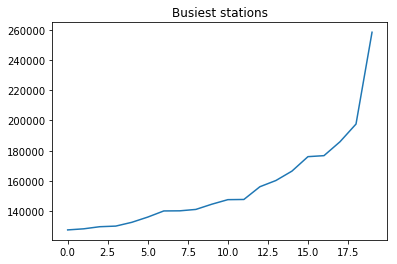

In [83]:
plt.plot(most_popular_stations['counts'].values)
plt.title("Busiest stations")

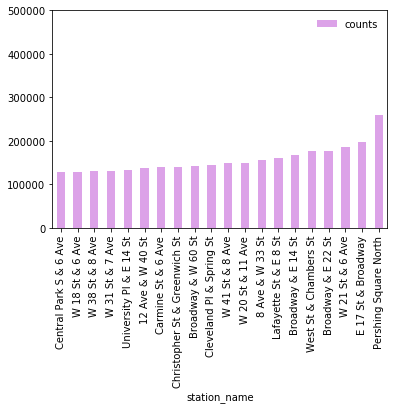

In [339]:
most_popular_stations.plot.bar(x='station_name',y='counts',color='#dca2e8')
plt.legend(frameon=False)
plt.ylim([0,500000])
plt.savefig('Busiest_stations.pdf',format='pdf',dpi=1200)
plt.savefig('Busiest_stations.png',format='png',dpi=400)

In [87]:
df_demographics

nta_name    borough nta_code  \
0                                          Bath Beach   Brooklyn     BK27   
1                                           Bay Ridge   Brooklyn     BK31   
2                                             Bedford   Brooklyn     BK75   
3                                    Bensonhurst East   Brooklyn     BK29   
4                                    Bensonhurst West   Brooklyn     BK28   
5                                        Borough Park   Brooklyn     BK88   
6                                      Brighton Beach   Brooklyn     BK19   
7                        Brooklyn Heights-Cobble Hill   Brooklyn     BK09   
8                                         Brownsville   Brooklyn     BK81   
9                                      Bushwick North   Brooklyn     BK77   
10                                     Bushwick South   Brooklyn     BK78   
11                                           Canarsie   Brooklyn     BK50   
12           Carroll Gardens-Columbia Street-Red Hook   Brooklyn     BK33   
13                                       Clinton Hill   Brooklyn     BK69   
14                                Crown Heights North   Brooklyn     BK61   
15                                Crown Heights South   Brooklyn     BK63   
16                            Cypress Hills-City Line   Brooklyn     BK83   
17   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   Brooklyn     BK38   
18                                      Dyker Heights   Brooklyn     BK30   
19                             East Flatbush-Farragut   Brooklyn     BK91   
20                                      East New York   Brooklyn     BK82   
21                   East New York (Pennsylvania Ave)   Brooklyn     BK85   
22                                  East Williamsburg   Brooklyn     BK90   
23                                            Erasmus   Brooklyn     BK95   
24                                           Flatbush   Brooklyn     BK42   
25                                          Flatlands   Brooklyn     BK58   
26                                        Fort Greene   Brooklyn     BK68   
27     Georgetown-Marine Park-Bergen Beach-Mill Basin   Brooklyn     BK45   
28                                          Gravesend   Brooklyn     BK26   
29                                         Greenpoint   Brooklyn     BK76   
..                                                ...        ...      ...   
165                                      East Tremont  The Bronx     BX17   
166                   Eastchester-Edenwald-Baychester  The Bronx     BX03   
167                                     Fordham South  The Bronx     BX40   
168                                        Highbridge  The Bronx     BX26   
169                                       Hunts Point  The Bronx     BX27   
170                               Kingsbridge Heights  The Bronx     BX30   
171                                          Longwood  The Bronx     BX33   
172                    Melrose South-Mott Haven North  The Bronx     BX34   
173                                Morrisania-Melrose  The Bronx     BX35   
174                            Mott Haven-Port Morris  The Bronx     BX39   
175                                        Mount Hope  The Bronx     BX41   
176               North Riverdale-Fieldston-Riverdale  The Bronx     BX22   
177                                           Norwood  The Bronx     BX43   
178                           park-cemetery-etc-Bronx  The Bronx     BX99   
179                                       Parkchester  The Bronx     BX46   
180               Pelham Bay-Country Club-City Island  The Bronx     BX10   
181                                    Pelham Parkway  The Bronx     BX49   
182                                     Rikers Island  The Bronx     BX98   
183          Schuylerville-Throgs Neck-Edgewater Park  The Bronx     BX52   
184                                Soundview-Bruckner  The Bronx     BX55   
185   Soundview-Castle Hill-Clason Point-

In [88]:
os.listdir()

['boston_bikeshare.csv',
 '.DS_Store',
 'sf_bikeshare.csv',
 'sample_by_date.ipynb',
 'usertype_distribution.pdf',
 'nyc_bikeshare_key.csv',
 'Boston_age.pdf',
 'dataset_1.csv',
 '.ipynb_checkpoints',
 'nyc_bikeshare.csv',
 'alex_notebook.ipynb',
 '.git',
 'demographics.csv',
 'group_by_hour.ipynb',
 'gender_distribution.pdf']

In [90]:
df_nyc_all

tripduration          starttime           stoptime  \
0                 2059  06-01-13 00:00:44  06-01-13 00:35:03   
1                  977  06-01-13 03:26:18  06-01-13 03:42:35   
2                 1344  06-01-13 04:15:42  06-01-13 04:38:06   
3                  636  06-01-13 07:12:30  06-01-13 07:23:06   
4                  572  06-01-13 12:41:51  06-01-13 12:51:23   
5                 1568  06-01-13 16:28:03  06-01-13 16:54:11   
6                  982  06-01-13 17:40:57  06-01-13 17:57:19   
7                 1147  06-01-13 21:25:26  06-01-13 21:44:33   
8                  648  06-02-13 01:04:07  06-02-13 01:14:55   
9                  511  06-02-13 02:21:38  06-02-13 02:30:09   
10                1660  06-02-13 10:39:41  06-02-13 11:07:21   
11                 679  06-02-13 11:46:44  06-02-13 11:58:03   
12                 496  06-02-13 12:01:29  06-02-13 12:09:45   
13                1035  06-02-13 12:03:36  06-02-13 12:20:51   
14                1518  06-02-13 12:26:55  06-02-13 12:52:13   
15                 478  06-02-13 12:37:59  06-02-13 12:45:57   
16                 758  06-02-13 13:02:24  06-02-13 13:15:02   
17                 517  06-02-13 13:22:12  06-02-13 13:30:49   
18                 950  06-02-13 13:30:17  06-02-13 13:46:07   
19                 771  06-02-13 13:33:03  06-02-13 13:45:54   
20                1256  06-02-13 13:39:19  06-02-13 14:00:15   
21                 578  06-02-13 14:34:36  06-02-13 14:44:14   
22                2477  06-02-13 15:05:18  06-02-13 15:46:35   
23                4962  06-02-13 15:17:11  06-02-13 16:39:53   
24                 767  06-02-13 15:34:06  06-02-13 15:46:53   
25                1265  06-02-13 15:46:49  06-02-13 16:07:54   
26                 670  06-02-13 16:01:50  06-02-13 16:13:00   
27                 985  06-02-13 16:13:36  06-02-13 16:30:01   
28                1605  06-02-13 16:24:15  06-02-13 16:51:00   
29                 450  06-02-13 16:30:39  06-02-13 16:38:09   
...                ...                ...                ...   
27214491           941  11-28-19 15:21:35  11-28-19 15:37:16   
27214492           887  11-28-19 15:22:04  11-28-19 15:36:52   
27214493           659  11-28-19 16:17:59  11-28-19 16:28:58   
27214494           254  11-29-19 09:37:04  11-29-19 09:41:19   
27214495           428  11-29-19 10:02:18  11-29-19 10:09:27   
27214496           306  11-29-19 11:24:47  11-29-19 11:29:53   
27214497          1568  11-29-19 12:00:36  11-29-19 12:26:44   
27214498           842  11-29-19 13:05:35  11-29-19 13:19:38   
27214499          1693  11-29-19 13:10:08  11-29-19 13:38:22   
27214500          1279  11-29-19 14:09:28  11-29-19 14:30:47   
27214501            98  11-29-19 14:20:44  11-29-19 14:22:23   
27214502           215  11-29-19 16:51:08  11-29-19 16:54:44   
27214503            87  11-29-19 17:21:46  11-29-19 17:23:14   
27214504           110  11-29-19 18:25:48  11-29-19 18:27:39   
27214505           737  11-30-19 11:14:05  11-30-19 11:26:22   
27214506          1347  11-30-19 12:29:10  11-30-19 12:51:38   
27214507          1153  11-30-19 12:45:37  11-30-19 13:04:50   
27214508          1240  11-30-19 12:55:46  11-30-19 13:16:27   
27214509           534  11-30-19 15:05:21  11-30-19 15:14:16   
27214510          1288  11-30-19 15:44:10  11-30-19 16:05:38   
27214511          1207  11-30-19 15:45:21  11-30-19 16:05:29   
27214512           636  11-30-19 15:47:42  11-30-19 15:58:18   
27214513          1458  11-30-19 15:48:55  11-30-19 16:13:13   
27214514          1442  11-30-19 15:48:58  11-30-19 16:13:01   
27214515           238  11-30-19 17:47:13  11-30-19 17:51:12   
27214516          2457  11-30-19 18:03:15  11-30-19 18:44:12   
27214517           117  11-30-19 21:40:29  11-30-19 21:42:27   
27214518           183  11-28-19 06:22:25  11-28-19 06:25:29   
27214519           851  11-29-19 12:46:27  11-29-19 13:00:38   
27214520          4781  11-29-19 18:32:51  11-29-19 19:52:32   

          start_station_id  end_station_i

In [91]:
df_demographics

nta_name   borough nta_code  population  under_5_years  5-9_years  \
0        Bath Beach  Brooklyn     BK27       33163           2210       1826   
1         Bay Ridge  Brooklyn     BK31       79134           5166       4513   
2           Bedford  Brooklyn     BK75       75318           7480       6580   
3  Bensonhurst East  Brooklyn     BK29       64267           4151       3563   
4  Bensonhurst West  Brooklyn     BK28       91646           6498       5162   

   10-14_years  15-19_years  20-24_years  25-29_years  ...  15000_to_24999  \
0         1922         1657         1726         2850  ...            1223   
1         3379         3551         4347         6827  ...            3235   
2         5378         4635         6479         8683  ...            3385   
3         2891         3470         4182         4939  ...            2718   
4         4529         4648         5793         8036  ...            3383   

   25000_to_34999  35000_to_49999  50000_to_74999  75000_to_99999  \
0             927            1290            2074            1352   
1            3047            3542            5570            4108   
2            2509            3124            3706            2269   
3            2185            2655            3898            2558   
4            3246            4036            5117            3428   

   100000_to_149999  150000_to_199999  200000_or_more  median_income  \
0              1758               706             585        58243.0   
1              4827              2497            2775        63539.0   
2              2847              1195            1034        39970.0   
3              2416              1144             844        48097.0   
4              3743              1649            1231        51035.0   

   mean_income  
0      75950.0  
1      86319.0  
2      62616.0  
3      65715.0  
4      70198.0  

[5 rows x 32 columns]

In [105]:
df_geo = pd.read_csv('geographic.csv')

In [106]:
df_geo.head()

BK88       QN52       QN48       QN51       QN27       BX35  \
0 -73.976051 -73.794934 -73.775740 -73.803792 -73.861099 -73.896967   
1  40.631284  40.757806  40.743334  40.775618  40.763673  40.834350   
2 -73.977167 -73.794749 -73.775799 -73.800991 -73.859931 -73.896787   
3  40.630755  40.755636  40.743326  40.775397  40.762209  40.834133   
4 -73.977000 -73.794579 -73.778060 -73.798653 -73.859668 -73.896303   

        BX98       QN07       MN06       QN02  ...       MN25       MN24  \
0 -73.872873 -73.757258 -73.946080 -73.760316  ... -74.000784 -73.992605   
1  40.785983  40.718147  40.821271  40.675118  ...  40.694295  40.724145   
2 -73.872886 -73.755890 -73.946404 -73.758806  ... -74.000960 -73.992634   
3  40.785971  40.716307  40.820580  40.673014  ...  40.694077  40.724065   
4 -73.872983 -73.754702 -73.946720 -73.758598  ... -74.003015 -73.993093   

        MN23       MN13       MN15       MN32       MN33       MN99  \
0 -73.989904 -74.001535 -73.993833 -73.938048 -73.935054 -74.010930   
1  40.734443  40.762653  40.772940  40.780838  40.791695  40.684500   
2 -73.989870 -74.001339 -73.993789 -73.937903 -73.935108 -74.011934   
3  40.733535  40.762217  40.772912  40.780758  40.791658  40.683896   
4 -73.990028 -74.001279 -73.993727 -73.937796 -73.935173 -74.012177   

        QN18       QN29  
0 -73.858726 -73.867911  
1  40.735717  40.744942  
2 -73.858672 -73.867877  
3  40.735627  40.744824  
4 -73.858585 -73.867852  

[5 rows x 195 columns]

In [107]:
### Here I look at the distribution per boroughs
def convert_station_to_borough(longitude,latitude):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-107-9a860d381209>, line 2)

In [108]:
df_nyc_all

tripduration          starttime           stoptime  \
0                 2059  06-01-13 00:00:44  06-01-13 00:35:03   
1                  977  06-01-13 03:26:18  06-01-13 03:42:35   
2                 1344  06-01-13 04:15:42  06-01-13 04:38:06   
3                  636  06-01-13 07:12:30  06-01-13 07:23:06   
4                  572  06-01-13 12:41:51  06-01-13 12:51:23   
5                 1568  06-01-13 16:28:03  06-01-13 16:54:11   
6                  982  06-01-13 17:40:57  06-01-13 17:57:19   
7                 1147  06-01-13 21:25:26  06-01-13 21:44:33   
8                  648  06-02-13 01:04:07  06-02-13 01:14:55   
9                  511  06-02-13 02:21:38  06-02-13 02:30:09   
10                1660  06-02-13 10:39:41  06-02-13 11:07:21   
11                 679  06-02-13 11:46:44  06-02-13 11:58:03   
12                 496  06-02-13 12:01:29  06-02-13 12:09:45   
13                1035  06-02-13 12:03:36  06-02-13 12:20:51   
14                1518  06-02-13 12:26:55  06-02-13 12:52:13   
15                 478  06-02-13 12:37:59  06-02-13 12:45:57   
16                 758  06-02-13 13:02:24  06-02-13 13:15:02   
17                 517  06-02-13 13:22:12  06-02-13 13:30:49   
18                 950  06-02-13 13:30:17  06-02-13 13:46:07   
19                 771  06-02-13 13:33:03  06-02-13 13:45:54   
20                1256  06-02-13 13:39:19  06-02-13 14:00:15   
21                 578  06-02-13 14:34:36  06-02-13 14:44:14   
22                2477  06-02-13 15:05:18  06-02-13 15:46:35   
23                4962  06-02-13 15:17:11  06-02-13 16:39:53   
24                 767  06-02-13 15:34:06  06-02-13 15:46:53   
25                1265  06-02-13 15:46:49  06-02-13 16:07:54   
26                 670  06-02-13 16:01:50  06-02-13 16:13:00   
27                 985  06-02-13 16:13:36  06-02-13 16:30:01   
28                1605  06-02-13 16:24:15  06-02-13 16:51:00   
29                 450  06-02-13 16:30:39  06-02-13 16:38:09   
...                ...                ...                ...   
27214491           941  11-28-19 15:21:35  11-28-19 15:37:16   
27214492           887  11-28-19 15:22:04  11-28-19 15:36:52   
27214493           659  11-28-19 16:17:59  11-28-19 16:28:58   
27214494           254  11-29-19 09:37:04  11-29-19 09:41:19   
27214495           428  11-29-19 10:02:18  11-29-19 10:09:27   
27214496           306  11-29-19 11:24:47  11-29-19 11:29:53   
27214497          1568  11-29-19 12:00:36  11-29-19 12:26:44   
27214498           842  11-29-19 13:05:35  11-29-19 13:19:38   
27214499          1693  11-29-19 13:10:08  11-29-19 13:38:22   
27214500          1279  11-29-19 14:09:28  11-29-19 14:30:47   
27214501            98  11-29-19 14:20:44  11-29-19 14:22:23   
27214502           215  11-29-19 16:51:08  11-29-19 16:54:44   
27214503            87  11-29-19 17:21:46  11-29-19 17:23:14   
27214504           110  11-29-19 18:25:48  11-29-19 18:27:39   
27214505           737  11-30-19 11:14:05  11-30-19 11:26:22   
27214506          1347  11-30-19 12:29:10  11-30-19 12:51:38   
27214507          1153  11-30-19 12:45:37  11-30-19 13:04:50   
27214508          1240  11-30-19 12:55:46  11-30-19 13:16:27   
27214509           534  11-30-19 15:05:21  11-30-19 15:14:16   
27214510          1288  11-30-19 15:44:10  11-30-19 16:05:38   
27214511          1207  11-30-19 15:45:21  11-30-19 16:05:29   
27214512           636  11-30-19 15:47:42  11-30-19 15:58:18   
27214513          1458  11-30-19 15:48:55  11-30-19 16:13:13   
27214514          1442  11-30-19 15:48:58  11-30-19 16:13:01   
27214515           238  11-30-19 17:47:13  11-30-19 17:51:12   
27214516          2457  11-30-19 18:03:15  11-30-19 18:44:12   
27214517           117  11-30-19 21:40:29  11-30-19 21:42:27   
27214518           183  11-28-19 06:22:25  11-28-19 06:25:29   
27214519           851  11-29-19 12:46:27  11-29-19 13:00:38   
27214520          4781  11-29-19 18:32:51  11-29-19 19:52:32   

          start_station_id  end_station_i

In [134]:
import matplotlib.path as mplPath


crd = np.array([[0,0], [0,1], [1,1], [1,0]])# poly
bbPath = mplPath.Path(crd)
pnts = [[0.0, 0.0],[1,1],[0.0,0.5],[0.5,0.0]] # points on edges
r = 0.001 # accuracy
isIn = [ bbPath.contains_point(pnt,radius=r) or bbPath.contains_point(pnt,radius=-r) for pnt in pnts]

In [135]:
isIn

[True, True, True, True]

In [140]:
def is_in_polygon(x,y,polygon):
    # p is a list of points
    #pass the polygon as a list of lists, each of two coordinates
    polygon = np.array([[0,0], [0,1], [1,1], [1,0]])# poly
    bbPath = mplPath.Path(polygon)
    pnts = [[x,y]] # points on edges
    r = 0.001 # accuracy
    isIn = [ bbPath.contains_point(pnt,radius=r) or bbPath.contains_point(pnt,radius=-r) for pnt in pnts]
    return isIn[0]

is_in_polygon(0.23,0.23,[])

True

In [ ]:
def coordinate_to_nta(df_geo):
    

In [138]:
latitudes = df_nyc_all['station_latitude'].values
longitudes = df_nyc_all['station_longitude'].values

In [117]:
for x,y in zip(latitudes,longitudes):
    print()

IndentationError: expected an indented block (<ipython-input-117-10d02678389e>, line 2)

In [142]:
df_nyc_all.head()

tripduration          starttime           stoptime  start_station_id  \
0          2059  06-01-13 00:00:44  06-01-13 00:35:03             406.0   
1           977  06-01-13 03:26:18  06-01-13 03:42:35             406.0   
2          1344  06-01-13 04:15:42  06-01-13 04:38:06             406.0   
3           636  06-01-13 07:12:30  06-01-13 07:23:06             406.0   
4           572  06-01-13 12:41:51  06-01-13 12:51:23             406.0   

   end_station_id  bikeid    usertype  birthyear   gender  station_id  \
0           406.0   19599    customer        NaN  Unknown         406   
1           463.0   20194  subscriber     1988.0     Male         406   
2           150.0   17621  subscriber     1989.0     Male         406   
3           216.0   19599  subscriber     1968.0     Male         406   
4           217.0   15874  subscriber     1963.0     Male         406   

             station_name  station_latitude  station_longitude  
0  Hicks St & Montague St         40.695128         -73.995951  
1  Hicks St & Montague St         40.695128         -73.995951  
2  Hicks St & Montague St         40.695128         -73.995951  
3  Hicks St & Montague St         40.695128         -73.995951  
4  Hicks St & Montague St         40.695128         -73.995951

In [152]:
df_geo = pd.read_csv('geographic.csv')

In [162]:
lats = df_geo.iloc[::2].mean() 

In [163]:
longs = df_geo.iloc[1::2].mean() 

In [173]:
centres = []
for x,y in zip(lats,longs):
    centres.append([x,y])

In [175]:
nta_codes = np.array(lats.reset_index()['index'])

In [197]:
df_codes = pd.DataFrame({'nta_codes':nta_codes,'latitude':longs.values,'longitude':lats.values})

In [199]:
df_nyc_all

tripduration          starttime           stoptime  \
0                 2059  06-01-13 00:00:44  06-01-13 00:35:03   
1                  977  06-01-13 03:26:18  06-01-13 03:42:35   
2                 1344  06-01-13 04:15:42  06-01-13 04:38:06   
3                  636  06-01-13 07:12:30  06-01-13 07:23:06   
4                  572  06-01-13 12:41:51  06-01-13 12:51:23   
5                 1568  06-01-13 16:28:03  06-01-13 16:54:11   
6                  982  06-01-13 17:40:57  06-01-13 17:57:19   
7                 1147  06-01-13 21:25:26  06-01-13 21:44:33   
8                  648  06-02-13 01:04:07  06-02-13 01:14:55   
9                  511  06-02-13 02:21:38  06-02-13 02:30:09   
10                1660  06-02-13 10:39:41  06-02-13 11:07:21   
11                 679  06-02-13 11:46:44  06-02-13 11:58:03   
12                 496  06-02-13 12:01:29  06-02-13 12:09:45   
13                1035  06-02-13 12:03:36  06-02-13 12:20:51   
14                1518  06-02-13 12:26:55  06-02-13 12:52:13   
15                 478  06-02-13 12:37:59  06-02-13 12:45:57   
16                 758  06-02-13 13:02:24  06-02-13 13:15:02   
17                 517  06-02-13 13:22:12  06-02-13 13:30:49   
18                 950  06-02-13 13:30:17  06-02-13 13:46:07   
19                 771  06-02-13 13:33:03  06-02-13 13:45:54   
20                1256  06-02-13 13:39:19  06-02-13 14:00:15   
21                 578  06-02-13 14:34:36  06-02-13 14:44:14   
22                2477  06-02-13 15:05:18  06-02-13 15:46:35   
23                4962  06-02-13 15:17:11  06-02-13 16:39:53   
24                 767  06-02-13 15:34:06  06-02-13 15:46:53   
25                1265  06-02-13 15:46:49  06-02-13 16:07:54   
26                 670  06-02-13 16:01:50  06-02-13 16:13:00   
27                 985  06-02-13 16:13:36  06-02-13 16:30:01   
28                1605  06-02-13 16:24:15  06-02-13 16:51:00   
29                 450  06-02-13 16:30:39  06-02-13 16:38:09   
...                ...                ...                ...   
27214491           941  11-28-19 15:21:35  11-28-19 15:37:16   
27214492           887  11-28-19 15:22:04  11-28-19 15:36:52   
27214493           659  11-28-19 16:17:59  11-28-19 16:28:58   
27214494           254  11-29-19 09:37:04  11-29-19 09:41:19   
27214495           428  11-29-19 10:02:18  11-29-19 10:09:27   
27214496           306  11-29-19 11:24:47  11-29-19 11:29:53   
27214497          1568  11-29-19 12:00:36  11-29-19 12:26:44   
27214498           842  11-29-19 13:05:35  11-29-19 13:19:38   
27214499          1693  11-29-19 13:10:08  11-29-19 13:38:22   
27214500          1279  11-29-19 14:09:28  11-29-19 14:30:47   
27214501            98  11-29-19 14:20:44  11-29-19 14:22:23   
27214502           215  11-29-19 16:51:08  11-29-19 16:54:44   
27214503            87  11-29-19 17:21:46  11-29-19 17:23:14   
27214504           110  11-29-19 18:25:48  11-29-19 18:27:39   
27214505           737  11-30-19 11:14:05  11-30-19 11:26:22   
27214506          1347  11-30-19 12:29:10  11-30-19 12:51:38   
27214507          1153  11-30-19 12:45:37  11-30-19 13:04:50   
27214508          1240  11-30-19 12:55:46  11-30-19 13:16:27   
27214509           534  11-30-19 15:05:21  11-30-19 15:14:16   
27214510          1288  11-30-19 15:44:10  11-30-19 16:05:38   
27214511          1207  11-30-19 15:45:21  11-30-19 16:05:29   
27214512           636  11-30-19 15:47:42  11-30-19 15:58:18   
27214513          1458  11-30-19 15:48:55  11-30-19 16:13:13   
27214514          1442  11-30-19 15:48:58  11-30-19 16:13:01   
27214515           238  11-30-19 17:47:13  11-30-19 17:51:12   
27214516          2457  11-30-19 18:03:15  11-30-19 18:44:12   
27214517           117  11-30-19 21:40:29  11-30-19 21:42:27   
27214518           183  11-28-19 06:22:25  11-28-19 06:25:29   
27214519           851  11-29-19 12:46:27  11-29-19 13:00:38   
27214520          4781  11-29-19 18:32:51  11-29-19 19:52:32   

          start_station_id  end_station_i

In [213]:
def distance(x1,y1,x2,y2):
    return (x1-x2)**2+(y1-y2)**2

def assign_nta_code(x,y):
    closest_dist = 100000
    code = ""
    for index,row in df_codes.iterrows():
        dist = distance(x,y,row.latitude,row.longitude)
        if dist<closest_dist:
            code=row.nta_codes
            closest_dist = dist
    return code
    

In [218]:
assign_nta_code(40.675940,-74.010505)

'BK33'

In [219]:
all_nta_codes = []
for index,row in df_nyc_all.iterrows():
    print(row.station_latitude,row.station_longitude)
    #print(index)
    #all_nta_codes.append(assign_nta_code(row.station_latitude,row.station_longitude))

40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065
40.69512845 -73.99595065


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685
40.70569254 -74.01677685


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988
40.75038009 -73.98338988


KeyboardInterrupt: 

In [217]:
all_nta_codes

['BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 'BK09',
 

In [221]:
df_nyc_subsampled=df_nyc_all.sample(frac=0.00370, replace=False, random_state=1)0.0037037037

In [225]:
#all_nta_codes = []
counter = 0
for index,row in df_nyc_subsampled.iterrows():
    code = assign_nta_code(row.station_latitude,row.station_longitude)
    counter += 1
    print(code,counter)
    all_nta_codes.append(code)

MN23 1
MN22 2
MN14 3
MN27 4
BK37 5
MN19 6
MN22 7
MN21 8
MN23 9
MN22 10
MN22 11
MN22 12
MN14 13
MN17 14
BK09 15
MN17 16
MN24 17
MN23 18
BK76 19
MN20 20
MN22 21
MN24 22
MN21 23
MN13 24
MN22 25
BK68 26
MN21 27
MN23 28
BK64 29
MN17 30
BK90 31
MN22 32
MN24 33
MN14 34
BK68 35
MN20 36
MN23 37
BK38 38
MN22 39
MN21 40
MN23 41
MN23 42
MN27 43
MN09 44
BK76 45
MN17 46
MN14 47
MN22 48
MN13 49
MN21 50
MN20 51
MN24 52
MN27 53
MN22 54
MN23 55
QN71 56
MN14 57
MN23 58
MN12 59
MN14 60
MN21 61
MN22 62
MN40 63
MN21 64
MN22 65
MN17 66
MN24 67
MN22 68
BK72 69
BK73 70
MN17 71
MN21 72
MN17 73
MN19 74
BK69 75
BK69 76
MN17 77
MN22 78
MN50 79
MN21 80
BK76 81
MN22 82
MN17 83
BK73 84
MN24 85
MN13 86
MN14 87
MN14 88
BK76 89
MN17 90
MN22 91
MN14 92
BK68 93
MN21 94
MN17 95
BK38 96
MN24 97
BK40 98
MN23 99
BK09 100
BK64 101
MN17 102
MN31 103
MN19 104
MN40 105
MN21 106
BK73 107
MN17 108
MN17 109
MN17 110
MN21 111
MN21 112
MN20 113
MN27 114
MN27 115
MN14 116
MN22 117
MN22 118
MN40 119
MN23 120
MN24 121
MN17 122
MN17 123
M

MN17 931
MN12 932
BK90 933
MN14 934
MN21 935
MN17 936
MN24 937
MN17 938
MN17 939
MN27 940
MN24 941
MN20 942
MN22 943
MN21 944
MN24 945
MN12 946
BK76 947
MN13 948
MN21 949
MN22 950
MN19 951
MN22 952
MN17 953
MN23 954
MN25 955
MN17 956
BK64 957
MN15 958
BK37 959
BK75 960
MN23 961
MN40 962
MN17 963
MN14 964
MN23 965
MN15 966
BK68 967
MN25 968
BK75 969
MN15 970
MN21 971
MN22 972
MN15 973
MN21 974
MN22 975
MN28 976
MN21 977
MN23 978
MN23 979
MN23 980
BK09 981
MN20 982
MN17 983
MN13 984
MN17 985
MN12 986
BK09 987
QN68 988
BK64 989
MN22 990
MN17 991
MN19 992
MN33 993
MN19 994
MN24 995
BK64 996
MN19 997
MN17 998
MN24 999
MN40 1000
QN71 1001
MN24 1002
BK73 1003
MN17 1004
MN12 1005
MN12 1006
BK69 1007
MN13 1008
MN25 1009
MN17 1010
MN40 1011
MN13 1012
BK38 1013
MN34 1014
MN17 1015
MN17 1016
MN24 1017
MN20 1018
MN17 1019
MN15 1020
MN21 1021
MN40 1022
MN40 1023
MN40 1024
BK73 1025
MN24 1026
BK37 1027
BK64 1028
MN17 1029
MN22 1030
MN17 1031
MN21 1032
MN23 1033
MN17 1034
BK76 1035
MN24 1036
MN20 1037

MN13 1765
MN22 1766
MN14 1767
MN21 1768
MN22 1769
MN20 1770
MN22 1771
BK73 1772
MN17 1773
MN22 1774
BK38 1775
BK37 1776
MN21 1777
MN17 1778
MN23 1779
MN13 1780
MN21 1781
MN17 1782
MN13 1783
MN22 1784
BK68 1785
MN19 1786
MN21 1787
MN22 1788
MN23 1789
MN25 1790
MN15 1791
MN21 1792
MN21 1793
MN23 1794
MN24 1795
MN50 1796
MN99 1797
MN28 1798
MN12 1799
MN24 1800
MN24 1801
MN24 1802
MN22 1803
MN17 1804
MN21 1805
MN22 1806
BK38 1807
MN22 1808
MN24 1809
MN22 1810
MN20 1811
MN40 1812
MN22 1813
MN17 1814
MN24 1815
MN17 1816
MN22 1817
MN20 1818
MN24 1819
MN19 1820
MN14 1821
MN24 1822
MN23 1823
MN23 1824
MN22 1825
BK69 1826
MN24 1827
MN21 1828
BK64 1829
MN12 1830
MN13 1831
MN23 1832
MN20 1833
MN19 1834
MN23 1835
MN40 1836
MN17 1837
MN22 1838
MN19 1839
BK90 1840
MN17 1841
MN17 1842
MN20 1843
MN21 1844
MN24 1845
MN17 1846
BK09 1847
MN23 1848
MN23 1849
MN25 1850
BK68 1851
MN50 1852
MN21 1853
MN27 1854
MN21 1855
MN21 1856
MN24 1857
MN22 1858
MN09 1859
BK38 1860
MN40 1861
MN15 1862
QN70 1863
MN13 1864


MN22 2588
BK09 2589
MN33 2590
MN22 2591
MN17 2592
MN13 2593
MN17 2594
MN17 2595
BK68 2596
MN40 2597
BK76 2598
MN21 2599
BK68 2600
BK09 2601
MN22 2602
MN13 2603
MN21 2604
MN23 2605
MN22 2606
BK37 2607
MN17 2608
BK64 2609
MN20 2610
MN24 2611
MN13 2612
MN11 2613
MN17 2614
MN23 2615
MN28 2616
MN13 2617
MN22 2618
BK68 2619
MN17 2620
MN19 2621
MN24 2622
MN22 2623
BK69 2624
MN13 2625
MN40 2626
MN21 2627
BK33 2628
MN24 2629
MN17 2630
MN27 2631
MN50 2632
MN40 2633
BK69 2634
MN12 2635
MN21 2636
MN40 2637
BK69 2638
MN17 2639
MN40 2640
MN22 2641
MN24 2642
MN14 2643
MN22 2644
MN21 2645
MN23 2646
MN22 2647
MN12 2648
MN27 2649
MN27 2650
MN19 2651
MN40 2652
MN17 2653
MN22 2654
MN31 2655
MN23 2656
MN19 2657
MN50 2658
MN24 2659
MN14 2660
MN40 2661
MN24 2662
MN17 2663
BK38 2664
MN32 2665
MN22 2666
MN15 2667
MN21 2668
MN17 2669
MN17 2670
MN21 2671
MN17 2672
MN21 2673
MN13 2674
MN13 2675
MN21 2676
BK76 2677
MN22 2678
MN21 2679
BK73 2680
BK73 2681
MN15 2682
MN40 2683
MN17 2684
MN13 2685
MN27 2686
MN24 2687


MN23 3415
MN17 3416
MN17 3417
MN22 3418
MN21 3419
MN34 3420
MN17 3421
MN23 3422
MN15 3423
MN22 3424
BK38 3425
BK76 3426
MN17 3427
MN25 3428
MN17 3429
BK73 3430
BK09 3431
BK09 3432
MN17 3433
BK64 3434
MN13 3435
MN22 3436
MN33 3437
MN13 3438
MN27 3439
MN21 3440
MN13 3441
MN17 3442
MN22 3443
BK76 3444
MN13 3445
MN19 3446
MN19 3447
MN31 3448
MN24 3449
MN24 3450
MN19 3451
MN21 3452
BK76 3453
MN22 3454
MN21 3455
MN27 3456
BK38 3457
MN34 3458
MN27 3459
MN21 3460
MN13 3461
BK73 3462
BK61 3463
MN13 3464
MN19 3465
MN27 3466
MN40 3467
BK68 3468
MN27 3469
MN17 3470
BK76 3471
BK35 3472
MN22 3473
MN23 3474
BK37 3475
MN15 3476
MN22 3477
MN24 3478
MN13 3479
BK69 3480
MN15 3481
MN12 3482
MN22 3483
MN22 3484
MN23 3485
BK73 3486
MN13 3487
MN14 3488
MN27 3489
MN12 3490
MN40 3491
MN24 3492
MN19 3493
BK68 3494
BK73 3495
MN24 3496
MN15 3497
MN22 3498
MN22 3499
MN17 3500
MN21 3501
MN19 3502
MN24 3503
MN22 3504
BK69 3505
MN27 3506
MN17 3507
BK69 3508
MN21 3509
MN12 3510
MN17 3511
BK73 3512
BK09 3513
MN11 3514


MN23 4242
MN22 4243
MN17 4244
MN24 4245
MN17 4246
BK68 4247
MN25 4248
MN13 4249
MN13 4250
MN22 4251
MN50 4252
MN21 4253
MN25 4254
MN17 4255
MN21 4256
MN22 4257
BK68 4258
MN99 4259
MN27 4260
MN24 4261
MN13 4262
MN24 4263
MN24 4264
MN17 4265
BK73 4266
MN28 4267
MN24 4268
MN17 4269
MN15 4270
MN24 4271
BK68 4272
BK76 4273
MN17 4274
MN23 4275
BK37 4276
MN21 4277
MN33 4278
MN24 4279
MN31 4280
MN22 4281
MN12 4282
MN22 4283
BK69 4284
MN25 4285
MN17 4286
MN13 4287
MN22 4288
MN17 4289
MN12 4290
MN24 4291
MN40 4292
MN22 4293
MN23 4294
MN17 4295
MN17 4296
MN32 4297
MN27 4298
BK73 4299
MN27 4300
MN23 4301
MN24 4302
MN22 4303
MN17 4304
MN21 4305
MN22 4306
MN13 4307
MN19 4308
MN14 4309
MN40 4310
MN23 4311
MN17 4312
MN11 4313
MN25 4314
MN17 4315
MN13 4316
MN23 4317
MN17 4318
MN27 4319
MN40 4320
MN19 4321
MN13 4322
MN17 4323
MN24 4324
MN15 4325
MN20 4326
BK38 4327
MN28 4328
MN22 4329
MN21 4330
MN21 4331
MN12 4332
MN27 4333
MN23 4334
MN21 4335
MN24 4336
MN13 4337
MN19 4338
BK68 4339
MN14 4340
MN19 4341


MN21 5066
MN12 5067
MN24 5068
MN13 5069
MN22 5070
MN13 5071
MN15 5072
MN17 5073
MN27 5074
MN17 5075
MN22 5076
MN24 5077
MN13 5078
MN17 5079
BK73 5080
BK73 5081
MN21 5082
MN09 5083
MN25 5084
MN17 5085
BK63 5086
BK64 5087
BK68 5088
MN20 5089
MN20 5090
MN19 5091
MN21 5092
MN17 5093
MN17 5094
MN14 5095
BK38 5096
MN22 5097
MN19 5098
BK68 5099
BK68 5100
MN13 5101
MN21 5102
MN27 5103
MN12 5104
BK33 5105
MN24 5106
MN23 5107
BK38 5108
MN27 5109
MN17 5110
MN21 5111
BK72 5112
MN23 5113
MN17 5114
MN22 5115
MN20 5116
MN27 5117
MN12 5118
MN17 5119
MN23 5120
MN22 5121
BK64 5122
MN17 5123
MN17 5124
MN22 5125
MN24 5126
BK64 5127
MN40 5128
MN17 5129
MN24 5130
BK73 5131
MN27 5132
MN17 5133
MN17 5134
MN27 5135
MN13 5136
MN24 5137
MN27 5138
MN33 5139
MN17 5140
MN14 5141
MN24 5142
MN13 5143
MN21 5144
MN40 5145
MN12 5146
MN21 5147
BK09 5148
MN21 5149
BK09 5150
MN20 5151
MN40 5152
BK37 5153
BK68 5154
MN14 5155
MN22 5156
MN15 5157
MN17 5158
BK33 5159
MN23 5160
MN17 5161
MN21 5162
MN17 5163
BK38 5164
MN22 5165


BK73 5894
BK35 5895
MN22 5896
MN17 5897
MN24 5898
MN20 5899
MN21 5900
MN09 5901
MN24 5902
MN17 5903
MN17 5904
MN22 5905
MN24 5906
MN23 5907
MN17 5908
MN13 5909
MN99 5910
MN19 5911
MN21 5912
MN17 5913
BK09 5914
MN17 5915
MN23 5916
MN24 5917
MN21 5918
MN33 5919
MN22 5920
MN99 5921
MN21 5922
MN21 5923
MN21 5924
MN22 5925
MN17 5926
MN24 5927
MN50 5928
MN24 5929
MN31 5930
MN17 5931
MN13 5932
MN28 5933
MN23 5934
MN24 5935
MN22 5936
MN23 5937
QN68 5938
BK69 5939
MN20 5940
MN13 5941
MN22 5942
MN14 5943
MN21 5944
MN21 5945
MN24 5946
MN28 5947
MN23 5948
MN27 5949
MN21 5950
MN13 5951
MN19 5952
BK68 5953
MN21 5954
MN11 5955
MN27 5956
MN19 5957
MN15 5958
MN22 5959
QN71 5960
MN17 5961
MN11 5962
MN24 5963
MN24 5964
MN22 5965
MN31 5966
MN40 5967
MN50 5968
MN24 5969
MN24 5970
MN22 5971
MN21 5972
MN22 5973
MN31 5974
MN13 5975
MN22 5976
MN15 5977
MN23 5978
MN22 5979
MN28 5980
MN27 5981
MN24 5982
MN19 5983
MN21 5984
MN13 5985
MN27 5986
MN11 5987
MN33 5988
BK90 5989
MN24 5990
MN22 5991
MN22 5992
MN23 5993


MN17 6721
MN14 6722
MN13 6723
MN27 6724
BK68 6725
MN17 6726
BK09 6727
MN17 6728
MN25 6729
MN24 6730
MN24 6731
MN14 6732
MN22 6733
MN22 6734
MN23 6735
MN13 6736
MN23 6737
MN19 6738
BK69 6739
BK38 6740
MN15 6741
MN17 6742
MN27 6743
MN22 6744
MN21 6745
MN33 6746
BK68 6747
MN13 6748
MN17 6749
MN22 6750
MN21 6751
MN13 6752
BK38 6753
MN27 6754
MN21 6755
MN23 6756
BK76 6757
MN17 6758
MN21 6759
MN13 6760
MN22 6761
BK75 6762
MN31 6763
MN33 6764
MN12 6765
MN21 6766
MN17 6767
MN19 6768
MN17 6769
MN13 6770
MN24 6771
MN24 6772
MN15 6773
MN17 6774
BK37 6775
MN25 6776
MN20 6777
MN22 6778
MN24 6779
BK37 6780
BK64 6781
MN17 6782
BK90 6783
MN21 6784
MN21 6785
MN27 6786
MN23 6787
MN27 6788
MN23 6789
BK35 6790
MN23 6791
BK90 6792
MN21 6793
MN22 6794
MN13 6795
MN22 6796
MN22 6797
MN50 6798
MN19 6799
BK40 6800
MN13 6801
MN25 6802
MN13 6803
MN27 6804
MN24 6805
MN17 6806
MN23 6807
BK73 6808
MN40 6809
MN13 6810
MN24 6811
MN40 6812
MN21 6813
MN22 6814
MN24 6815
MN23 6816
MN24 6817
MN14 6818
MN24 6819
MN27 6820


MN17 7544
MN19 7545
BK38 7546
MN50 7547
BK38 7548
MN24 7549
MN22 7550
MN24 7551
BK73 7552
MN17 7553
MN21 7554
MN20 7555
MN22 7556
MN21 7557
MN24 7558
MN23 7559
MN24 7560
MN20 7561
MN13 7562
MN09 7563
MN25 7564
MN15 7565
MN24 7566
MN12 7567
MN40 7568
MN19 7569
MN24 7570
MN14 7571
MN12 7572
MN23 7573
MN14 7574
BK09 7575
MN22 7576
MN22 7577
BK90 7578
MN31 7579
BK38 7580
MN13 7581
MN23 7582
MN14 7583
MN22 7584
MN12 7585
MN13 7586
MN14 7587
MN22 7588
MN21 7589
MN17 7590
MN12 7591
BK09 7592
MN13 7593
MN22 7594
MN23 7595
MN33 7596
BK68 7597
MN22 7598
MN21 7599
MN34 7600
MN22 7601
MN22 7602
MN17 7603
MN14 7604
MN24 7605
QN70 7606
MN17 7607
MN17 7608
MN24 7609
MN13 7610
MN33 7611
MN11 7612
MN24 7613
MN22 7614
MN23 7615
MN23 7616
MN24 7617
MN21 7618
MN13 7619
BK69 7620
MN17 7621
MN22 7622
MN21 7623
MN13 7624
MN23 7625
MN20 7626
BK68 7627
MN14 7628
MN15 7629
MN21 7630
BK73 7631
MN27 7632
MN31 7633
MN14 7634
BK75 7635
MN23 7636
MN23 7637
MN13 7638
MN23 7639
MN23 7640
MN23 7641
MN22 7642
MN21 7643


MN27 8365
MN17 8366
MN13 8367
MN20 8368
BK40 8369
BK76 8370
MN13 8371
MN13 8372
MN19 8373
MN21 8374
MN23 8375
MN14 8376
MN27 8377
BK37 8378
BK38 8379
MN14 8380
MN13 8381
BK09 8382
MN22 8383
BK09 8384
MN22 8385
MN40 8386
MN40 8387
MN24 8388
MN17 8389
MN28 8390
MN22 8391
MN21 8392
BK09 8393
MN21 8394
MN17 8395
MN40 8396
MN17 8397
MN17 8398
MN23 8399
MN24 8400
MN17 8401
MN14 8402
MN22 8403
BK72 8404
MN23 8405
MN22 8406
MN24 8407
BK68 8408
BK09 8409
BK68 8410
MN31 8411
MN22 8412
MN25 8413
MN14 8414
MN27 8415
MN23 8416
MN33 8417
MN50 8418
MN21 8419
MN20 8420
MN17 8421
MN13 8422
MN15 8423
MN21 8424
MN28 8425
MN24 8426
MN19 8427
MN24 8428
MN21 8429
MN20 8430
MN13 8431
MN24 8432
MN17 8433
MN12 8434
BK69 8435
MN23 8436
BK72 8437
MN27 8438
MN20 8439
MN15 8440
MN12 8441
MN27 8442
MN19 8443
MN15 8444
BK09 8445
MN13 8446
MN21 8447
MN40 8448
MN12 8449
QN68 8450
MN21 8451
MN40 8452
MN12 8453
MN17 8454
BK38 8455
MN24 8456
MN24 8457
MN12 8458
MN23 8459
MN13 8460
MN22 8461
MN33 8462
MN17 8463
MN17 8464


MN23 9188
MN17 9189
MN25 9190
BK38 9191
MN13 9192
MN21 9193
MN12 9194
MN17 9195
MN21 9196
BK38 9197
MN14 9198
MN21 9199
MN17 9200
MN23 9201
MN19 9202
MN40 9203
MN22 9204
MN12 9205
MN14 9206
BK68 9207
MN23 9208
BK76 9209
MN19 9210
MN15 9211
MN24 9212
MN17 9213
MN24 9214
MN21 9215
MN24 9216
BK73 9217
MN27 9218
MN15 9219
MN21 9220
MN22 9221
MN19 9222
MN20 9223
MN17 9224
MN09 9225
MN15 9226
MN21 9227
QN71 9228
MN21 9229
MN13 9230
BK69 9231
MN20 9232
MN21 9233
MN21 9234
MN13 9235
MN50 9236
MN21 9237
MN13 9238
MN24 9239
MN24 9240
MN17 9241
MN28 9242
MN24 9243
MN25 9244
MN12 9245
MN27 9246
MN17 9247
MN09 9248
BK68 9249
MN20 9250
MN13 9251
MN24 9252
MN13 9253
MN24 9254
BK09 9255
MN15 9256
MN13 9257
MN24 9258
MN33 9259
MN22 9260
BK72 9261
MN15 9262
MN17 9263
BK09 9264
MN19 9265
MN22 9266
BK68 9267
MN21 9268
BK37 9269
MN23 9270
BK37 9271
QN70 9272
MN13 9273
MN22 9274
MN21 9275
MN24 9276
QN71 9277
MN27 9278
MN22 9279
MN24 9280
MN40 9281
MN28 9282
MN13 9283
MN13 9284
MN13 9285
MN22 9286
MN14 9287


MN24 10010
MN22 10011
MN17 10012
MN17 10013
MN24 10014
MN14 10015
MN24 10016
MN17 10017
MN13 10018
MN17 10019
MN13 10020
MN24 10021
MN12 10022
BK37 10023
MN13 10024
MN40 10025
MN20 10026
MN22 10027
MN14 10028
MN22 10029
MN15 10030
MN27 10031
BK90 10032
MN27 10033
MN17 10034
MN13 10035
MN21 10036
MN28 10037
MN40 10038
MN21 10039
BK38 10040
MN21 10041
MN23 10042
MN17 10043
MN20 10044
MN24 10045
MN20 10046
MN13 10047
BK73 10048
MN19 10049
MN17 10050
MN24 10051
MN21 10052
MN15 10053
MN31 10054
MN15 10055
MN99 10056
MN17 10057
MN21 10058
MN27 10059
MN14 10060
MN24 10061
MN22 10062
MN27 10063
MN12 10064
MN23 10065
MN40 10066
MN17 10067
MN21 10068
MN24 10069
MN17 10070
BK68 10071
MN11 10072
MN27 10073
MN27 10074
MN21 10075
MN27 10076
MN13 10077
MN17 10078
MN25 10079
MN21 10080
MN15 10081
MN15 10082
MN17 10083
MN19 10084
MN19 10085
BK68 10086
BK38 10087
MN24 10088
MN24 10089
MN21 10090
MN17 10091
MN24 10092
MN17 10093
MN17 10094
MN21 10095
MN23 10096
MN22 10097
MN27 10098
MN31 10099
MN13 10100

MN27 10762
MN21 10763
MN22 10764
MN34 10765
MN21 10766
QN68 10767
MN24 10768
MN24 10769
MN31 10770
MN13 10771
BK38 10772
MN21 10773
MN27 10774
MN17 10775
MN23 10776
MN13 10777
MN21 10778
MN27 10779
MN23 10780
MN15 10781
MN17 10782
MN17 10783
BK64 10784
MN22 10785
MN20 10786
MN14 10787
MN21 10788
MN24 10789
MN19 10790
MN27 10791
MN23 10792
MN17 10793
MN13 10794
BK38 10795
MN17 10796
MN24 10797
MN13 10798
BK75 10799
MN19 10800
MN13 10801
MN27 10802
MN40 10803
MN21 10804
MN22 10805
MN14 10806
BK73 10807
MN12 10808
BK09 10809
MN09 10810
MN27 10811
MN13 10812
MN23 10813
MN15 10814
MN24 10815
MN17 10816
MN12 10817
BK09 10818
MN14 10819
MN17 10820
BK73 10821
BK09 10822
MN17 10823
MN27 10824
MN21 10825
BK69 10826
MN13 10827
MN40 10828
QN71 10829
MN23 10830
MN23 10831
MN14 10832
MN13 10833
MN21 10834
MN22 10835
MN13 10836
MN21 10837
MN17 10838
MN24 10839
MN22 10840
MN17 10841
MN23 10842
MN21 10843
MN24 10844
MN40 10845
MN21 10846
MN24 10847
MN27 10848
BK68 10849
BK37 10850
MN17 10851
MN27 10852

MN17 11513
MN17 11514
BK73 11515
MN13 11516
MN17 11517
MN22 11518
MN17 11519
MN23 11520
MN21 11521
MN27 11522
MN12 11523
MN22 11524
MN23 11525
MN20 11526
MN23 11527
MN14 11528
BK38 11529
MN21 11530
MN17 11531
MN13 11532
MN25 11533
MN17 11534
MN24 11535
MN21 11536
MN19 11537
MN15 11538
BK75 11539
BK76 11540
MN22 11541
MN24 11542
MN21 11543
MN21 11544
MN23 11545
MN34 11546
MN24 11547
MN15 11548
MN21 11549
MN21 11550
MN17 11551
MN22 11552
MN34 11553
MN13 11554
BK64 11555
MN13 11556
BK35 11557
MN17 11558
MN17 11559
MN14 11560
MN24 11561
MN17 11562
BK69 11563
MN12 11564
MN22 11565
MN20 11566
MN23 11567
MN24 11568
MN12 11569
MN21 11570
MN20 11571
MN15 11572
MN14 11573
MN17 11574
MN40 11575
BK76 11576
MN13 11577
MN15 11578
BK09 11579
MN22 11580
MN27 11581
MN23 11582
MN14 11583
MN17 11584
MN19 11585
BK38 11586
MN19 11587
MN17 11588
MN14 11589
MN50 11590
MN17 11591
MN21 11592
MN15 11593
MN40 11594
BK38 11595
MN24 11596
BK68 11597
MN13 11598
BK73 11599
MN14 11600
MN22 11601
MN17 11602
MN17 11603

MN17 12259
BK38 12260
MN13 12261
MN17 12262
MN22 12263
MN24 12264
MN27 12265
MN15 12266
MN27 12267
MN24 12268
MN40 12269
BK76 12270
MN40 12271
MN17 12272
MN40 12273
MN17 12274
BK37 12275
MN23 12276
MN22 12277
MN20 12278
MN22 12279
MN20 12280
BK37 12281
MN27 12282
MN13 12283
MN24 12284
MN14 12285
MN23 12286
MN24 12287
MN15 12288
MN17 12289
BK38 12290
MN21 12291
MN22 12292
MN22 12293
MN14 12294
MN21 12295
MN21 12296
BK38 12297
BK75 12298
MN17 12299
MN17 12300
MN17 12301
MN17 12302
MN21 12303
MN21 12304
MN17 12305
BK38 12306
MN40 12307
BK38 12308
MN09 12309
BK68 12310
MN15 12311
MN13 12312
MN15 12313
MN13 12314
MN31 12315
MN19 12316
MN14 12317
MN20 12318
BK72 12319
MN28 12320
MN40 12321
MN22 12322
MN27 12323
MN15 12324
MN21 12325
MN15 12326
MN22 12327
MN23 12328
MN25 12329
MN14 12330
MN17 12331
MN21 12332
MN21 12333
MN22 12334
MN13 12335
MN17 12336
MN21 12337
MN21 12338
MN17 12339
MN20 12340
MN33 12341
MN24 12342
MN22 12343
MN19 12344
BK64 12345
MN17 12346
MN27 12347
MN14 12348
MN24 12349

MN17 13006
MN17 13007
MN13 13008
MN13 13009
BK38 13010
MN21 13011
MN28 13012
MN22 13013
MN50 13014
MN20 13015
MN22 13016
MN22 13017
MN15 13018
MN22 13019
BK73 13020
MN21 13021
BK37 13022
MN13 13023
MN27 13024
BK68 13025
MN23 13026
MN22 13027
MN22 13028
MN24 13029
MN20 13030
MN21 13031
MN19 13032
MN12 13033
MN40 13034
MN23 13035
MN40 13036
MN40 13037
MN23 13038
MN22 13039
MN33 13040
MN40 13041
BK38 13042
MN17 13043
MN22 13044
MN40 13045
BK38 13046
MN23 13047
BK90 13048
QN68 13049
BK38 13050
MN17 13051
MN17 13052
MN19 13053
MN32 13054
MN14 13055
MN19 13056
MN21 13057
MN27 13058
MN09 13059
MN17 13060
MN24 13061
MN22 13062
MN17 13063
MN22 13064
BK73 13065
MN23 13066
MN21 13067
BK33 13068
MN13 13069
MN13 13070
MN22 13071
MN17 13072
MN22 13073
MN13 13074
MN19 13075
MN13 13076
BK73 13077
MN17 13078
MN21 13079
MN23 13080
MN09 13081
MN11 13082
MN23 13083
MN21 13084
MN20 13085
MN50 13086
MN21 13087
MN27 13088
MN24 13089
BK75 13090
MN13 13091
MN21 13092
BK73 13093
BK68 13094
MN23 13095
MN21 13096

MN24 13756
MN15 13757
MN24 13758
MN15 13759
MN24 13760
MN20 13761
QN70 13762
MN24 13763
BK75 13764
MN17 13765
BK64 13766
MN24 13767
MN17 13768
MN40 13769
MN13 13770
MN17 13771
MN24 13772
MN23 13773
MN13 13774
MN21 13775
MN25 13776
MN17 13777
MN21 13778
MN11 13779
MN14 13780
BK38 13781
MN22 13782
MN19 13783
MN13 13784
MN24 13785
MN17 13786
MN11 13787
MN22 13788
MN06 13789
BK64 13790
MN24 13791
MN23 13792
MN21 13793
MN21 13794
BK38 13795
MN21 13796
BK38 13797
MN13 13798
MN20 13799
MN24 13800
BK72 13801
MN23 13802
MN17 13803
MN21 13804
MN15 13805
MN23 13806
MN24 13807
MN23 13808
MN17 13809
MN13 13810
MN21 13811
MN21 13812
MN17 13813
MN27 13814
BK37 13815
MN21 13816
BK61 13817
MN21 13818
MN23 13819
MN24 13820
MN24 13821
MN24 13822
MN17 13823
MN32 13824
MN13 13825
MN21 13826
MN50 13827
BK64 13828
MN14 13829
MN27 13830
BK75 13831
MN25 13832
MN21 13833
MN13 13834
MN20 13835
BK73 13836
MN21 13837
MN19 13838
MN99 13839
MN22 13840
MN21 13841
MN17 13842
MN17 13843
MN22 13844
MN23 13845
MN23 13846

MN40 14501
MN21 14502
MN21 14503
BK69 14504
MN17 14505
MN19 14506
MN17 14507
MN22 14508
MN21 14509
MN33 14510
MN21 14511
MN17 14512
MN14 14513
MN17 14514
MN27 14515
MN24 14516
MN14 14517
BK76 14518
BK68 14519
MN15 14520
MN40 14521
MN19 14522
MN21 14523
MN20 14524
MN27 14525
BK63 14526
MN19 14527
MN22 14528
BK38 14529
MN15 14530
MN15 14531
MN22 14532
MN17 14533
BK68 14534
BK40 14535
MN19 14536
MN23 14537
BK33 14538
MN21 14539
MN12 14540
MN17 14541
MN21 14542
MN14 14543
MN17 14544
MN28 14545
MN23 14546
BK72 14547
MN14 14548
MN21 14549
MN13 14550
MN19 14551
BK35 14552
BK68 14553
MN12 14554
BK73 14555
MN21 14556
BK09 14557
MN27 14558
QN71 14559
MN22 14560
MN21 14561
MN14 14562
BK68 14563
MN27 14564
MN17 14565
BK09 14566
MN21 14567
MN28 14568
BK37 14569
MN15 14570
MN17 14571
MN24 14572
MN14 14573
MN23 14574
MN24 14575
MN13 14576
BK69 14577
MN14 14578
BK09 14579
BK68 14580
MN17 14581
MN13 14582
MN23 14583
BK38 14584
MN24 14585
MN23 14586
MN13 14587
MN24 14588
MN21 14589
MN22 14590
BK90 14591

MN27 15248
MN17 15249
MN14 15250
MN23 15251
MN24 15252
BK72 15253
MN24 15254
MN23 15255
MN23 15256
MN21 15257
MN19 15258
MN19 15259
MN50 15260
MN23 15261
MN22 15262
MN17 15263
MN20 15264
MN24 15265
MN12 15266
MN22 15267
MN24 15268
MN19 15269
MN24 15270
BK37 15271
MN27 15272
QN71 15273
MN14 15274
BK73 15275
MN14 15276
BK64 15277
BK68 15278
MN22 15279
MN23 15280
MN15 15281
BK38 15282
BK68 15283
MN40 15284
MN27 15285
MN13 15286
BK72 15287
BK73 15288
MN23 15289
BK73 15290
MN24 15291
MN17 15292
MN14 15293
MN33 15294
MN15 15295
MN13 15296
MN19 15297
BK73 15298
MN23 15299
BK09 15300
MN22 15301
MN27 15302
MN21 15303
MN20 15304
BK69 15305
MN21 15306
MN25 15307
MN23 15308
MN21 15309
BK68 15310
MN13 15311
MN17 15312
MN24 15313
BK40 15314
MN17 15315
MN24 15316
MN17 15317
MN12 15318
MN17 15319
MN22 15320
BK76 15321
BK72 15322
MN20 15323
MN13 15324
MN27 15325
MN24 15326
MN17 15327
BK75 15328
MN24 15329
MN14 15330
MN24 15331
MN14 15332
MN25 15333
MN15 15334
BK73 15335
MN20 15336
MN13 15337
MN17 15338

MN22 15994
MN21 15995
MN20 15996
BK90 15997
MN22 15998
MN40 15999
MN27 16000
MN14 16001
MN17 16002
MN27 16003
MN15 16004
MN23 16005
QN68 16006
MN24 16007
MN99 16008
MN22 16009
MN15 16010
MN20 16011
BK68 16012
MN21 16013
MN21 16014
MN21 16015
MN13 16016
BK72 16017
MN21 16018
MN22 16019
MN24 16020
MN20 16021
MN34 16022
MN17 16023
MN23 16024
MN17 16025
BK68 16026
BK76 16027
MN22 16028
MN24 16029
MN13 16030
MN21 16031
MN27 16032
MN17 16033
MN40 16034
BK33 16035
MN21 16036
MN22 16037
BK38 16038
MN31 16039
MN24 16040
MN19 16041
MN22 16042
MN24 16043
MN17 16044
MN17 16045
MN22 16046
MN22 16047
MN21 16048
MN40 16049
MN13 16050
BK69 16051
BK73 16052
MN13 16053
MN25 16054
MN17 16055
MN33 16056
BK73 16057
MN27 16058
MN13 16059
MN24 16060
MN17 16061
MN40 16062
MN22 16063
MN23 16064
MN15 16065
BK38 16066
MN21 16067
MN13 16068
MN21 16069
MN22 16070
MN27 16071
MN17 16072
MN21 16073
MN19 16074
BK09 16075
MN15 16076
MN50 16077
MN19 16078
MN14 16079
MN22 16080
MN21 16081
MN22 16082
MN27 16083
MN15 16084

BK76 16747
MN20 16748
MN17 16749
MN23 16750
MN24 16751
MN15 16752
MN17 16753
BK68 16754
MN27 16755
MN24 16756
BK73 16757
MN21 16758
MN19 16759
BK69 16760
MN17 16761
MN23 16762
MN17 16763
MN21 16764
MN21 16765
MN24 16766
MN19 16767
MN27 16768
MN23 16769
MN17 16770
BK64 16771
MN21 16772
MN24 16773
MN19 16774
MN20 16775
BK90 16776
MN24 16777
MN19 16778
MN40 16779
MN23 16780
MN22 16781
MN14 16782
MN24 16783
MN22 16784
MN12 16785
MN50 16786
MN17 16787
MN15 16788
MN17 16789
MN21 16790
MN24 16791
MN24 16792
MN21 16793
MN15 16794
MN12 16795
MN19 16796
MN20 16797
MN21 16798
BK72 16799
BK68 16800
MN33 16801
MN17 16802
MN21 16803
MN25 16804
MN13 16805
MN24 16806
MN31 16807
BK09 16808
MN34 16809
MN13 16810
MN15 16811
MN23 16812
MN14 16813
BK09 16814
BK69 16815
MN17 16816
MN14 16817
MN23 16818
MN14 16819
BK76 16820
MN21 16821
MN17 16822
MN21 16823
MN23 16824
BK35 16825
MN40 16826
MN19 16827
MN23 16828
MN17 16829
MN23 16830
MN27 16831
MN22 16832
MN24 16833
MN22 16834
MN23 16835
MN19 16836
MN17 16837

MN17 17493
MN22 17494
MN23 17495
MN13 17496
MN27 17497
MN24 17498
MN11 17499
MN17 17500
MN24 17501
MN17 17502
MN21 17503
BK68 17504
MN23 17505
MN21 17506
BK68 17507
MN40 17508
BK40 17509
MN20 17510
MN17 17511
BK69 17512
BK68 17513
MN24 17514
MN24 17515
MN17 17516
MN22 17517
MN17 17518
MN21 17519
MN24 17520
MN14 17521
MN24 17522
MN19 17523
BK73 17524
MN27 17525
MN14 17526
BK35 17527
MN20 17528
MN13 17529
MN17 17530
MN22 17531
MN22 17532
MN50 17533
MN22 17534
MN13 17535
QN68 17536
MN22 17537
MN15 17538
MN15 17539
MN17 17540
BK69 17541
BK09 17542
MN17 17543
MN17 17544
MN21 17545
MN12 17546
MN22 17547
MN22 17548
MN40 17549
BK72 17550
MN13 17551
MN27 17552
MN28 17553
MN13 17554
MN99 17555
MN27 17556
MN21 17557
MN21 17558
BK75 17559
MN24 17560
MN22 17561
MN25 17562
MN11 17563
MN12 17564
MN14 17565
MN17 17566
MN12 17567
MN40 17568
MN12 17569
BK64 17570
MN13 17571
MN09 17572
MN23 17573
MN13 17574
MN15 17575
MN22 17576
MN21 17577
MN31 17578
MN24 17579
MN17 17580
MN20 17581
MN24 17582
MN12 17583

MN13 18242
BK75 18243
MN11 18244
MN21 18245
MN15 18246
MN21 18247
MN22 18248
MN17 18249
BK69 18250
BK68 18251
MN17 18252
MN15 18253
MN50 18254
MN14 18255
MN20 18256
MN17 18257
MN22 18258
MN25 18259
MN15 18260
MN22 18261
MN19 18262
MN33 18263
MN21 18264
MN27 18265
MN19 18266
MN17 18267
MN21 18268
MN19 18269
BK64 18270
BK73 18271
MN23 18272
MN21 18273
MN50 18274
MN22 18275
MN25 18276
BK73 18277
BK68 18278
MN21 18279
MN22 18280
MN24 18281
BK09 18282
MN13 18283
MN14 18284
MN21 18285
MN14 18286
MN24 18287
BK64 18288
MN22 18289
BK38 18290
MN22 18291
BK76 18292
BK64 18293
MN14 18294
MN20 18295
BK38 18296
MN17 18297
MN12 18298
MN17 18299
MN13 18300
MN27 18301
MN13 18302
MN24 18303
MN23 18304
MN17 18305
MN22 18306
MN24 18307
MN25 18308
MN28 18309
MN23 18310
MN17 18311
BK90 18312
MN21 18313
MN24 18314
MN17 18315
MN14 18316
MN21 18317
MN19 18318
MN17 18319
MN24 18320
MN27 18321
MN14 18322
BK73 18323
MN15 18324
MN23 18325
MN21 18326
MN24 18327
MN40 18328
BK69 18329
MN19 18330
MN20 18331
MN15 18332

MN40 18987
MN25 18988
BK09 18989
MN17 18990
MN15 18991
MN17 18992
MN20 18993
MN14 18994
BK76 18995
MN15 18996
MN19 18997
MN23 18998
MN17 18999
MN21 19000
MN14 19001
MN21 19002
MN21 19003
MN24 19004
MN17 19005
MN24 19006
MN17 19007
MN23 19008
MN14 19009
BK38 19010
MN19 19011
MN19 19012
BK38 19013
MN23 19014
MN14 19015
BK73 19016
MN23 19017
MN13 19018
BK33 19019
MN34 19020
MN50 19021
BK68 19022
MN22 19023
MN27 19024
MN22 19025
MN09 19026
MN17 19027
MN27 19028
MN13 19029
BK76 19030
MN24 19031
MN40 19032
MN24 19033
MN13 19034
MN23 19035
MN21 19036
MN13 19037
MN17 19038
BK09 19039
BK33 19040
MN14 19041
MN27 19042
MN17 19043
BK73 19044
MN21 19045
MN24 19046
MN19 19047
MN17 19048
MN21 19049
MN13 19050
MN23 19051
MN21 19052
MN17 19053
MN21 19054
MN15 19055
MN17 19056
MN22 19057
BK68 19058
MN22 19059
MN14 19060
MN21 19061
MN27 19062
BK75 19063
MN24 19064
MN22 19065
MN21 19066
QN68 19067
MN24 19068
MN33 19069
MN22 19070
BK38 19071
MN19 19072
MN21 19073
MN21 19074
MN31 19075
MN17 19076
MN17 19077

MN14 19737
BK76 19738
MN20 19739
MN17 19740
MN22 19741
MN22 19742
MN27 19743
MN25 19744
MN19 19745
MN21 19746
MN12 19747
BK68 19748
MN21 19749
MN12 19750
MN20 19751
MN13 19752
MN22 19753
MN14 19754
MN17 19755
MN31 19756
MN22 19757
MN19 19758
BK38 19759
MN40 19760
MN13 19761
BK77 19762
MN17 19763
MN22 19764
MN22 19765
MN22 19766
MN22 19767
MN17 19768
MN24 19769
BK90 19770
MN22 19771
MN25 19772
MN20 19773
MN15 19774
MN22 19775
MN14 19776
BK73 19777
MN40 19778
MN40 19779
MN17 19780
MN24 19781
MN17 19782
MN13 19783
MN22 19784
MN17 19785
MN23 19786
BK68 19787
MN21 19788
MN14 19789
MN21 19790
MN25 19791
MN22 19792
MN17 19793
MN13 19794
MN24 19795
MN23 19796
MN23 19797
MN24 19798
QN70 19799
MN17 19800
MN21 19801
MN24 19802
MN27 19803
MN23 19804
MN21 19805
MN17 19806
BK38 19807
MN19 19808
MN15 19809
MN19 19810
BK09 19811
MN40 19812
MN21 19813
BK09 19814
MN17 19815
MN21 19816
MN17 19817
MN20 19818
MN24 19819
MN20 19820
MN17 19821
MN21 19822
MN13 19823
MN13 19824
MN17 19825
MN22 19826
MN24 19827

MN99 20490
MN27 20491
MN23 20492
MN27 20493
MN17 20494
BK37 20495
MN19 20496
MN19 20497
BK38 20498
MN27 20499
QN68 20500
MN17 20501
QN68 20502
MN24 20503
MN17 20504
MN23 20505
MN21 20506
MN33 20507
MN27 20508
BK38 20509
BK64 20510
MN21 20511
MN21 20512
MN14 20513
MN21 20514
MN17 20515
BK75 20516
MN24 20517
MN15 20518
MN20 20519
BK76 20520
MN21 20521
BK09 20522
MN24 20523
BK68 20524
MN17 20525
BK72 20526
MN13 20527
MN23 20528
MN24 20529
BK40 20530
MN40 20531
MN24 20532
MN27 20533
MN23 20534
MN33 20535
MN17 20536
BK64 20537
MN22 20538
BK90 20539
MN21 20540
MN25 20541
MN17 20542
BK38 20543
MN32 20544
MN15 20545
MN20 20546
MN27 20547
MN17 20548
MN13 20549
MN22 20550
MN19 20551
MN11 20552
BK68 20553
MN23 20554
MN22 20555
MN22 20556
BK37 20557
BK33 20558
MN17 20559
MN15 20560
MN40 20561
MN13 20562
MN27 20563
MN17 20564
BK76 20565
MN19 20566
MN22 20567
MN13 20568
MN21 20569
MN22 20570
MN17 20571
MN17 20572
MN24 20573
MN24 20574
BK69 20575
MN17 20576
MN50 20577
MN22 20578
MN40 20579
MN13 20580

MN40 21237
MN17 21238
MN12 21239
BK73 21240
MN22 21241
MN21 21242
BK76 21243
MN15 21244
MN19 21245
MN17 21246
MN24 21247
MN13 21248
MN13 21249
MN20 21250
MN21 21251
MN17 21252
MN14 21253
MN22 21254
MN23 21255
MN12 21256
MN22 21257
MN40 21258
MN24 21259
BK69 21260
BK64 21261
MN17 21262
BK73 21263
BK68 21264
MN13 21265
MN24 21266
MN24 21267
MN12 21268
MN17 21269
MN22 21270
MN17 21271
BK73 21272
MN17 21273
QN70 21274
MN17 21275
MN23 21276
MN15 21277
MN40 21278
MN23 21279
MN21 21280
BK90 21281
BK68 21282
MN14 21283
BK76 21284
MN24 21285
MN23 21286
MN22 21287
MN22 21288
MN19 21289
MN21 21290
MN19 21291
MN22 21292
MN22 21293
BK38 21294
BK33 21295
BK72 21296
MN21 21297
BK73 21298
MN50 21299
MN22 21300
MN40 21301
MN13 21302
MN20 21303
MN21 21304
MN22 21305
MN17 21306
MN22 21307
MN19 21308
BK76 21309
BK76 21310
MN13 21311
MN09 21312
BK38 21313
MN24 21314
BK09 21315
MN23 21316
MN21 21317
MN19 21318
MN13 21319
MN22 21320
MN12 21321
BK09 21322
BK38 21323
MN22 21324
MN22 21325
MN21 21326
MN21 21327

MN24 21990
MN22 21991
MN27 21992
MN13 21993
MN21 21994
BK09 21995
MN19 21996
MN27 21997
MN12 21998
MN34 21999
MN17 22000
MN24 22001
BK73 22002
MN24 22003
MN23 22004
MN27 22005
BK68 22006
MN23 22007
MN25 22008
MN24 22009
MN27 22010
MN23 22011
MN21 22012
MN17 22013
BK76 22014
MN21 22015
MN23 22016
MN21 22017
MN23 22018
MN25 22019
MN21 22020
BK68 22021
BK33 22022
MN24 22023
MN17 22024
MN24 22025
MN17 22026
MN25 22027
BK68 22028
MN22 22029
MN19 22030
MN13 22031
MN17 22032
MN19 22033
MN25 22034
BK76 22035
MN23 22036
MN50 22037
MN31 22038
BK37 22039
MN25 22040
MN17 22041
MN24 22042
MN25 22043
MN13 22044
MN13 22045
MN17 22046
MN21 22047
MN22 22048
MN21 22049
MN15 22050
MN14 22051
MN21 22052
MN22 22053
BK38 22054
MN15 22055
MN17 22056
BK09 22057
MN17 22058
MN21 22059
MN25 22060
MN27 22061
MN24 22062
MN13 22063
MN22 22064
MN17 22065
MN27 22066
MN17 22067
MN17 22068
MN50 22069
MN40 22070
MN23 22071
MN21 22072
MN13 22073
MN27 22074
MN23 22075
MN27 22076
MN27 22077
MN15 22078
MN27 22079
BK68 22080

MN23 22735
MN17 22736
MN21 22737
MN40 22738
MN22 22739
MN13 22740
QN68 22741
MN25 22742
MN22 22743
MN17 22744
MN23 22745
MN13 22746
MN19 22747
MN17 22748
MN23 22749
MN22 22750
MN17 22751
MN27 22752
MN25 22753
MN27 22754
MN13 22755
MN20 22756
MN24 22757
MN22 22758
MN19 22759
MN21 22760
BK68 22761
MN21 22762
MN24 22763
MN50 22764
MN13 22765
MN14 22766
MN22 22767
MN13 22768
MN21 22769
MN17 22770
MN40 22771
MN20 22772
MN21 22773
MN24 22774
MN22 22775
MN40 22776
MN22 22777
MN17 22778
MN13 22779
MN20 22780
MN17 22781
MN22 22782
MN11 22783
MN14 22784
MN21 22785
MN22 22786
QN68 22787
MN21 22788
MN21 22789
MN33 22790
MN17 22791
MN27 22792
MN23 22793
BK76 22794
BK38 22795
BK73 22796
BK37 22797
MN13 22798
MN14 22799
BK73 22800
MN22 22801
MN13 22802
MN21 22803
MN28 22804
BK75 22805
MN22 22806
MN24 22807
BK69 22808
BK61 22809
MN21 22810
MN17 22811
MN13 22812
MN23 22813
MN27 22814
MN33 22815
MN17 22816
MN24 22817
MN13 22818
BK68 22819
MN09 22820
MN27 22821
BK76 22822
BK64 22823
MN14 22824
MN31 22825

MN13 23482
MN15 23483
MN24 23484
MN12 23485
MN13 23486
BK75 23487
MN19 23488
BK64 23489
MN13 23490
BK33 23491
MN25 23492
BK68 23493
MN22 23494
BK63 23495
MN22 23496
MN21 23497
MN20 23498
MN23 23499
BK37 23500
MN12 23501
MN25 23502
MN22 23503
MN27 23504
MN40 23505
MN40 23506
MN21 23507
MN23 23508
MN17 23509
MN13 23510
MN22 23511
BK69 23512
MN13 23513
MN27 23514
BK68 23515
MN50 23516
MN17 23517
MN27 23518
MN22 23519
MN23 23520
BK09 23521
MN19 23522
MN23 23523
MN27 23524
MN17 23525
MN50 23526
MN50 23527
MN27 23528
MN20 23529
MN21 23530
MN19 23531
MN22 23532
MN13 23533
MN21 23534
MN21 23535
BK73 23536
MN17 23537
MN23 23538
MN22 23539
MN14 23540
MN17 23541
BK68 23542
MN17 23543
MN23 23544
MN27 23545
MN19 23546
MN21 23547
MN22 23548
MN20 23549
MN22 23550
MN17 23551
BK73 23552
MN22 23553
MN25 23554
BK76 23555
MN24 23556
MN27 23557
MN24 23558
MN21 23559
QN71 23560
MN13 23561
MN21 23562
MN23 23563
MN09 23564
MN13 23565
BK38 23566
MN17 23567
MN24 23568
MN13 23569
MN23 23570
MN13 23571
MN09 23572

MN23 24229
MN22 24230
MN21 24231
MN14 24232
BK68 24233
MN24 24234
MN25 24235
MN15 24236
MN27 24237
MN17 24238
BK69 24239
MN40 24240
MN34 24241
BK76 24242
MN17 24243
MN21 24244
MN19 24245
MN28 24246
BK73 24247
BK68 24248
MN22 24249
MN12 24250
MN12 24251
MN24 24252
MN13 24253
MN22 24254
MN12 24255
MN22 24256
MN23 24257
MN11 24258
MN50 24259
MN21 24260
MN23 24261
MN17 24262
MN17 24263
MN13 24264
MN22 24265
MN17 24266
MN13 24267
MN14 24268
MN27 24269
MN25 24270
MN13 24271
BK64 24272
MN21 24273
BK64 24274
MN23 24275
MN14 24276
MN13 24277
MN17 24278
BK37 24279
MN21 24280
MN21 24281
MN31 24282
BK76 24283
BK38 24284
MN14 24285
MN21 24286
MN20 24287
MN21 24288
MN22 24289
MN17 24290
MN17 24291
MN24 24292
MN21 24293
MN23 24294
MN24 24295
MN24 24296
MN17 24297
MN12 24298
BK09 24299
MN22 24300
MN20 24301
MN21 24302
MN28 24303
BK69 24304
MN24 24305
MN40 24306
MN21 24307
MN21 24308
MN40 24309
BK76 24310
MN12 24311
MN21 24312
MN24 24313
MN27 24314
MN12 24315
MN22 24316
BK73 24317
MN17 24318
BK09 24319

MN24 24977
BK76 24978
MN24 24979
MN22 24980
MN21 24981
MN19 24982
MN24 24983
MN21 24984
BK76 24985
MN23 24986
BK35 24987
MN17 24988
MN14 24989
MN17 24990
MN40 24991
MN21 24992
MN23 24993
MN22 24994
MN23 24995
MN40 24996
MN23 24997
MN13 24998
MN21 24999
MN22 25000
MN23 25001
BK09 25002
MN19 25003
MN22 25004
MN17 25005
BK38 25006
MN13 25007
BK73 25008
BK09 25009
MN17 25010
MN24 25011
MN12 25012
MN21 25013
MN20 25014
MN20 25015
MN24 25016
MN17 25017
MN17 25018
MN23 25019
MN21 25020
MN24 25021
MN21 25022
MN17 25023
BK68 25024
MN27 25025
MN23 25026
MN17 25027
MN21 25028
MN13 25029
MN22 25030
MN19 25031
MN19 25032
BK73 25033
MN17 25034
BK69 25035
MN24 25036
MN21 25037
MN12 25038
MN21 25039
MN24 25040
MN22 25041
MN21 25042
MN40 25043
MN19 25044
MN13 25045
MN17 25046
BK37 25047
MN50 25048
BK73 25049
MN17 25050
MN50 25051
MN23 25052
MN20 25053
MN12 25054
MN24 25055
MN13 25056
MN17 25057
MN17 25058
BK75 25059
MN21 25060
MN13 25061
MN27 25062
BK73 25063
MN20 25064
MN14 25065
BK09 25066
MN24 25067

BK73 25728
BK37 25729
MN13 25730
MN23 25731
MN21 25732
MN15 25733
MN22 25734
BK73 25735
BK69 25736
MN23 25737
MN14 25738
MN15 25739
MN22 25740
MN20 25741
MN40 25742
BK90 25743
BK09 25744
MN19 25745
MN19 25746
MN24 25747
MN22 25748
MN19 25749
MN24 25750
MN20 25751
MN17 25752
MN13 25753
MN13 25754
MN27 25755
MN13 25756
MN27 25757
BK73 25758
MN23 25759
MN24 25760
MN13 25761
MN21 25762
MN22 25763
MN21 25764
MN13 25765
MN27 25766
BK09 25767
MN23 25768
MN14 25769
MN22 25770
BK68 25771
MN17 25772
MN19 25773
MN21 25774
MN40 25775
BK69 25776
MN17 25777
MN40 25778
MN17 25779
BK64 25780
MN14 25781
MN23 25782
MN50 25783
MN24 25784
BK69 25785
MN17 25786
BK69 25787
MN22 25788
QN68 25789
MN12 25790
MN22 25791
MN13 25792
MN15 25793
MN17 25794
MN21 25795
MN12 25796
MN24 25797
MN19 25798
MN20 25799
BK72 25800
MN15 25801
MN17 25802
MN17 25803
MN22 25804
MN24 25805
MN14 25806
MN13 25807
MN19 25808
MN19 25809
MN17 25810
MN14 25811
MN15 25812
MN22 25813
MN17 25814
BK76 25815
BK90 25816
MN40 25817
MN22 25818

MN50 26479
MN23 26480
MN09 26481
MN22 26482
MN15 26483
MN22 26484
MN22 26485
MN13 26486
BK33 26487
MN13 26488
MN17 26489
MN15 26490
MN24 26491
MN22 26492
MN22 26493
MN27 26494
MN14 26495
MN24 26496
MN12 26497
MN13 26498
MN15 26499
BK61 26500
MN50 26501
MN12 26502
MN13 26503
BK72 26504
BK68 26505
MN17 26506
MN32 26507
MN23 26508
MN24 26509
BK64 26510
MN17 26511
MN24 26512
MN17 26513
MN17 26514
MN21 26515
MN50 26516
BK64 26517
MN17 26518
MN13 26519
MN17 26520
MN27 26521
MN21 26522
MN21 26523
MN22 26524
MN22 26525
MN24 26526
MN20 26527
MN21 26528
MN27 26529
BK69 26530
MN50 26531
MN40 26532
MN27 26533
MN14 26534
MN99 26535
MN25 26536
BK09 26537
MN19 26538
BK64 26539
MN50 26540
MN17 26541
MN22 26542
MN25 26543
MN15 26544
MN22 26545
MN23 26546
MN13 26547
MN24 26548
BK37 26549
BK09 26550
MN17 26551
MN40 26552
MN24 26553
MN24 26554
MN13 26555
MN21 26556
MN13 26557
MN17 26558
MN14 26559
BK73 26560
BK90 26561
MN24 26562
MN23 26563
MN40 26564
MN21 26565
MN25 26566
MN21 26567
MN40 26568
BK09 26569

MN17 27230
MN21 27231
MN12 27232
MN24 27233
MN23 27234
MN24 27235
MN22 27236
MN24 27237
MN28 27238
MN31 27239
MN17 27240
MN27 27241
MN13 27242
MN22 27243
MN13 27244
MN17 27245
BK75 27246
MN17 27247
MN22 27248
BK76 27249
MN17 27250
MN19 27251
MN20 27252
MN19 27253
MN22 27254
MN09 27255
MN24 27256
MN33 27257
MN13 27258
MN21 27259
MN24 27260
MN23 27261
MN40 27262
MN21 27263
MN17 27264
MN19 27265
MN09 27266
MN14 27267
MN22 27268
MN22 27269
MN19 27270
MN17 27271
MN19 27272
BK68 27273
MN14 27274
MN21 27275
MN14 27276
MN24 27277
BK72 27278
MN27 27279
BK09 27280
MN25 27281
BK09 27282
MN14 27283
MN19 27284
MN17 27285
MN17 27286
MN25 27287
BK38 27288
MN14 27289
BK68 27290
MN13 27291
MN22 27292
MN13 27293
MN15 27294
MN25 27295
MN21 27296
BK63 27297
MN22 27298
MN17 27299
BK09 27300
MN19 27301
BK37 27302
MN15 27303
MN21 27304
MN17 27305
MN19 27306
MN21 27307
BK09 27308
MN14 27309
MN24 27310
MN13 27311
MN17 27312
MN22 27313
BK64 27314
MN40 27315
MN22 27316
MN22 27317
MN21 27318
BK38 27319
BK38 27320

MN14 27982
MN25 27983
MN21 27984
MN17 27985
MN23 27986
MN17 27987
MN28 27988
MN24 27989
BK76 27990
MN21 27991
MN33 27992
MN14 27993
BK38 27994
MN13 27995
BK76 27996
MN21 27997
MN22 27998
MN23 27999
MN15 28000
MN21 28001
MN27 28002
MN23 28003
MN28 28004
MN23 28005
MN22 28006
MN23 28007
BK33 28008
MN17 28009
MN24 28010
MN21 28011
MN13 28012
MN40 28013
MN23 28014
BK68 28015
MN19 28016
MN17 28017
MN13 28018
BK37 28019
MN24 28020
MN24 28021
MN22 28022
MN21 28023
MN24 28024
BK68 28025
MN22 28026
MN22 28027
MN09 28028
MN27 28029
MN22 28030
MN20 28031
MN13 28032
MN17 28033
MN50 28034
MN27 28035
BK32 28036
MN22 28037
MN24 28038
MN17 28039
MN23 28040
MN12 28041
MN23 28042
MN14 28043
MN13 28044
MN19 28045
MN17 28046
MN22 28047
BK68 28048
MN28 28049
MN23 28050
BK73 28051
BK68 28052
MN14 28053
MN17 28054
MN40 28055
MN19 28056
MN22 28057
MN20 28058
MN24 28059
MN25 28060
MN17 28061
MN22 28062
MN24 28063
MN22 28064
MN21 28065
MN17 28066
MN21 28067
MN19 28068
MN21 28069
MN24 28070
MN23 28071
MN17 28072

MN31 28735
MN21 28736
MN23 28737
BK09 28738
MN23 28739
MN21 28740
BK61 28741
MN17 28742
MN24 28743
MN17 28744
MN20 28745
MN17 28746
MN14 28747
MN15 28748
MN17 28749
MN15 28750
MN11 28751
MN13 28752
MN14 28753
MN17 28754
MN33 28755
MN13 28756
MN13 28757
MN21 28758
MN21 28759
MN21 28760
MN22 28761
MN13 28762
MN24 28763
QN68 28764
BK68 28765
MN22 28766
MN13 28767
BK37 28768
MN17 28769
MN25 28770
MN13 28771
MN27 28772
MN21 28773
MN27 28774
MN21 28775
MN13 28776
MN17 28777
MN28 28778
MN23 28779
MN22 28780
BK35 28781
BK68 28782
MN21 28783
MN22 28784
MN15 28785
MN17 28786
MN31 28787
MN23 28788
MN17 28789
MN33 28790
MN09 28791
MN40 28792
MN19 28793
BK76 28794
BK33 28795
MN23 28796
MN21 28797
MN17 28798
MN17 28799
MN17 28800
MN21 28801
MN17 28802
MN20 28803
MN11 28804
MN17 28805
MN14 28806
MN17 28807
MN21 28808
MN22 28809
MN24 28810
MN27 28811
MN22 28812
MN13 28813
BK68 28814
MN21 28815
MN12 28816
MN21 28817
BK64 28818
MN22 28819
MN13 28820
MN17 28821
MN24 28822
MN25 28823
MN17 28824
QN71 28825

MN17 29483
MN13 29484
MN13 29485
MN24 29486
MN23 29487
MN17 29488
MN13 29489
MN17 29490
BK38 29491
MN21 29492
MN12 29493
MN22 29494
MN17 29495
BK76 29496
MN21 29497
MN17 29498
MN23 29499
MN20 29500
MN24 29501
MN12 29502
MN11 29503
BK68 29504
MN27 29505
MN21 29506
MN14 29507
MN50 29508
MN19 29509
MN40 29510
MN23 29511
QN70 29512
BK68 29513
MN27 29514
MN50 29515
MN21 29516
BK38 29517
MN17 29518
MN19 29519
MN23 29520
MN22 29521
MN22 29522
MN31 29523
MN17 29524
MN21 29525
MN15 29526
MN24 29527
MN14 29528
MN24 29529
MN27 29530
QN71 29531
MN40 29532
MN14 29533
MN17 29534
BK68 29535
MN23 29536
MN21 29537
MN17 29538
MN15 29539
MN23 29540
QN71 29541
MN17 29542
MN24 29543
BK69 29544
MN23 29545
MN20 29546
MN19 29547
MN21 29548
MN24 29549
BK09 29550
BK68 29551
MN21 29552
MN13 29553
MN27 29554
BK64 29555
MN20 29556
MN21 29557
MN12 29558
MN12 29559
MN40 29560
MN21 29561
MN20 29562
MN99 29563
MN22 29564
MN21 29565
MN13 29566
MN21 29567
MN24 29568
MN21 29569
MN17 29570
MN21 29571
MN21 29572
MN17 29573

MN21 30230
MN21 30231
MN24 30232
MN23 30233
MN24 30234
MN17 30235
MN13 30236
MN17 30237
MN22 30238
MN21 30239
MN17 30240
MN24 30241
MN24 30242
MN22 30243
MN19 30244
MN20 30245
MN17 30246
MN24 30247
MN17 30248
BK38 30249
MN21 30250
MN17 30251
MN24 30252
MN23 30253
MN22 30254
MN09 30255
BK73 30256
MN21 30257
BK09 30258
MN15 30259
MN20 30260
MN24 30261
MN17 30262
BK63 30263
MN17 30264
MN24 30265
MN15 30266
MN17 30267
BK61 30268
MN12 30269
MN25 30270
BK37 30271
MN33 30272
MN22 30273
MN24 30274
MN24 30275
BK33 30276
MN40 30277
MN14 30278
BK68 30279
MN28 30280
MN11 30281
MN21 30282
MN22 30283
MN14 30284
MN22 30285
MN27 30286
MN11 30287
BK90 30288
MN13 30289
MN23 30290
MN13 30291
MN22 30292
MN24 30293
MN17 30294
MN17 30295
MN13 30296
MN25 30297
BK69 30298
MN24 30299
MN13 30300
MN23 30301
MN23 30302
MN24 30303
MN24 30304
MN14 30305
MN21 30306
MN24 30307
MN31 30308
MN28 30309
MN19 30310
MN21 30311
MN33 30312
BK37 30313
BK09 30314
BK68 30315
MN24 30316
MN17 30317
BK76 30318
MN21 30319
BK38 30320

MN17 30979
MN31 30980
MN19 30981
MN21 30982
MN23 30983
MN23 30984
MN22 30985
MN09 30986
MN17 30987
BK75 30988
MN17 30989
MN19 30990
MN27 30991
MN23 30992
MN20 30993
MN12 30994
MN21 30995
MN17 30996
BK76 30997
MN27 30998
MN23 30999
MN14 31000
MN24 31001
MN25 31002
MN17 31003
MN22 31004
MN22 31005
MN40 31006
MN21 31007
MN20 31008
MN50 31009
BK38 31010
MN23 31011
MN22 31012
MN17 31013
MN40 31014
MN21 31015
MN28 31016
MN24 31017
MN22 31018
MN27 31019
MN27 31020
MN13 31021
MN20 31022
MN13 31023
MN17 31024
MN19 31025
MN40 31026
MN24 31027
MN22 31028
MN22 31029
MN22 31030
BK76 31031
MN21 31032
MN13 31033
MN17 31034
MN13 31035
MN21 31036
MN17 31037
MN17 31038
MN22 31039
BK76 31040
MN27 31041
MN17 31042
MN13 31043
MN22 31044
BK68 31045
MN13 31046
MN21 31047
MN23 31048
MN27 31049
BK64 31050
MN24 31051
MN20 31052
MN22 31053
BK76 31054
MN13 31055
MN19 31056
MN13 31057
MN40 31058
MN13 31059
MN19 31060
MN31 31061
MN21 31062
MN33 31063
BK35 31064
QN70 31065
MN17 31066
BK09 31067
MN14 31068
MN22 31069

MN17 31726
MN24 31727
MN24 31728
MN13 31729
BK68 31730
MN17 31731
MN17 31732
MN50 31733
QN31 31734
MN19 31735
MN24 31736
MN21 31737
MN23 31738
MN13 31739
MN40 31740
MN15 31741
MN17 31742
MN23 31743
MN22 31744
MN24 31745
MN24 31746
MN21 31747
MN21 31748
MN22 31749
MN24 31750
MN28 31751
MN22 31752
BK68 31753
MN17 31754
MN31 31755
MN17 31756
MN21 31757
MN22 31758
MN23 31759
MN24 31760
MN19 31761
MN17 31762
MN28 31763
MN27 31764
MN32 31765
MN28 31766
MN22 31767
MN13 31768
MN21 31769
MN09 31770
MN23 31771
MN22 31772
MN31 31773
MN15 31774
BK73 31775
MN24 31776
MN31 31777
MN21 31778
MN40 31779
MN24 31780
MN33 31781
MN17 31782
MN21 31783
MN13 31784
MN19 31785
MN17 31786
MN23 31787
BK68 31788
MN22 31789
MN22 31790
BK33 31791
MN21 31792
MN17 31793
MN21 31794
MN21 31795
MN17 31796
MN23 31797
MN14 31798
MN17 31799
MN23 31800
MN17 31801
MN23 31802
BK90 31803
MN50 31804
BK73 31805
MN17 31806
BK73 31807
MN22 31808
BK75 31809
MN21 31810
MN21 31811
MN27 31812
BK76 31813
MN17 31814
MN12 31815
MN23 31816

MN17 32474
MN23 32475
MN17 32476
MN13 32477
MN22 32478
MN21 32479
MN17 32480
MN15 32481
MN14 32482
MN21 32483
MN17 32484
MN14 32485
MN17 32486
MN13 32487
MN23 32488
MN13 32489
MN19 32490
MN19 32491
MN12 32492
MN24 32493
MN22 32494
BK73 32495
MN12 32496
MN22 32497
MN15 32498
MN17 32499
MN13 32500
BK64 32501
MN24 32502
MN33 32503
MN31 32504
MN21 32505
MN19 32506
MN24 32507
BK64 32508
QN68 32509
MN40 32510
MN25 32511
MN33 32512
MN09 32513
QN70 32514
MN24 32515
MN23 32516
MN21 32517
MN17 32518
MN28 32519
MN27 32520
MN22 32521
MN23 32522
MN21 32523
MN14 32524
MN24 32525
BK72 32526
MN13 32527
BK68 32528
MN24 32529
BK09 32530
MN23 32531
MN24 32532
BK64 32533
MN17 32534
MN21 32535
MN21 32536
MN24 32537
MN21 32538
BK64 32539
MN14 32540
MN21 32541
MN17 32542
MN21 32543
BK64 32544
MN21 32545
MN21 32546
MN23 32547
MN22 32548
MN40 32549
MN40 32550
MN17 32551
MN15 32552
MN20 32553
MN19 32554
MN31 32555
MN22 32556
BK75 32557
MN13 32558
MN13 32559
MN21 32560
MN17 32561
BK77 32562
MN19 32563
MN40 32564

MN21 33221
MN17 33222
MN25 33223
BK72 33224
MN23 33225
BK38 33226
MN28 33227
MN23 33228
MN13 33229
MN17 33230
MN17 33231
MN22 33232
BK68 33233
BK76 33234
QN71 33235
MN20 33236
MN17 33237
MN23 33238
MN13 33239
MN24 33240
MN14 33241
MN23 33242
MN40 33243
MN19 33244
MN27 33245
MN21 33246
MN22 33247
MN20 33248
MN17 33249
MN21 33250
MN15 33251
MN17 33252
MN13 33253
MN27 33254
BK68 33255
MN22 33256
MN23 33257
MN25 33258
MN24 33259
MN27 33260
MN27 33261
BK73 33262
MN23 33263
BK68 33264
BK64 33265
MN22 33266
MN22 33267
MN33 33268
MN24 33269
MN19 33270
MN20 33271
MN21 33272
MN23 33273
BK37 33274
BK09 33275
MN21 33276
MN24 33277
MN27 33278
MN19 33279
MN27 33280
MN22 33281
MN24 33282
MN17 33283
MN17 33284
MN13 33285
MN23 33286
BK68 33287
MN23 33288
MN22 33289
MN20 33290
MN17 33291
MN15 33292
QN70 33293
QN70 33294
MN17 33295
MN13 33296
MN24 33297
BK09 33298
MN17 33299
BK68 33300
MN13 33301
MN17 33302
MN21 33303
MN19 33304
MN28 33305
MN14 33306
MN40 33307
BK76 33308
MN21 33309
MN23 33310
MN24 33311

MN13 33972
QN70 33973
MN17 33974
MN22 33975
MN28 33976
MN17 33977
MN23 33978
BK72 33979
MN17 33980
MN23 33981
MN24 33982
MN22 33983
MN33 33984
MN40 33985
MN15 33986
MN15 33987
MN21 33988
MN21 33989
MN23 33990
BK38 33991
MN27 33992
MN22 33993
MN31 33994
MN14 33995
MN21 33996
BK37 33997
QN71 33998
MN23 33999
BK73 34000
MN17 34001
MN17 34002
MN27 34003
MN24 34004
MN50 34005
MN25 34006
MN13 34007
BK37 34008
MN25 34009
MN22 34010
MN13 34011
MN23 34012
BK73 34013
BK38 34014
MN24 34015
MN99 34016
MN15 34017
MN13 34018
MN32 34019
BK38 34020
MN21 34021
MN15 34022
MN20 34023
MN33 34024
MN99 34025
MN22 34026
BK68 34027
MN17 34028
MN17 34029
BK72 34030
MN25 34031
MN23 34032
BK76 34033
BK75 34034
MN27 34035
MN27 34036
MN17 34037
MN17 34038
MN17 34039
BK38 34040
MN23 34041
MN24 34042
MN19 34043
BK09 34044
MN13 34045
MN21 34046
MN23 34047
MN24 34048
MN19 34049
MN22 34050
BK73 34051
MN17 34052
MN21 34053
MN40 34054
MN17 34055
MN23 34056
MN13 34057
BK09 34058
MN40 34059
MN27 34060
MN21 34061
MN17 34062

MN23 34719
MN17 34720
MN13 34721
MN24 34722
MN28 34723
MN24 34724
MN25 34725
BK09 34726
MN21 34727
MN23 34728
MN24 34729
MN17 34730
MN24 34731
MN22 34732
MN17 34733
MN27 34734
MN11 34735
MN22 34736
MN24 34737
MN24 34738
MN15 34739
MN17 34740
MN21 34741
MN24 34742
MN24 34743
QN68 34744
MN21 34745
MN23 34746
BK75 34747
MN22 34748
MN28 34749
MN12 34750
MN50 34751
MN22 34752
MN19 34753
MN19 34754
QN70 34755
BK73 34756
MN17 34757
MN20 34758
BK90 34759
MN17 34760
MN24 34761
MN23 34762
BK37 34763
BK09 34764
BK09 34765
MN17 34766
MN27 34767
MN22 34768
MN22 34769
MN17 34770
MN12 34771
MN13 34772
MN21 34773
MN33 34774
MN21 34775
MN12 34776
BK40 34777
MN17 34778
BK35 34779
MN17 34780
MN27 34781
MN17 34782
MN22 34783
MN17 34784
MN17 34785
MN17 34786
MN21 34787
MN22 34788
MN13 34789
MN21 34790
MN23 34791
BK73 34792
MN27 34793
MN23 34794
MN15 34795
MN23 34796
MN19 34797
MN17 34798
BK75 34799
MN31 34800
MN27 34801
MN23 34802
MN22 34803
MN24 34804
MN17 34805
MN25 34806
MN25 34807
MN21 34808
MN22 34809

MN13 35467
MN24 35468
MN21 35469
MN17 35470
MN23 35471
MN11 35472
MN22 35473
MN13 35474
MN19 35475
MN22 35476
MN31 35477
BK09 35478
MN23 35479
MN15 35480
MN21 35481
MN17 35482
MN40 35483
MN17 35484
MN24 35485
MN17 35486
MN20 35487
MN12 35488
MN22 35489
MN19 35490
MN33 35491
MN14 35492
MN27 35493
MN21 35494
MN23 35495
MN17 35496
MN22 35497
MN17 35498
MN22 35499
MN22 35500
MN27 35501
MN24 35502
MN22 35503
MN14 35504
MN12 35505
MN13 35506
MN13 35507
BK72 35508
MN19 35509
MN14 35510
MN13 35511
MN21 35512
MN21 35513
MN21 35514
MN13 35515
MN09 35516
MN40 35517
MN22 35518
MN24 35519
MN21 35520
MN17 35521
BK69 35522
MN21 35523
QN68 35524
MN17 35525
MN24 35526
MN27 35527
MN22 35528
MN20 35529
MN14 35530
MN21 35531
BK68 35532
MN17 35533
BK33 35534
BK73 35535
MN22 35536
BK76 35537
MN23 35538
MN24 35539
MN13 35540
MN14 35541
MN17 35542
BK64 35543
MN24 35544
QN68 35545
MN19 35546
MN40 35547
MN21 35548
MN19 35549
BK68 35550
MN17 35551
MN15 35552
BK68 35553
MN24 35554
MN19 35555
QN68 35556
BK09 35557

MN13 36215
MN32 36216
MN17 36217
MN40 36218
MN19 36219
MN33 36220
MN50 36221
MN40 36222
MN21 36223
MN27 36224
BK73 36225
MN24 36226
MN27 36227
MN17 36228
MN21 36229
MN27 36230
MN21 36231
MN20 36232
MN17 36233
MN19 36234
MN15 36235
MN14 36236
MN17 36237
MN25 36238
MN19 36239
MN21 36240
MN12 36241
MN17 36242
BK73 36243
MN12 36244
MN22 36245
MN17 36246
MN40 36247
MN12 36248
MN20 36249
MN09 36250
BK75 36251
MN17 36252
MN27 36253
MN32 36254
BK69 36255
MN50 36256
MN21 36257
BK09 36258
MN19 36259
MN21 36260
MN12 36261
MN24 36262
MN17 36263
MN27 36264
MN25 36265
MN21 36266
MN17 36267
BK90 36268
MN13 36269
MN21 36270
BK76 36271
BK64 36272
MN24 36273
MN50 36274
MN17 36275
MN50 36276
MN27 36277
MN17 36278
MN23 36279
BK37 36280
MN23 36281
MN13 36282
MN50 36283
MN23 36284
MN24 36285
MN22 36286
MN12 36287
MN22 36288
MN13 36289
MN13 36290
MN25 36291
MN17 36292
MN22 36293
BK64 36294
MN11 36295
MN31 36296
MN17 36297
MN21 36298
MN24 36299
MN22 36300
MN19 36301
MN27 36302
MN22 36303
MN09 36304
MN17 36305

MN24 36968
MN17 36969
MN22 36970
MN23 36971
MN17 36972
MN13 36973
BK38 36974
MN15 36975
MN40 36976
MN22 36977
MN27 36978
MN17 36979
MN17 36980
MN24 36981
MN33 36982
MN22 36983
BK76 36984
MN24 36985
MN40 36986
MN23 36987
MN24 36988
MN15 36989
MN27 36990
MN13 36991
MN14 36992
MN22 36993
MN21 36994
MN17 36995
MN24 36996
MN17 36997
MN22 36998
MN24 36999
MN19 37000
MN27 37001
MN13 37002
MN24 37003
MN20 37004
MN17 37005
MN13 37006
MN17 37007
BK64 37008
BK76 37009
MN99 37010
MN22 37011
MN22 37012
MN17 37013
MN17 37014
MN17 37015
MN21 37016
MN13 37017
BK76 37018
MN17 37019
MN21 37020
MN17 37021
MN22 37022
BK38 37023
MN22 37024
MN12 37025
MN17 37026
MN25 37027
MN24 37028
BK69 37029
MN24 37030
MN23 37031
MN21 37032
MN27 37033
MN20 37034
BK73 37035
MN24 37036
MN17 37037
MN40 37038
MN23 37039
BK64 37040
MN25 37041
MN25 37042
MN24 37043
MN23 37044
BK68 37045
MN17 37046
MN21 37047
MN12 37048
MN21 37049
MN17 37050
BK61 37051
MN15 37052
MN27 37053
MN12 37054
MN22 37055
BK73 37056
MN20 37057
MN22 37058

MN27 37722
MN17 37723
MN21 37724
MN24 37725
MN13 37726
MN21 37727
MN21 37728
MN17 37729
MN23 37730
MN27 37731
MN17 37732
MN13 37733
MN17 37734
MN40 37735
MN22 37736
MN23 37737
MN24 37738
MN09 37739
MN17 37740
BK76 37741
MN23 37742
MN24 37743
MN33 37744
MN17 37745
BK09 37746
MN21 37747
BK69 37748
MN21 37749
BK69 37750
MN19 37751
MN24 37752
MN13 37753
MN24 37754
MN24 37755
MN17 37756
MN40 37757
MN09 37758
MN24 37759
BK73 37760
MN23 37761
BK35 37762
MN22 37763
MN17 37764
BK09 37765
MN23 37766
MN22 37767
MN21 37768
MN22 37769
BK64 37770
MN28 37771
MN24 37772
MN12 37773
MN22 37774
MN23 37775
BK69 37776
MN14 37777
MN13 37778
MN23 37779
MN20 37780
MN99 37781
BK69 37782
MN14 37783
MN17 37784
MN50 37785
MN21 37786
MN13 37787
MN23 37788
MN12 37789
MN21 37790
MN22 37791
MN24 37792
MN23 37793
MN19 37794
MN22 37795
MN15 37796
MN23 37797
MN24 37798
BK68 37799
MN17 37800
MN13 37801
MN21 37802
MN13 37803
MN20 37804
MN21 37805
MN22 37806
BK75 37807
MN24 37808
MN19 37809
MN22 37810
MN33 37811
MN13 37812

MN25 38468
BK76 38469
MN15 38470
MN25 38471
MN24 38472
MN22 38473
MN13 38474
BK38 38475
MN50 38476
MN50 38477
MN09 38478
MN23 38479
MN21 38480
MN17 38481
MN12 38482
MN25 38483
MN17 38484
MN19 38485
MN12 38486
MN15 38487
MN19 38488
MN31 38489
BK72 38490
MN22 38491
MN23 38492
BK38 38493
MN23 38494
MN19 38495
BK38 38496
MN13 38497
MN21 38498
MN15 38499
MN21 38500
BK09 38501
MN15 38502
MN22 38503
BK33 38504
MN12 38505
MN40 38506
MN13 38507
MN21 38508
MN24 38509
MN21 38510
BK76 38511
BK38 38512
MN17 38513
MN21 38514
BK64 38515
MN23 38516
BK73 38517
BK64 38518
MN22 38519
MN21 38520
MN12 38521
MN24 38522
BK64 38523
MN15 38524
MN50 38525
MN14 38526
MN27 38527
MN23 38528
MN15 38529
MN24 38530
MN24 38531
MN17 38532
MN21 38533
MN22 38534
MN27 38535
MN17 38536
MN17 38537
MN23 38538
MN21 38539
MN24 38540
MN12 38541
MN13 38542
MN23 38543
MN17 38544
MN14 38545
MN21 38546
MN31 38547
MN21 38548
MN13 38549
MN17 38550
BK76 38551
MN22 38552
BK73 38553
MN13 38554
MN50 38555
MN24 38556
MN23 38557
BK09 38558

MN25 39214
MN17 39215
MN33 39216
MN17 39217
MN13 39218
MN17 39219
MN22 39220
MN24 39221
MN22 39222
BK73 39223
MN12 39224
MN13 39225
MN23 39226
MN27 39227
MN17 39228
MN19 39229
MN50 39230
BK73 39231
MN24 39232
MN24 39233
MN21 39234
BK64 39235
MN31 39236
MN24 39237
MN13 39238
MN13 39239
MN22 39240
MN12 39241
MN19 39242
MN22 39243
BK73 39244
MN24 39245
MN21 39246
MN22 39247
BK76 39248
BK63 39249
MN13 39250
MN13 39251
MN12 39252
MN24 39253
QN68 39254
MN14 39255
MN13 39256
MN23 39257
MN50 39258
MN24 39259
MN15 39260
MN21 39261
MN14 39262
MN50 39263
MN23 39264
MN24 39265
MN22 39266
MN40 39267
MN22 39268
BK33 39269
MN21 39270
MN23 39271
MN27 39272
MN19 39273
MN15 39274
MN22 39275
MN24 39276
MN32 39277
MN19 39278
MN23 39279
MN14 39280
MN11 39281
MN15 39282
MN40 39283
MN21 39284
BK38 39285
MN22 39286
MN40 39287
MN24 39288
BK68 39289
MN23 39290
MN15 39291
MN24 39292
MN17 39293
MN13 39294
MN13 39295
MN13 39296
MN23 39297
MN13 39298
MN17 39299
MN17 39300
MN24 39301
MN50 39302
MN15 39303
MN14 39304

MN15 39964
BK38 39965
MN23 39966
MN23 39967
BK69 39968
MN13 39969
MN19 39970
MN23 39971
MN21 39972
MN14 39973
MN13 39974
MN24 39975
MN31 39976
MN24 39977
MN23 39978
MN22 39979
MN28 39980
MN31 39981
MN22 39982
MN23 39983
MN25 39984
MN24 39985
MN40 39986
MN21 39987
MN20 39988
MN17 39989
MN17 39990
BK64 39991
MN15 39992
MN13 39993
MN14 39994
MN23 39995
MN40 39996
MN27 39997
MN27 39998
MN17 39999
MN24 40000
MN17 40001
MN21 40002
MN21 40003
MN24 40004
BK38 40005
MN19 40006
MN21 40007
MN22 40008
MN21 40009
BK64 40010
MN17 40011
MN17 40012
MN15 40013
MN13 40014
MN22 40015
MN17 40016
MN17 40017
MN17 40018
MN25 40019
MN21 40020
MN21 40021
MN17 40022
MN14 40023
MN15 40024
MN21 40025
MN12 40026
MN17 40027
MN21 40028
MN13 40029
BK37 40030
BK09 40031
MN13 40032
MN20 40033
MN23 40034
MN21 40035
MN23 40036
MN17 40037
MN17 40038
MN40 40039
MN15 40040
BK38 40041
MN24 40042
MN24 40043
MN17 40044
MN13 40045
MN22 40046
MN17 40047
MN14 40048
MN23 40049
MN21 40050
MN22 40051
MN17 40052
MN28 40053
BK69 40054

MN13 40711
MN13 40712
BK73 40713
MN21 40714
MN13 40715
MN21 40716
MN23 40717
MN17 40718
MN14 40719
MN99 40720
MN40 40721
MN24 40722
MN27 40723
MN13 40724
MN23 40725
MN21 40726
MN09 40727
MN12 40728
MN23 40729
MN31 40730
BK68 40731
MN22 40732
MN24 40733
BK76 40734
QN71 40735
MN27 40736
MN21 40737
BK68 40738
MN24 40739
MN31 40740
MN21 40741
MN27 40742
BK73 40743
MN21 40744
MN22 40745
MN22 40746
MN17 40747
MN17 40748
MN23 40749
MN21 40750
MN22 40751
MN24 40752
MN24 40753
MN27 40754
MN21 40755
MN15 40756
MN25 40757
MN23 40758
MN19 40759
MN40 40760
BK69 40761
MN13 40762
MN17 40763
MN11 40764
MN22 40765
MN27 40766
MN33 40767
MN22 40768
MN17 40769
MN17 40770
MN11 40771
MN17 40772
MN17 40773
MN27 40774
MN21 40775
MN14 40776
MN17 40777
MN17 40778
MN27 40779
MN24 40780
MN13 40781
MN14 40782
MN22 40783
MN22 40784
MN23 40785
MN21 40786
MN17 40787
MN14 40788
MN28 40789
MN19 40790
MN17 40791
BK75 40792
MN28 40793
MN15 40794
MN12 40795
MN21 40796
MN13 40797
MN17 40798
BK68 40799
MN22 40800
MN23 40801

BK68 41456
BK69 41457
MN24 41458
MN20 41459
MN25 41460
BK61 41461
MN24 41462
MN22 41463
MN13 41464
BK37 41465
MN27 41466
MN17 41467
MN14 41468
MN17 41469
MN22 41470
BK38 41471
MN25 41472
MN24 41473
MN20 41474
MN24 41475
MN27 41476
MN12 41477
MN17 41478
MN17 41479
MN13 41480
MN21 41481
MN23 41482
MN22 41483
MN27 41484
MN15 41485
BK72 41486
BK73 41487
BK37 41488
MN13 41489
MN21 41490
MN20 41491
MN22 41492
MN22 41493
MN22 41494
BK64 41495
MN25 41496
MN23 41497
MN40 41498
MN25 41499
MN13 41500
MN22 41501
MN23 41502
MN22 41503
MN23 41504
MN24 41505
MN24 41506
MN23 41507
MN19 41508
MN13 41509
MN31 41510
MN22 41511
MN23 41512
MN15 41513
MN13 41514
MN24 41515
MN34 41516
MN11 41517
MN21 41518
MN17 41519
MN31 41520
MN17 41521
MN24 41522
MN17 41523
MN17 41524
MN17 41525
MN11 41526
MN13 41527
MN28 41528
MN21 41529
MN20 41530
MN13 41531
MN17 41532
MN22 41533
MN23 41534
MN12 41535
MN13 41536
MN22 41537
MN24 41538
MN17 41539
MN24 41540
MN24 41541
MN14 41542
MN17 41543
BK73 41544
MN21 41545
MN24 41546

MN13 42207
MN27 42208
MN40 42209
MN40 42210
MN17 42211
MN23 42212
MN17 42213
MN21 42214
MN28 42215
MN17 42216
MN17 42217
BK37 42218
MN24 42219
MN14 42220
MN27 42221
MN25 42222
MN14 42223
MN21 42224
MN22 42225
MN23 42226
MN13 42227
MN13 42228
MN11 42229
MN27 42230
MN17 42231
MN24 42232
MN17 42233
MN40 42234
MN23 42235
MN22 42236
MN22 42237
MN23 42238
MN19 42239
MN20 42240
MN17 42241
MN23 42242
MN21 42243
MN13 42244
BK33 42245
BK38 42246
MN99 42247
MN17 42248
MN24 42249
MN13 42250
MN17 42251
MN50 42252
MN15 42253
MN12 42254
MN21 42255
BK09 42256
MN15 42257
MN17 42258
MN24 42259
MN17 42260
BK76 42261
MN23 42262
BK68 42263
MN21 42264
MN40 42265
MN15 42266
MN19 42267
BK76 42268
MN23 42269
MN27 42270
MN15 42271
MN20 42272
BK09 42273
BK68 42274
MN19 42275
MN20 42276
MN14 42277
MN24 42278
BK72 42279
MN22 42280
MN20 42281
BK37 42282
MN24 42283
MN21 42284
MN21 42285
MN23 42286
MN20 42287
MN21 42288
MN21 42289
MN23 42290
BK33 42291
MN14 42292
MN23 42293
MN24 42294
MN21 42295
MN24 42296
MN27 42297

MN17 42959
MN17 42960
MN40 42961
MN17 42962
MN22 42963
MN20 42964
BK76 42965
MN17 42966
MN23 42967
MN20 42968
MN19 42969
MN22 42970
MN25 42971
MN13 42972
BK09 42973
MN22 42974
MN25 42975
MN50 42976
MN20 42977
MN13 42978
MN13 42979
MN24 42980
BK09 42981
MN21 42982
MN17 42983
MN13 42984
MN23 42985
MN13 42986
MN17 42987
MN17 42988
MN27 42989
BK76 42990
MN24 42991
MN24 42992
MN22 42993
MN22 42994
MN22 42995
BK90 42996
MN22 42997
MN15 42998
MN22 42999
BK64 43000
BK09 43001
MN28 43002
MN21 43003
MN17 43004
MN23 43005
MN19 43006
MN12 43007
MN17 43008
MN20 43009
MN21 43010
MN21 43011
MN19 43012
MN40 43013
MN14 43014
MN23 43015
MN12 43016
MN21 43017
MN19 43018
MN12 43019
BK68 43020
MN99 43021
MN14 43022
BK75 43023
MN13 43024
MN23 43025
MN24 43026
MN17 43027
MN19 43028
MN20 43029
MN24 43030
MN24 43031
MN24 43032
MN23 43033
MN23 43034
BK38 43035
MN15 43036
MN23 43037
MN17 43038
MN14 43039
MN19 43040
MN22 43041
BK37 43042
BK76 43043
MN14 43044
MN17 43045
MN22 43046
MN31 43047
MN17 43048
MN24 43049

MN22 43712
MN17 43713
MN28 43714
MN21 43715
MN17 43716
MN22 43717
MN40 43718
MN21 43719
MN25 43720
MN21 43721
BK09 43722
MN22 43723
MN22 43724
MN15 43725
MN24 43726
MN23 43727
MN12 43728
MN22 43729
MN21 43730
MN24 43731
MN27 43732
MN23 43733
MN40 43734
BK69 43735
MN24 43736
MN22 43737
MN15 43738
MN31 43739
MN24 43740
MN12 43741
MN17 43742
MN22 43743
MN19 43744
MN27 43745
MN17 43746
MN15 43747
BK76 43748
MN40 43749
MN13 43750
MN20 43751
MN23 43752
BK69 43753
MN40 43754
MN22 43755
MN12 43756
BK68 43757
MN17 43758
BK64 43759
MN17 43760
MN31 43761
MN40 43762
BK76 43763
MN24 43764
MN17 43765
MN14 43766
BK75 43767
MN23 43768
MN27 43769
MN22 43770
MN27 43771
MN17 43772
MN17 43773
MN32 43774
MN27 43775
MN27 43776
BK09 43777
MN27 43778
MN17 43779
MN33 43780
MN28 43781
MN13 43782
MN14 43783
MN17 43784
QN68 43785
MN40 43786
MN21 43787
MN24 43788
MN13 43789
MN13 43790
MN31 43791
MN23 43792
MN17 43793
MN19 43794
MN23 43795
MN17 43796
BK68 43797
MN33 43798
MN19 43799
MN13 43800
BK69 43801
MN22 43802

MN23 44463
MN17 44464
MN23 44465
MN21 44466
MN15 44467
MN17 44468
MN15 44469
BK68 44470
MN21 44471
MN22 44472
MN21 44473
MN19 44474
MN14 44475
MN23 44476
MN21 44477
MN14 44478
MN13 44479
MN21 44480
MN24 44481
MN14 44482
MN19 44483
MN15 44484
MN17 44485
MN27 44486
MN17 44487
MN13 44488
MN14 44489
MN23 44490
MN19 44491
MN22 44492
MN21 44493
BK90 44494
MN22 44495
MN17 44496
MN13 44497
MN22 44498
MN21 44499
MN17 44500
MN21 44501
MN17 44502
MN17 44503
MN13 44504
MN17 44505
BK68 44506
MN22 44507
MN40 44508
MN24 44509
MN17 44510
MN17 44511
MN17 44512
MN50 44513
MN21 44514
BK09 44515
MN21 44516
MN19 44517
MN17 44518
MN24 44519
MN27 44520
MN24 44521
MN23 44522
MN27 44523
MN15 44524
MN22 44525
MN24 44526
MN21 44527
MN11 44528
MN23 44529
MN24 44530
MN24 44531
MN40 44532
MN17 44533
MN17 44534
MN23 44535
MN17 44536
MN19 44537
MN21 44538
MN23 44539
MN15 44540
MN21 44541
MN27 44542
MN14 44543
MN20 44544
MN27 44545
BK37 44546
MN13 44547
MN40 44548
MN21 44549
MN13 44550
MN24 44551
MN19 44552
MN27 44553

MN12 45210
MN22 45211
MN24 45212
MN21 45213
MN14 45214
BK73 45215
MN17 45216
MN21 45217
BK73 45218
MN22 45219
MN17 45220
MN17 45221
BK38 45222
MN22 45223
BK38 45224
MN22 45225
MN24 45226
MN24 45227
MN17 45228
MN21 45229
MN40 45230
MN24 45231
MN17 45232
MN13 45233
MN17 45234
MN14 45235
BK40 45236
MN17 45237
MN19 45238
MN25 45239
MN17 45240
MN40 45241
BK38 45242
MN40 45243
MN14 45244
BK73 45245
MN21 45246
MN17 45247
MN17 45248
MN13 45249
MN17 45250
MN27 45251
MN21 45252
MN23 45253
MN12 45254
MN21 45255
MN19 45256
MN99 45257
MN17 45258
MN21 45259
MN24 45260
MN27 45261
MN21 45262
MN22 45263
MN21 45264
MN15 45265
MN21 45266
MN14 45267
MN19 45268
MN17 45269
MN22 45270
MN12 45271
MN34 45272
MN17 45273
BK73 45274
MN13 45275
MN27 45276
MN22 45277
MN24 45278
MN21 45279
MN17 45280
MN50 45281
MN15 45282
MN27 45283
MN24 45284
BK73 45285
MN21 45286
MN22 45287
MN24 45288
MN23 45289
MN13 45290
MN24 45291
MN24 45292
MN13 45293
MN27 45294
MN19 45295
MN24 45296
BK37 45297
MN22 45298
BK38 45299
MN40 45300

MN21 45957
MN15 45958
MN21 45959
MN24 45960
MN22 45961
MN17 45962
MN17 45963
MN24 45964
BK76 45965
MN21 45966
MN17 45967
MN40 45968
MN27 45969
MN17 45970
MN21 45971
MN20 45972
MN32 45973
MN22 45974
MN19 45975
MN17 45976
MN21 45977
MN21 45978
MN24 45979
MN21 45980
MN17 45981
MN33 45982
MN21 45983
MN23 45984
MN13 45985
MN14 45986
MN25 45987
MN15 45988
MN20 45989
MN27 45990
MN24 45991
MN22 45992
MN12 45993
MN23 45994
MN27 45995
MN22 45996
MN23 45997
MN21 45998
MN40 45999
MN13 46000
MN17 46001
MN17 46002
MN24 46003
MN21 46004
MN40 46005
BK76 46006
MN13 46007
MN19 46008
BK68 46009
MN23 46010
MN13 46011
MN22 46012
MN13 46013
MN22 46014
MN13 46015
BK73 46016
MN17 46017
MN22 46018
MN17 46019
BK68 46020
MN24 46021
MN22 46022
BK75 46023
MN27 46024
BK09 46025
MN25 46026
MN23 46027
MN21 46028
MN19 46029
MN22 46030
MN17 46031
MN20 46032
MN22 46033
MN24 46034
BK38 46035
MN17 46036
MN22 46037
MN22 46038
MN23 46039
MN22 46040
MN14 46041
MN24 46042
MN17 46043
MN17 46044
MN23 46045
MN13 46046
MN23 46047

MN22 46704
MN17 46705
MN14 46706
MN28 46707
MN27 46708
BK33 46709
MN33 46710
MN24 46711
MN40 46712
MN13 46713
BK69 46714
MN40 46715
MN13 46716
MN13 46717
BK73 46718
MN22 46719
MN24 46720
BK69 46721
MN17 46722
MN17 46723
MN13 46724
MN40 46725
MN40 46726
MN21 46727
MN23 46728
MN17 46729
MN12 46730
MN22 46731
MN20 46732
MN21 46733
MN21 46734
MN19 46735
MN19 46736
MN24 46737
MN19 46738
BK38 46739
MN15 46740
BK64 46741
MN22 46742
MN15 46743
MN15 46744
BK76 46745
MN22 46746
BK76 46747
MN24 46748
MN13 46749
MN22 46750
MN17 46751
MN21 46752
MN17 46753
BK68 46754
MN33 46755
BK37 46756
MN13 46757
MN17 46758
MN24 46759
MN17 46760
MN24 46761
MN27 46762
MN20 46763
MN17 46764
MN13 46765
MN17 46766
BK68 46767
MN21 46768
MN24 46769
BK37 46770
MN13 46771
MN17 46772
MN21 46773
MN24 46774
MN23 46775
MN24 46776
MN17 46777
MN12 46778
MN13 46779
MN40 46780
MN25 46781
MN21 46782
BK73 46783
BK68 46784
MN19 46785
MN21 46786
MN22 46787
MN22 46788
MN22 46789
MN23 46790
MN17 46791
MN33 46792
MN40 46793
MN19 46794

MN22 47455
MN19 47456
MN22 47457
MN17 47458
MN24 47459
MN40 47460
MN21 47461
BK75 47462
MN13 47463
QN71 47464
BK63 47465
MN12 47466
MN24 47467
MN17 47468
MN22 47469
MN15 47470
MN14 47471
MN27 47472
QN68 47473
MN21 47474
MN22 47475
MN33 47476
MN27 47477
MN21 47478
MN24 47479
MN33 47480
MN17 47481
MN14 47482
MN19 47483
MN24 47484
BK90 47485
MN24 47486
MN13 47487
MN14 47488
MN31 47489
MN19 47490
BK09 47491
MN31 47492
MN50 47493
MN22 47494
MN25 47495
MN22 47496
BK37 47497
MN21 47498
MN13 47499
BK38 47500
MN17 47501
MN22 47502
MN17 47503
MN22 47504
MN13 47505
BK63 47506
MN40 47507
MN21 47508
MN22 47509
MN17 47510
MN14 47511
MN13 47512
MN14 47513
BK75 47514
MN24 47515
MN17 47516
MN25 47517
MN17 47518
MN17 47519
MN27 47520
MN21 47521
MN21 47522
MN23 47523
MN09 47524
BK73 47525
BK73 47526
MN21 47527
MN13 47528
MN17 47529
MN15 47530
MN22 47531
MN22 47532
MN23 47533
MN21 47534
MN09 47535
BK38 47536
MN27 47537
MN24 47538
MN24 47539
MN22 47540
MN24 47541
BK38 47542
MN13 47543
MN15 47544
MN24 47545

BK68 48203
MN21 48204
MN27 48205
MN23 48206
MN21 48207
QN70 48208
MN21 48209
MN27 48210
BK37 48211
BK38 48212
MN23 48213
MN24 48214
MN33 48215
BK75 48216
BK68 48217
MN24 48218
MN24 48219
MN13 48220
MN17 48221
MN14 48222
MN13 48223
MN17 48224
MN24 48225
MN17 48226
MN40 48227
MN24 48228
MN17 48229
MN17 48230
MN17 48231
BK76 48232
MN24 48233
MN19 48234
MN21 48235
MN13 48236
MN21 48237
MN28 48238
MN17 48239
MN99 48240
MN22 48241
MN17 48242
MN22 48243
MN24 48244
MN14 48245
MN25 48246
BK73 48247
MN22 48248
MN17 48249
MN27 48250
MN21 48251
MN23 48252
BK73 48253
MN22 48254
MN27 48255
MN40 48256
MN24 48257
MN13 48258
MN13 48259
BK69 48260
MN22 48261
MN21 48262
MN17 48263
MN13 48264
MN17 48265
MN31 48266
MN21 48267
MN22 48268
MN12 48269
BK73 48270
BK64 48271
MN15 48272
BK68 48273
MN24 48274
MN15 48275
MN24 48276
MN15 48277
MN17 48278
BK73 48279
MN13 48280
MN23 48281
MN19 48282
MN40 48283
MN25 48284
MN17 48285
BK68 48286
MN17 48287
MN24 48288
MN21 48289
MN22 48290
MN24 48291
MN17 48292
MN23 48293

MN21 48950
MN24 48951
MN22 48952
MN22 48953
MN24 48954
BK61 48955
MN17 48956
MN13 48957
MN24 48958
MN17 48959
MN24 48960
MN17 48961
MN40 48962
MN17 48963
MN21 48964
MN14 48965
MN14 48966
BK73 48967
MN20 48968
BK73 48969
MN17 48970
MN24 48971
BK68 48972
MN22 48973
MN21 48974
MN15 48975
MN24 48976
MN22 48977
MN11 48978
BK76 48979
MN22 48980
MN21 48981
MN21 48982
BK38 48983
MN31 48984
MN33 48985
MN24 48986
MN21 48987
BK68 48988
MN24 48989
MN24 48990
QN70 48991
BK68 48992
MN40 48993
MN21 48994
MN27 48995
MN22 48996
BK69 48997
MN21 48998
MN22 48999
MN21 49000
MN25 49001
MN17 49002
MN14 49003
MN24 49004
MN20 49005
MN21 49006
MN23 49007
BK72 49008
MN22 49009
BK75 49010
MN25 49011
MN22 49012
MN17 49013
BK61 49014
MN24 49015
MN17 49016
MN17 49017
MN19 49018
MN27 49019
MN12 49020
MN13 49021
MN17 49022
MN23 49023
MN22 49024
MN99 49025
MN27 49026
MN13 49027
MN24 49028
BK38 49029
MN22 49030
MN11 49031
MN12 49032
MN40 49033
BK38 49034
MN23 49035
MN21 49036
MN19 49037
MN24 49038
MN17 49039
MN13 49040

MN20 49695
MN21 49696
MN15 49697
MN13 49698
MN40 49699
MN22 49700
MN21 49701
MN21 49702
BK68 49703
BK73 49704
MN19 49705
MN23 49706
MN19 49707
MN13 49708
BK09 49709
MN14 49710
MN12 49711
MN15 49712
BK38 49713
MN14 49714
MN12 49715
MN13 49716
MN22 49717
MN50 49718
MN13 49719
MN24 49720
MN13 49721
MN22 49722
MN31 49723
QN31 49724
MN17 49725
MN13 49726
MN28 49727
MN13 49728
MN17 49729
MN21 49730
MN17 49731
MN24 49732
MN24 49733
MN27 49734
MN14 49735
MN22 49736
MN13 49737
MN13 49738
MN11 49739
MN24 49740
MN13 49741
MN25 49742
BK73 49743
MN15 49744
MN11 49745
MN12 49746
MN28 49747
MN22 49748
MN21 49749
MN15 49750
MN15 49751
MN17 49752
MN17 49753
MN24 49754
MN28 49755
MN40 49756
MN17 49757
MN19 49758
BK76 49759
MN22 49760
MN20 49761
MN19 49762
MN14 49763
MN13 49764
MN40 49765
BK63 49766
MN21 49767
MN17 49768
MN13 49769
MN27 49770
MN19 49771
MN17 49772
BK09 49773
MN15 49774
MN25 49775
MN19 49776
MN23 49777
MN22 49778
MN24 49779
MN50 49780
MN27 49781
MN17 49782
MN23 49783
MN17 49784
MN24 49785

MN24 50446
MN17 50447
MN27 50448
MN09 50449
BK38 50450
MN40 50451
MN23 50452
MN12 50453
MN25 50454
MN40 50455
MN17 50456
MN11 50457
MN22 50458
MN31 50459
MN17 50460
BK73 50461
MN19 50462
MN21 50463
MN13 50464
BK90 50465
MN50 50466
MN23 50467
MN21 50468
BK68 50469
MN13 50470
MN24 50471
MN40 50472
MN17 50473
MN24 50474
MN25 50475
MN33 50476
BK68 50477
BK73 50478
MN23 50479
MN20 50480
MN24 50481
MN14 50482
MN19 50483
MN12 50484
MN19 50485
BK73 50486
MN14 50487
MN13 50488
MN22 50489
MN13 50490
MN15 50491
MN13 50492
MN19 50493
MN25 50494
BK09 50495
MN21 50496
MN21 50497
MN24 50498
MN17 50499
MN24 50500
MN21 50501
MN21 50502
MN12 50503
MN32 50504
MN21 50505
BK72 50506
MN21 50507
MN28 50508
MN99 50509
BK68 50510
BK68 50511
MN22 50512
BK72 50513
MN24 50514
MN15 50515
MN22 50516
MN15 50517
MN23 50518
MN27 50519
MN22 50520
MN24 50521
MN20 50522
MN40 50523
MN12 50524
MN17 50525
MN24 50526
MN27 50527
MN27 50528
MN17 50529
MN24 50530
MN15 50531
MN22 50532
MN21 50533
MN20 50534
MN23 50535
MN27 50536

MN23 51193
MN15 51194
MN27 51195
MN17 51196
MN27 51197
MN17 51198
BK68 51199
BK68 51200
MN21 51201
MN21 51202
MN12 51203
MN13 51204
MN21 51205
MN15 51206
BK64 51207
MN13 51208
MN13 51209
MN17 51210
MN12 51211
MN24 51212
MN12 51213
BK75 51214
MN21 51215
MN24 51216
MN13 51217
MN23 51218
MN31 51219
BK76 51220
MN15 51221
MN33 51222
MN15 51223
MN13 51224
BK73 51225
MN21 51226
MN17 51227
MN15 51228
MN25 51229
BK73 51230
MN22 51231
MN17 51232
MN22 51233
BK76 51234
MN40 51235
MN23 51236
MN17 51237
MN22 51238
MN22 51239
MN17 51240
MN17 51241
MN12 51242
MN40 51243
MN21 51244
MN21 51245
BK76 51246
MN17 51247
MN24 51248
MN27 51249
MN19 51250
BK75 51251
MN23 51252
MN21 51253
MN23 51254
MN14 51255
MN14 51256
MN17 51257
MN19 51258
MN19 51259
MN13 51260
MN22 51261
MN34 51262
MN25 51263
MN21 51264
MN27 51265
BK68 51266
MN27 51267
MN24 51268
BK38 51269
MN24 51270
MN17 51271
MN17 51272
MN22 51273
MN23 51274
MN20 51275
MN14 51276
MN17 51277
MN14 51278
MN21 51279
BK64 51280
MN27 51281
MN24 51282
MN23 51283

MN17 51939
MN17 51940
MN27 51941
MN22 51942
MN27 51943
BK68 51944
MN24 51945
MN33 51946
BK73 51947
MN27 51948
BK69 51949
MN27 51950
MN24 51951
MN17 51952
MN14 51953
MN22 51954
MN09 51955
MN27 51956
MN21 51957
MN33 51958
QN31 51959
MN17 51960
MN27 51961
MN22 51962
MN24 51963
MN13 51964
BK37 51965
MN13 51966
MN23 51967
MN17 51968
QN68 51969
MN17 51970
BK64 51971
MN21 51972
MN17 51973
BK38 51974
MN40 51975
MN50 51976
BK72 51977
MN12 51978
MN17 51979
MN24 51980
MN50 51981
MN24 51982
MN12 51983
MN22 51984
MN17 51985
MN40 51986
BK68 51987
MN22 51988
MN13 51989
MN14 51990
MN15 51991
MN17 51992
BK38 51993
MN21 51994
MN22 51995
MN21 51996
MN15 51997
MN22 51998
MN22 51999
MN21 52000
MN22 52001
MN14 52002
MN17 52003
BK69 52004
MN24 52005
MN22 52006
MN23 52007
MN40 52008
MN17 52009
MN13 52010
BK72 52011
MN22 52012
MN09 52013
MN14 52014
MN23 52015
MN13 52016
MN21 52017
MN40 52018
MN17 52019
MN27 52020
MN24 52021
MN17 52022
MN20 52023
MN21 52024
MN17 52025
MN14 52026
MN13 52027
MN24 52028
MN22 52029

MN33 52691
MN24 52692
MN25 52693
MN13 52694
MN15 52695
MN24 52696
MN15 52697
MN19 52698
MN22 52699
MN24 52700
MN15 52701
MN24 52702
MN22 52703
MN40 52704
MN15 52705
BK64 52706
MN14 52707
MN15 52708
BK68 52709
MN23 52710
MN17 52711
MN40 52712
BK38 52713
BK73 52714
BK68 52715
MN24 52716
BK76 52717
MN21 52718
MN13 52719
MN24 52720
BK76 52721
MN17 52722
BK68 52723
MN23 52724
MN22 52725
MN20 52726
MN13 52727
MN23 52728
MN13 52729
MN21 52730
MN11 52731
MN23 52732
BK68 52733
MN22 52734
MN15 52735
MN50 52736
MN19 52737
MN17 52738
MN13 52739
MN22 52740
MN22 52741
MN17 52742
MN20 52743
MN24 52744
MN21 52745
MN13 52746
MN13 52747
MN13 52748
MN22 52749
MN21 52750
MN21 52751
MN19 52752
BK64 52753
BK61 52754
MN40 52755
BK72 52756
MN19 52757
MN24 52758
MN21 52759
BK73 52760
MN22 52761
MN28 52762
MN24 52763
MN17 52764
MN17 52765
MN23 52766
MN12 52767
QN71 52768
MN20 52769
BK69 52770
MN13 52771
MN22 52772
MN19 52773
MN27 52774
MN33 52775
MN31 52776
MN23 52777
MN27 52778
MN19 52779
MN24 52780
MN20 52781

MN27 53439
MN17 53440
MN27 53441
MN40 53442
MN99 53443
MN25 53444
MN12 53445
MN21 53446
MN24 53447
MN21 53448
MN22 53449
MN28 53450
MN13 53451
MN17 53452
MN15 53453
MN31 53454
MN23 53455
MN50 53456
MN21 53457
BK75 53458
MN23 53459
MN40 53460
MN22 53461
BK73 53462
MN27 53463
MN13 53464
MN14 53465
BK76 53466
MN22 53467
MN13 53468
BK72 53469
MN13 53470
MN25 53471
MN22 53472
MN17 53473
MN22 53474
BK68 53475
BK09 53476
MN12 53477
MN13 53478
MN27 53479
MN12 53480
MN21 53481
MN23 53482
MN20 53483
MN15 53484
MN20 53485
MN22 53486
MN21 53487
MN17 53488
MN17 53489
MN17 53490
QN31 53491
BK38 53492
BK68 53493
MN13 53494
MN14 53495
BK09 53496
MN22 53497
MN21 53498
MN22 53499
MN22 53500
MN22 53501
MN14 53502
MN19 53503
MN23 53504
MN14 53505
BK68 53506
MN13 53507
MN12 53508
BK73 53509
BK75 53510
BK37 53511
MN17 53512
MN12 53513
MN13 53514
MN33 53515
BK38 53516
BK76 53517
MN22 53518
MN27 53519
BK73 53520
MN14 53521
MN19 53522
MN21 53523
MN14 53524
MN21 53525
MN24 53526
MN24 53527
MN20 53528
MN28 53529

MN21 54188
MN50 54189
MN24 54190
MN19 54191
MN17 54192
MN25 54193
MN40 54194
MN13 54195
MN24 54196
MN17 54197
MN28 54198
MN27 54199
MN21 54200
MN27 54201
MN13 54202
MN21 54203
MN40 54204
MN33 54205
MN27 54206
MN24 54207
MN13 54208
MN12 54209
MN24 54210
MN23 54211
MN22 54212
MN33 54213
MN50 54214
MN15 54215
BK75 54216
MN21 54217
MN19 54218
MN13 54219
BK64 54220
MN24 54221
MN17 54222
MN15 54223
MN27 54224
MN40 54225
MN50 54226
MN24 54227
MN23 54228
MN24 54229
MN22 54230
MN22 54231
MN21 54232
MN19 54233
MN17 54234
BK38 54235
MN19 54236
MN21 54237
MN25 54238
MN17 54239
MN31 54240
MN22 54241
BK37 54242
MN32 54243
MN22 54244
MN14 54245
MN22 54246
MN22 54247
MN12 54248
MN24 54249
MN13 54250
MN22 54251
MN22 54252
MN13 54253
MN23 54254
MN27 54255
BK09 54256
MN13 54257
MN21 54258
MN22 54259
MN13 54260
MN24 54261
MN20 54262
MN12 54263
MN21 54264
BK90 54265
MN27 54266
MN19 54267
BK69 54268
MN22 54269
MN17 54270
MN14 54271
MN22 54272
MN17 54273
MN13 54274
MN24 54275
MN17 54276
MN22 54277
MN13 54278

MN13 54933
MN24 54934
MN21 54935
MN24 54936
MN13 54937
MN25 54938
MN17 54939
MN14 54940
MN23 54941
MN14 54942
MN13 54943
MN22 54944
MN23 54945
MN17 54946
BK38 54947
MN13 54948
MN27 54949
MN17 54950
MN17 54951
BK40 54952
BK68 54953
MN23 54954
MN24 54955
MN23 54956
MN27 54957
BK76 54958
MN21 54959
MN22 54960
MN23 54961
MN21 54962
MN15 54963
MN14 54964
MN31 54965
MN50 54966
MN22 54967
MN24 54968
MN14 54969
MN20 54970
MN19 54971
MN17 54972
MN21 54973
MN24 54974
BK68 54975
MN15 54976
MN24 54977
MN20 54978
MN17 54979
BK09 54980
MN31 54981
MN13 54982
MN17 54983
BK90 54984
MN17 54985
MN17 54986
MN14 54987
MN15 54988
MN17 54989
MN24 54990
BK63 54991
MN22 54992
BK69 54993
BK37 54994
MN14 54995
MN22 54996
MN20 54997
MN17 54998
MN23 54999
MN12 55000
BK38 55001
MN19 55002
MN24 55003
MN12 55004
MN20 55005
BK76 55006
MN25 55007
MN14 55008
MN17 55009
MN12 55010
MN13 55011
MN25 55012
MN13 55013
MN14 55014
MN27 55015
MN23 55016
MN17 55017
MN22 55018
MN24 55019
MN21 55020
MN40 55021
QN31 55022
QN70 55023

MN22 55683
MN17 55684
MN14 55685
BK68 55686
MN21 55687
MN22 55688
MN13 55689
MN22 55690
MN13 55691
MN21 55692
MN19 55693
MN50 55694
MN21 55695
MN27 55696
QN70 55697
MN25 55698
BK64 55699
MN22 55700
MN17 55701
BK09 55702
MN27 55703
MN24 55704
MN19 55705
MN13 55706
MN17 55707
MN20 55708
MN15 55709
MN22 55710
QN68 55711
MN14 55712
MN17 55713
MN17 55714
MN23 55715
MN13 55716
MN17 55717
MN50 55718
MN14 55719
MN17 55720
MN19 55721
MN24 55722
MN21 55723
MN17 55724
MN21 55725
MN12 55726
MN17 55727
MN24 55728
MN19 55729
MN13 55730
MN24 55731
MN24 55732
MN21 55733
MN19 55734
MN23 55735
MN33 55736
MN17 55737
MN22 55738
MN21 55739
MN17 55740
MN17 55741
MN12 55742
MN27 55743
MN25 55744
MN15 55745
MN24 55746
MN23 55747
BK63 55748
MN13 55749
MN21 55750
QN70 55751
MN21 55752
MN13 55753
MN23 55754
MN17 55755
MN22 55756
MN21 55757
MN13 55758
MN23 55759
MN12 55760
MN23 55761
MN13 55762
MN17 55763
MN12 55764
MN17 55765
MN33 55766
MN23 55767
MN22 55768
MN21 55769
MN21 55770
MN13 55771
MN27 55772
MN27 55773

MN13 56435
MN14 56436
BK37 56437
MN13 56438
MN23 56439
MN33 56440
MN17 56441
MN14 56442
MN17 56443
MN15 56444
MN15 56445
MN20 56446
MN13 56447
MN17 56448
MN25 56449
MN15 56450
BK37 56451
MN13 56452
MN27 56453
BK75 56454
MN17 56455
MN40 56456
BK68 56457
MN24 56458
BK76 56459
BK09 56460
MN22 56461
MN12 56462
MN24 56463
MN21 56464
MN19 56465
MN21 56466
BK38 56467
BK37 56468
MN40 56469
MN21 56470
MN22 56471
MN19 56472
BK73 56473
MN22 56474
MN23 56475
MN14 56476
MN23 56477
MN23 56478
MN20 56479
MN23 56480
MN19 56481
MN15 56482
QN70 56483
MN17 56484
MN17 56485
MN21 56486
MN24 56487
MN19 56488
MN21 56489
MN27 56490
MN22 56491
BK72 56492
MN19 56493
MN14 56494
BK76 56495
BK72 56496
MN24 56497
MN12 56498
MN15 56499
MN17 56500
MN24 56501
MN22 56502
MN13 56503
MN22 56504
MN17 56505
MN22 56506
MN27 56507
BK73 56508
MN21 56509
BK69 56510
MN22 56511
MN24 56512
MN17 56513
MN14 56514
MN17 56515
MN21 56516
MN23 56517
MN21 56518
MN15 56519
MN21 56520
BK38 56521
MN19 56522
MN12 56523
MN22 56524
MN27 56525

MN24 57184
MN17 57185
MN17 57186
MN20 57187
MN20 57188
MN17 57189
MN14 57190
BK09 57191
MN23 57192
MN21 57193
BK75 57194
MN20 57195
MN22 57196
MN21 57197
MN21 57198
MN24 57199
MN21 57200
MN27 57201
MN17 57202
MN19 57203
BK75 57204
MN27 57205
MN19 57206
MN21 57207
MN22 57208
MN13 57209
BK76 57210
MN23 57211
MN17 57212
MN17 57213
MN21 57214
BK69 57215
MN27 57216
MN17 57217
MN17 57218
MN17 57219
MN19 57220
BK68 57221
MN17 57222
BK38 57223
MN24 57224
MN22 57225
MN23 57226
MN17 57227
MN17 57228
MN22 57229
BK76 57230
MN17 57231
MN23 57232
MN27 57233
MN33 57234
MN50 57235
MN15 57236
MN24 57237
MN23 57238
MN21 57239
MN17 57240
MN24 57241
BK09 57242
MN13 57243
MN13 57244
BK76 57245
MN24 57246
MN21 57247
MN27 57248
MN19 57249
MN23 57250
MN40 57251
BK75 57252
MN40 57253
MN24 57254
MN23 57255
BK37 57256
BK90 57257
MN27 57258
MN27 57259
BK09 57260
MN13 57261
MN17 57262
BK68 57263
BK64 57264
MN17 57265
MN14 57266
MN24 57267
BK73 57268
BK72 57269
BK76 57270
MN23 57271
MN17 57272
MN19 57273
MN17 57274

MN21 57930
MN24 57931
MN21 57932
BK61 57933
MN22 57934
MN21 57935
MN22 57936
MN25 57937
MN13 57938
MN24 57939
MN31 57940
MN17 57941
MN13 57942
MN27 57943
MN24 57944
MN27 57945
MN15 57946
MN24 57947
MN21 57948
MN09 57949
MN23 57950
MN17 57951
BK90 57952
MN17 57953
MN22 57954
MN21 57955
MN17 57956
MN14 57957
BK73 57958
BK64 57959
MN21 57960
MN17 57961
MN19 57962
MN21 57963
BK09 57964
MN20 57965
MN14 57966
BK09 57967
MN20 57968
MN21 57969
QN70 57970
BK73 57971
MN17 57972
MN21 57973
MN21 57974
MN23 57975
BK75 57976
MN19 57977
MN23 57978
MN19 57979
MN20 57980
MN21 57981
MN19 57982
MN17 57983
MN09 57984
MN14 57985
MN22 57986
MN23 57987
MN17 57988
MN33 57989
MN23 57990
MN40 57991
MN17 57992
MN13 57993
MN17 57994
MN21 57995
MN17 57996
MN11 57997
MN12 57998
MN32 57999
MN17 58000
MN24 58001
MN27 58002
MN24 58003
MN17 58004
MN17 58005
MN24 58006
MN17 58007
MN17 58008
MN25 58009
MN24 58010
MN21 58011
MN25 58012
MN27 58013
MN22 58014
MN24 58015
MN12 58016
BK76 58017
MN24 58018
MN32 58019
MN23 58020

MN13 58675
MN14 58676
MN17 58677
BK38 58678
MN13 58679
MN21 58680
MN27 58681
MN17 58682
BK33 58683
MN24 58684
MN12 58685
MN23 58686
MN17 58687
MN22 58688
MN17 58689
MN17 58690
MN22 58691
MN27 58692
MN24 58693
MN31 58694
MN19 58695
MN12 58696
MN24 58697
MN27 58698
MN21 58699
MN21 58700
MN17 58701
MN13 58702
MN17 58703
MN40 58704
MN99 58705
MN40 58706
MN19 58707
MN20 58708
MN17 58709
BK73 58710
MN40 58711
MN23 58712
MN17 58713
MN15 58714
MN17 58715
QN68 58716
MN17 58717
MN27 58718
MN22 58719
MN17 58720
MN15 58721
BK75 58722
MN22 58723
MN15 58724
MN50 58725
MN27 58726
MN13 58727
MN21 58728
MN17 58729
MN20 58730
MN17 58731
MN22 58732
MN22 58733
MN21 58734
BK75 58735
MN13 58736
MN14 58737
MN22 58738
MN22 58739
BK09 58740
MN23 58741
MN24 58742
MN50 58743
MN40 58744
MN40 58745
MN27 58746
MN22 58747
MN22 58748
MN14 58749
MN19 58750
MN24 58751
MN17 58752
MN12 58753
MN21 58754
MN15 58755
MN27 58756
MN22 58757
MN19 58758
MN24 58759
MN40 58760
MN21 58761
MN23 58762
MN14 58763
MN23 58764
MN17 58765

MN22 59428
MN15 59429
MN20 59430
MN13 59431
MN17 59432
MN17 59433
MN23 59434
MN17 59435
BK69 59436
MN21 59437
MN40 59438
MN33 59439
BK78 59440
MN23 59441
MN27 59442
MN25 59443
MN14 59444
MN24 59445
MN14 59446
MN21 59447
MN25 59448
MN21 59449
BK76 59450
MN15 59451
MN13 59452
MN40 59453
MN40 59454
MN12 59455
MN24 59456
MN22 59457
MN33 59458
BK73 59459
BK68 59460
MN19 59461
MN40 59462
BK37 59463
MN21 59464
MN13 59465
MN15 59466
MN40 59467
MN24 59468
MN22 59469
MN19 59470
MN32 59471
MN22 59472
MN19 59473
MN17 59474
MN23 59475
MN27 59476
MN17 59477
MN13 59478
MN21 59479
BK33 59480
MN17 59481
MN17 59482
MN13 59483
MN24 59484
MN24 59485
MN22 59486
MN21 59487
MN13 59488
MN15 59489
MN17 59490
MN23 59491
MN21 59492
MN23 59493
MN21 59494
MN24 59495
BK64 59496
BK64 59497
MN24 59498
MN50 59499
BK68 59500
MN24 59501
MN17 59502
MN13 59503
MN21 59504
MN17 59505
BK72 59506
MN27 59507
MN22 59508
BK33 59509
MN24 59510
MN21 59511
MN13 59512
MN13 59513
MN40 59514
MN24 59515
MN23 59516
MN15 59517
BK76 59518

MN24 60174
MN22 60175
MN23 60176
MN24 60177
MN22 60178
MN21 60179
BK09 60180
MN25 60181
MN13 60182
MN22 60183
QN70 60184
MN28 60185
BK64 60186
MN15 60187
MN22 60188
MN22 60189
MN22 60190
MN17 60191
MN22 60192
MN13 60193
MN27 60194
MN24 60195
BK38 60196
QN70 60197
MN13 60198
MN19 60199
MN19 60200
MN22 60201
MN13 60202
MN24 60203
MN19 60204
MN27 60205
MN13 60206
MN31 60207
MN21 60208
MN21 60209
MN23 60210
MN50 60211
MN27 60212
BK76 60213
MN24 60214
MN12 60215
MN21 60216
MN22 60217
BK73 60218
MN13 60219
MN23 60220
MN21 60221
QN71 60222
MN22 60223
MN27 60224
MN40 60225
MN22 60226
MN22 60227
MN24 60228
MN27 60229
MN15 60230
MN27 60231
MN17 60232
MN12 60233
MN40 60234
BK33 60235
MN17 60236
MN23 60237
MN21 60238
MN21 60239
MN13 60240
MN23 60241
MN31 60242
MN15 60243
BK68 60244
MN22 60245
MN17 60246
BK63 60247
MN19 60248
MN21 60249
MN21 60250
MN13 60251
BK09 60252
MN09 60253
MN22 60254
MN22 60255
MN40 60256
MN17 60257
MN21 60258
MN27 60259
MN23 60260
BK35 60261
MN27 60262
MN21 60263
MN17 60264

MN24 60921
MN24 60922
MN22 60923
MN17 60924
MN23 60925
MN17 60926
MN21 60927
MN27 60928
MN22 60929
BK68 60930
MN21 60931
BK69 60932
MN23 60933
MN12 60934
MN17 60935
MN13 60936
MN22 60937
MN22 60938
MN14 60939
MN17 60940
MN21 60941
MN23 60942
MN31 60943
MN21 60944
MN23 60945
MN19 60946
MN12 60947
MN21 60948
MN17 60949
MN40 60950
BK64 60951
MN19 60952
MN17 60953
MN09 60954
BK76 60955
MN27 60956
MN06 60957
BK68 60958
MN21 60959
MN17 60960
MN23 60961
BK38 60962
MN15 60963
BK38 60964
MN27 60965
MN15 60966
MN17 60967
MN20 60968
MN24 60969
MN15 60970
MN14 60971
MN15 60972
MN20 60973
MN22 60974
BK75 60975
BK73 60976
MN12 60977
MN40 60978
MN17 60979
MN24 60980
MN21 60981
MN25 60982
MN14 60983
MN17 60984
BK68 60985
MN23 60986
BK68 60987
MN17 60988
MN21 60989
MN17 60990
BK09 60991
MN11 60992
MN28 60993
BK38 60994
MN21 60995
MN24 60996
MN17 60997
MN24 60998
BK73 60999
MN40 61000
MN22 61001
MN22 61002
MN17 61003
MN22 61004
MN20 61005
MN20 61006
MN14 61007
MN21 61008
MN19 61009
MN25 61010
MN17 61011

MN21 61666
MN17 61667
MN12 61668
MN17 61669
MN34 61670
MN24 61671
MN21 61672
MN17 61673
MN21 61674
MN17 61675
BK64 61676
MN09 61677
MN17 61678
MN20 61679
MN23 61680
MN20 61681
MN21 61682
MN13 61683
BK09 61684
MN23 61685
BK37 61686
MN28 61687
MN31 61688
MN20 61689
MN22 61690
MN22 61691
MN15 61692
MN17 61693
BK69 61694
MN50 61695
MN19 61696
MN24 61697
MN24 61698
MN17 61699
MN24 61700
MN13 61701
MN14 61702
BK72 61703
MN17 61704
MN17 61705
MN19 61706
MN21 61707
MN27 61708
MN50 61709
MN17 61710
MN17 61711
MN22 61712
MN17 61713
MN21 61714
MN17 61715
BK35 61716
MN13 61717
BK73 61718
MN32 61719
MN21 61720
MN17 61721
MN23 61722
MN12 61723
BK09 61724
MN17 61725
MN21 61726
BK75 61727
MN11 61728
MN13 61729
MN22 61730
MN24 61731
MN27 61732
MN24 61733
MN22 61734
MN27 61735
MN24 61736
MN27 61737
MN21 61738
MN14 61739
MN24 61740
BK73 61741
MN24 61742
MN12 61743
MN21 61744
MN50 61745
MN17 61746
MN22 61747
MN24 61748
MN22 61749
MN19 61750
MN17 61751
MN23 61752
MN23 61753
MN17 61754
MN27 61755
MN23 61756

BK72 62419
MN22 62420
MN34 62421
BK68 62422
MN21 62423
BK37 62424
BK64 62425
MN34 62426
MN13 62427
MN17 62428
MN33 62429
MN24 62430
MN27 62431
MN33 62432
MN40 62433
MN22 62434
MN22 62435
MN15 62436
QN70 62437
MN13 62438
BK37 62439
MN14 62440
MN13 62441
MN23 62442
MN40 62443
MN31 62444
MN20 62445
BK68 62446
BK73 62447
MN23 62448
MN22 62449
MN24 62450
MN20 62451
MN22 62452
MN09 62453
MN23 62454
MN19 62455
MN24 62456
MN27 62457
BK69 62458
BK68 62459
MN25 62460
MN13 62461
MN20 62462
BK68 62463
MN22 62464
MN23 62465
MN21 62466
BK38 62467
MN13 62468
MN21 62469
MN19 62470
MN22 62471
MN17 62472
BK75 62473
MN17 62474
BK73 62475
MN23 62476
BK09 62477
MN17 62478
MN13 62479
MN24 62480
MN31 62481
MN13 62482
MN09 62483
MN22 62484
BK37 62485
MN19 62486
MN17 62487
MN14 62488
MN13 62489
MN22 62490
MN40 62491
MN13 62492
MN23 62493
MN24 62494
MN24 62495
MN22 62496
MN50 62497
MN13 62498
MN24 62499
MN23 62500
MN13 62501
MN27 62502
BK09 62503
BK38 62504
MN19 62505
BK90 62506
MN15 62507
MN21 62508
MN22 62509

MN17 63165
MN22 63166
MN21 63167
MN23 63168
MN17 63169
BK73 63170
MN23 63171
MN17 63172
MN31 63173
MN13 63174
MN22 63175
MN33 63176
MN13 63177
MN31 63178
MN21 63179
MN17 63180
MN17 63181
MN24 63182
MN15 63183
BK73 63184
MN24 63185
MN17 63186
MN13 63187
MN20 63188
MN13 63189
MN27 63190
MN17 63191
BK68 63192
MN21 63193
MN17 63194
MN13 63195
MN17 63196
MN40 63197
MN17 63198
MN40 63199
BK64 63200
MN15 63201
MN25 63202
MN24 63203
BK68 63204
MN22 63205
BK69 63206
MN23 63207
BK76 63208
MN22 63209
MN14 63210
MN31 63211
MN17 63212
MN22 63213
MN20 63214
MN17 63215
BK73 63216
MN13 63217
MN22 63218
MN17 63219
MN17 63220
MN17 63221
MN13 63222
MN22 63223
BK75 63224
MN23 63225
MN13 63226
MN27 63227
MN21 63228
MN33 63229
MN17 63230
MN17 63231
MN19 63232
MN50 63233
BK37 63234
MN23 63235
MN27 63236
BK38 63237
MN23 63238
BK38 63239
MN24 63240
MN21 63241
MN24 63242
MN21 63243
MN24 63244
MN20 63245
MN24 63246
BK35 63247
MN13 63248
MN33 63249
BK09 63250
MN19 63251
MN17 63252
MN34 63253
MN15 63254
MN40 63255

MN22 63915
MN27 63916
MN12 63917
MN40 63918
MN27 63919
MN13 63920
MN19 63921
MN27 63922
BK09 63923
MN11 63924
MN24 63925
MN24 63926
MN21 63927
MN17 63928
MN12 63929
MN20 63930
MN21 63931
MN14 63932
MN22 63933
MN15 63934
MN99 63935
MN40 63936
MN50 63937
BK68 63938
MN21 63939
MN20 63940
MN17 63941
MN13 63942
MN25 63943
MN23 63944
MN25 63945
MN27 63946
MN21 63947
MN17 63948
MN17 63949
MN19 63950
MN14 63951
MN23 63952
MN21 63953
MN21 63954
MN21 63955
MN13 63956
MN40 63957
BK76 63958
MN28 63959
MN21 63960
MN23 63961
MN24 63962
MN21 63963
MN14 63964
MN23 63965
BK73 63966
BK33 63967
MN20 63968
MN17 63969
BK64 63970
MN27 63971
MN25 63972
MN17 63973
MN17 63974
MN15 63975
MN50 63976
MN19 63977
MN23 63978
MN23 63979
MN17 63980
MN21 63981
MN12 63982
MN21 63983
BK37 63984
MN20 63985
MN17 63986
MN40 63987
MN21 63988
BK09 63989
MN22 63990
MN19 63991
MN50 63992
MN23 63993
MN17 63994
MN22 63995
MN13 63996
MN24 63997
BK68 63998
BK73 63999
MN27 64000
MN23 64001
BK64 64002
MN13 64003
MN17 64004
MN17 64005

MN24 64667
MN15 64668
MN23 64669
BK38 64670
MN21 64671
MN23 64672
MN22 64673
MN24 64674
MN17 64675
MN22 64676
MN17 64677
MN14 64678
MN21 64679
BK38 64680
MN24 64681
MN13 64682
MN21 64683
MN20 64684
MN27 64685
MN17 64686
MN19 64687
MN17 64688
BK73 64689
MN17 64690
MN22 64691
MN13 64692
MN13 64693
BK68 64694
MN27 64695
MN12 64696
MN21 64697
MN31 64698
MN22 64699
MN17 64700
MN14 64701
MN23 64702
MN22 64703
MN13 64704
BK73 64705
MN12 64706
MN23 64707
MN17 64708
MN20 64709
MN13 64710
MN27 64711
MN14 64712
MN13 64713
MN17 64714
MN23 64715
MN33 64716
MN21 64717
MN13 64718
MN13 64719
MN28 64720
MN13 64721
MN13 64722
MN14 64723
MN17 64724
QN70 64725
MN12 64726
MN24 64727
MN22 64728
MN17 64729
BK64 64730
MN23 64731
MN15 64732
MN21 64733
MN27 64734
BK09 64735
MN50 64736
MN21 64737
BK68 64738
MN22 64739
MN19 64740
MN23 64741
MN22 64742
MN13 64743
MN25 64744
MN22 64745
MN23 64746
MN21 64747
MN21 64748
MN25 64749
MN21 64750
MN27 64751
BK68 64752
MN31 64753
MN14 64754
MN17 64755
MN24 64756
MN17 64757

MN24 65417
MN21 65418
MN24 65419
MN13 65420
MN21 65421
MN25 65422
MN17 65423
MN15 65424
QN68 65425
MN14 65426
MN24 65427
MN24 65428
BK68 65429
BK33 65430
MN11 65431
MN17 65432
MN27 65433
MN21 65434
MN17 65435
MN50 65436
BK09 65437
MN22 65438
MN23 65439
BK73 65440
BK75 65441
MN31 65442
BK73 65443
MN19 65444
MN17 65445
MN24 65446
MN15 65447
MN17 65448
BK68 65449
MN23 65450
MN17 65451
MN24 65452
MN17 65453
MN17 65454
BK37 65455
MN19 65456
MN40 65457
MN15 65458
MN33 65459
MN17 65460
MN22 65461
MN19 65462
MN24 65463
MN22 65464
BK68 65465
BK09 65466
MN20 65467
MN27 65468
BK40 65469
MN17 65470
BK69 65471
BK90 65472
MN24 65473
MN21 65474
MN33 65475
MN23 65476
MN19 65477
MN27 65478
MN31 65479
MN23 65480
QN71 65481
MN13 65482
MN23 65483
MN20 65484
MN19 65485
MN14 65486
BK68 65487
MN22 65488
BK90 65489
BK68 65490
MN13 65491
MN14 65492
MN17 65493
BK38 65494
BK64 65495
BK38 65496
MN27 65497
BK64 65498
MN24 65499
MN23 65500
MN21 65501
MN14 65502
MN21 65503
MN22 65504
MN25 65505
MN21 65506
MN22 65507

MN17 66162
MN25 66163
MN12 66164
MN23 66165
BK72 66166
MN17 66167
MN17 66168
MN25 66169
MN17 66170
BK73 66171
MN17 66172
MN24 66173
BK75 66174
MN23 66175
BK72 66176
BK73 66177
MN17 66178
MN22 66179
MN17 66180
MN40 66181
MN17 66182
MN17 66183
MN19 66184
MN23 66185
MN33 66186
MN17 66187
BK76 66188
MN24 66189
MN13 66190
MN13 66191
MN24 66192
MN24 66193
MN17 66194
MN14 66195
BK64 66196
BK68 66197
MN23 66198
MN17 66199
MN13 66200
MN27 66201
MN21 66202
MN21 66203
BK09 66204
MN24 66205
MN31 66206
MN19 66207
MN17 66208
BK33 66209
MN17 66210
MN27 66211
BK68 66212
BK09 66213
MN22 66214
MN27 66215
MN23 66216
MN22 66217
MN13 66218
BK38 66219
MN21 66220
MN23 66221
MN11 66222
BK37 66223
MN13 66224
MN13 66225
MN19 66226
MN15 66227
MN21 66228
MN21 66229
MN22 66230
BK38 66231
MN24 66232
MN13 66233
MN23 66234
MN17 66235
MN22 66236
BK38 66237
MN17 66238
MN21 66239
MN13 66240
MN15 66241
MN21 66242
MN27 66243
MN22 66244
MN11 66245
MN25 66246
MN17 66247
MN15 66248
MN17 66249
MN24 66250
MN17 66251
MN13 66252

MN50 66909
BK69 66910
MN15 66911
MN17 66912
MN23 66913
MN25 66914
MN19 66915
MN27 66916
MN28 66917
MN19 66918
MN21 66919
MN13 66920
MN27 66921
MN17 66922
MN27 66923
MN17 66924
BK76 66925
MN17 66926
MN13 66927
BK69 66928
MN21 66929
MN22 66930
MN12 66931
MN23 66932
MN24 66933
MN22 66934
MN24 66935
MN21 66936
BK38 66937
MN21 66938
BK09 66939
MN24 66940
MN27 66941
MN24 66942
MN17 66943
MN23 66944
BK68 66945
MN17 66946
MN17 66947
MN19 66948
MN12 66949
MN40 66950
MN20 66951
MN14 66952
MN17 66953
BK76 66954
MN19 66955
MN21 66956
MN23 66957
MN13 66958
BK68 66959
MN09 66960
MN19 66961
BK73 66962
MN12 66963
MN17 66964
MN17 66965
MN14 66966
MN40 66967
MN21 66968
MN13 66969
MN24 66970
MN24 66971
MN21 66972
MN21 66973
MN17 66974
MN21 66975
MN24 66976
MN13 66977
MN22 66978
MN23 66979
MN22 66980
MN17 66981
MN13 66982
MN23 66983
MN24 66984
BK76 66985
MN24 66986
BK90 66987
BK61 66988
MN27 66989
MN24 66990
MN40 66991
MN33 66992
MN17 66993
MN13 66994
MN27 66995
MN17 66996
MN23 66997
MN33 66998
MN17 66999

BK73 67657
MN15 67658
MN40 67659
MN21 67660
MN22 67661
MN12 67662
MN14 67663
BK75 67664
MN17 67665
MN17 67666
MN13 67667
MN24 67668
MN27 67669
MN24 67670
MN14 67671
MN17 67672
MN27 67673
MN15 67674
MN33 67675
MN40 67676
MN24 67677
MN19 67678
MN21 67679
MN50 67680
MN23 67681
MN21 67682
MN21 67683
MN22 67684
MN17 67685
MN23 67686
MN19 67687
MN23 67688
BK38 67689
MN12 67690
MN13 67691
MN23 67692
MN12 67693
MN23 67694
MN22 67695
MN27 67696
MN15 67697
MN21 67698
MN17 67699
MN23 67700
MN21 67701
MN23 67702
MN27 67703
MN25 67704
MN21 67705
MN21 67706
MN22 67707
BK90 67708
MN27 67709
MN17 67710
MN17 67711
MN40 67712
MN13 67713
MN24 67714
MN24 67715
MN17 67716
MN09 67717
MN17 67718
MN40 67719
MN21 67720
MN23 67721
BK38 67722
MN23 67723
MN17 67724
MN22 67725
MN21 67726
MN17 67727
BK09 67728
MN17 67729
MN13 67730
MN22 67731
MN17 67732
QN68 67733
MN12 67734
MN17 67735
MN13 67736
MN22 67737
MN17 67738
BK33 67739
MN24 67740
MN23 67741
MN23 67742
MN13 67743
MN22 67744
MN19 67745
MN15 67746
MN19 67747

MN24 68402
MN24 68403
MN27 68404
MN21 68405
MN17 68406
MN24 68407
MN17 68408
MN13 68409
BK68 68410
MN27 68411
MN22 68412
MN21 68413
MN23 68414
MN22 68415
MN24 68416
MN23 68417
BK69 68418
BK75 68419
MN15 68420
MN22 68421
MN27 68422
MN23 68423
MN24 68424
BK73 68425
MN09 68426
MN24 68427
QN31 68428
MN27 68429
MN17 68430
MN09 68431
BK76 68432
MN34 68433
MN12 68434
MN24 68435
MN15 68436
MN40 68437
MN21 68438
MN22 68439
MN17 68440
QN70 68441
MN15 68442
MN13 68443
MN17 68444
MN17 68445
MN22 68446
MN24 68447
MN23 68448
MN23 68449
MN17 68450
MN24 68451
MN23 68452
MN21 68453
MN22 68454
MN21 68455
MN17 68456
MN21 68457
MN14 68458
MN22 68459
MN23 68460
MN15 68461
BK76 68462
MN14 68463
MN28 68464
BK38 68465
MN21 68466
MN22 68467
MN22 68468
BK69 68469
MN21 68470
MN17 68471
BK73 68472
MN17 68473
MN31 68474
MN14 68475
MN22 68476
MN24 68477
MN22 68478
MN22 68479
MN24 68480
BK68 68481
MN13 68482
MN21 68483
BK76 68484
MN13 68485
QN70 68486
MN25 68487
MN23 68488
BK38 68489
MN13 68490
BK09 68491
BK37 68492

MN23 69149
MN20 69150
MN27 69151
BK73 69152
MN13 69153
MN13 69154
MN17 69155
BK69 69156
MN22 69157
MN24 69158
MN23 69159
MN21 69160
BK73 69161
MN17 69162
MN23 69163
MN13 69164
MN23 69165
QN71 69166
MN23 69167
MN24 69168
MN40 69169
MN13 69170
BK76 69171
MN23 69172
MN22 69173
MN20 69174
BK09 69175
MN19 69176
MN23 69177
MN21 69178
MN17 69179
MN24 69180
MN22 69181
BK73 69182
MN23 69183
BK69 69184
MN20 69185
MN20 69186
BK38 69187
MN15 69188
BK72 69189
MN21 69190
BK09 69191
MN20 69192
MN40 69193
BK75 69194
MN22 69195
MN21 69196
MN25 69197
MN17 69198
MN24 69199
MN17 69200
BK64 69201
MN13 69202
BK75 69203
MN27 69204
BK37 69205
MN40 69206
MN27 69207
MN21 69208
MN21 69209
MN20 69210
MN17 69211
MN24 69212
BK37 69213
MN14 69214
MN23 69215
MN22 69216
MN13 69217
BK69 69218
MN22 69219
MN24 69220
MN21 69221
MN13 69222
MN13 69223
BK73 69224
MN19 69225
MN40 69226
MN21 69227
MN22 69228
MN14 69229
MN19 69230
MN19 69231
MN17 69232
MN25 69233
MN27 69234
MN13 69235
MN22 69236
MN22 69237
MN12 69238
MN25 69239

BK69 69901
MN24 69902
MN21 69903
BK68 69904
MN24 69905
MN22 69906
BK73 69907
MN23 69908
MN21 69909
MN15 69910
MN24 69911
MN13 69912
MN19 69913
MN27 69914
MN23 69915
BK68 69916
MN13 69917
MN17 69918
MN22 69919
MN21 69920
MN19 69921
MN23 69922
MN17 69923
MN24 69924
MN12 69925
MN15 69926
BK68 69927
MN24 69928
MN22 69929
MN17 69930
MN19 69931
MN17 69932
MN23 69933
MN22 69934
BK75 69935
MN24 69936
MN19 69937
MN20 69938
MN22 69939
MN17 69940
BK76 69941
MN22 69942
MN14 69943
MN27 69944
MN17 69945
MN22 69946
MN20 69947
MN22 69948
MN17 69949
BK33 69950
MN15 69951
MN33 69952
MN22 69953
MN23 69954
MN15 69955
MN27 69956
MN17 69957
BK38 69958
BK38 69959
MN23 69960
MN22 69961
MN40 69962
MN27 69963
MN27 69964
MN32 69965
MN25 69966
MN21 69967
MN25 69968
BK69 69969
MN21 69970
BK68 69971
MN99 69972
MN09 69973
MN13 69974
MN19 69975
MN13 69976
MN15 69977
MN20 69978
MN22 69979
BK09 69980
MN14 69981
MN13 69982
MN28 69983
MN23 69984
MN23 69985
MN25 69986
MN21 69987
MN28 69988
MN17 69989
MN21 69990
MN17 69991

MN17 70652
BK38 70653
MN17 70654
MN27 70655
MN21 70656
MN12 70657
MN27 70658
MN22 70659
MN21 70660
MN15 70661
BK73 70662
MN12 70663
BK68 70664
MN24 70665
MN23 70666
MN22 70667
MN24 70668
MN14 70669
MN22 70670
BK38 70671
MN20 70672
MN12 70673
BK69 70674
MN21 70675
MN15 70676
MN24 70677
MN21 70678
MN17 70679
MN22 70680
MN31 70681
MN15 70682
MN24 70683
MN24 70684
BK76 70685
BK73 70686
MN19 70687
MN22 70688
MN13 70689
MN13 70690
MN21 70691
MN21 70692
MN13 70693
MN17 70694
MN27 70695
MN21 70696
MN21 70697
MN21 70698
MN22 70699
MN24 70700
MN22 70701
BK37 70702
MN25 70703
MN17 70704
BK73 70705
MN23 70706
MN34 70707
MN15 70708
MN14 70709
BK68 70710
MN21 70711
MN13 70712
MN28 70713
MN13 70714
MN22 70715
BK73 70716
MN22 70717
MN24 70718
MN20 70719
MN22 70720
BK73 70721
BK38 70722
MN21 70723
BK38 70724
MN14 70725
MN13 70726
MN13 70727
MN23 70728
MN17 70729
MN21 70730
BK61 70731
MN21 70732
MN21 70733
MN21 70734
MN13 70735
MN22 70736
MN21 70737
MN23 70738
MN25 70739
MN23 70740
MN17 70741
BK76 70742

BK68 71397
MN24 71398
MN20 71399
MN25 71400
MN23 71401
MN21 71402
MN40 71403
MN27 71404
MN14 71405
MN28 71406
MN22 71407
MN23 71408
MN21 71409
MN50 71410
MN22 71411
MN23 71412
QN70 71413
MN21 71414
MN24 71415
MN17 71416
BK90 71417
MN22 71418
MN23 71419
MN15 71420
MN09 71421
MN21 71422
MN15 71423
MN17 71424
MN15 71425
MN24 71426
BK40 71427
MN17 71428
MN31 71429
MN21 71430
MN23 71431
MN15 71432
MN13 71433
MN24 71434
MN34 71435
MN17 71436
MN19 71437
MN23 71438
MN25 71439
MN17 71440
BK76 71441
MN21 71442
MN12 71443
QN68 71444
BK64 71445
MN13 71446
MN21 71447
MN33 71448
MN22 71449
MN27 71450
MN17 71451
MN24 71452
MN25 71453
MN40 71454
MN28 71455
MN19 71456
MN22 71457
MN15 71458
MN17 71459
MN22 71460
MN12 71461
MN21 71462
MN22 71463
MN24 71464
BK38 71465
MN22 71466
MN15 71467
MN25 71468
MN22 71469
MN21 71470
MN21 71471
MN17 71472
MN20 71473
MN27 71474
MN21 71475
MN17 71476
MN12 71477
MN21 71478
MN24 71479
MN50 71480
MN17 71481
MN27 71482
QN70 71483
MN50 71484
MN09 71485
MN23 71486
MN50 71487

MN21 72145
BK90 72146
MN15 72147
MN21 72148
MN17 72149
MN17 72150
MN23 72151
MN21 72152
MN27 72153
MN24 72154
BK73 72155
BK73 72156
MN23 72157
MN20 72158
BK69 72159
MN27 72160
MN21 72161
MN27 72162
MN24 72163
MN17 72164
MN19 72165
MN17 72166
MN17 72167
MN27 72168
MN15 72169
MN09 72170
BK68 72171
MN22 72172
MN09 72173
MN27 72174
MN24 72175
MN14 72176
MN19 72177
MN17 72178
MN22 72179
BK38 72180
MN22 72181
MN50 72182
BK73 72183
MN23 72184
MN13 72185
MN14 72186
MN12 72187
MN31 72188
MN24 72189
MN24 72190
MN27 72191
MN25 72192
MN20 72193
MN22 72194
MN20 72195
MN13 72196
MN21 72197
MN28 72198
MN17 72199
MN17 72200
MN19 72201
MN17 72202
MN21 72203
BK37 72204
MN23 72205
MN17 72206
MN17 72207
MN17 72208
MN11 72209
MN13 72210
MN40 72211
MN24 72212
MN23 72213
BK73 72214
MN21 72215
MN21 72216
BK75 72217
MN13 72218
BK73 72219
BK38 72220
MN24 72221
MN22 72222
MN23 72223
MN22 72224
BK38 72225
MN17 72226
MN23 72227
BK73 72228
MN23 72229
BK75 72230
MN21 72231
MN22 72232
MN22 72233
MN21 72234
MN14 72235

MN40 72896
MN27 72897
MN13 72898
MN21 72899
MN12 72900
BK68 72901
MN22 72902
BK64 72903
BK76 72904
MN17 72905
BK73 72906
MN13 72907
MN19 72908
MN22 72909
MN28 72910
MN24 72911
MN17 72912
MN33 72913
MN14 72914
BK68 72915
BK37 72916
MN15 72917
MN33 72918
MN21 72919
MN28 72920
MN19 72921
MN21 72922
MN22 72923
MN25 72924
MN24 72925
MN22 72926
MN22 72927
BK64 72928
MN22 72929
BK75 72930
MN27 72931
MN17 72932
MN19 72933
MN17 72934
MN19 72935
MN15 72936
MN22 72937
MN22 72938
MN17 72939
MN22 72940
BK69 72941
MN23 72942
MN13 72943
MN21 72944
MN21 72945
MN13 72946
MN20 72947
MN21 72948
QN31 72949
MN17 72950
MN13 72951
BK38 72952
MN13 72953
MN17 72954
MN19 72955
MN20 72956
MN23 72957
MN14 72958
MN13 72959
BK64 72960
MN40 72961
MN19 72962
MN12 72963
MN25 72964
MN20 72965
MN21 72966
MN40 72967
MN24 72968
MN15 72969
MN31 72970
MN12 72971
MN21 72972
MN22 72973
MN17 72974
MN50 72975
MN15 72976
MN21 72977
MN99 72978
MN27 72979
MN27 72980
MN21 72981
MN17 72982
MN17 72983
MN17 72984
MN21 72985
MN40 72986

MN22 73650
MN27 73651
MN14 73652
BK37 73653
MN19 73654
BK38 73655
MN23 73656
MN17 73657
MN20 73658
MN17 73659
MN21 73660
MN17 73661
MN21 73662
MN21 73663
MN15 73664
MN17 73665
MN23 73666
MN22 73667
MN23 73668
MN13 73669
BK69 73670
BK73 73671
MN23 73672
MN23 73673
MN09 73674
BK76 73675
MN21 73676
MN20 73677
MN40 73678
MN21 73679
BK38 73680
MN21 73681
MN22 73682
MN14 73683
BK69 73684
MN13 73685
MN17 73686
MN23 73687
MN33 73688
MN23 73689
MN23 73690
MN21 73691
MN19 73692
MN21 73693
MN13 73694
MN13 73695
MN22 73696
MN24 73697
MN24 73698
MN17 73699
MN22 73700
MN21 73701
MN13 73702
MN22 73703
MN19 73704
MN17 73705
MN50 73706
MN21 73707
MN22 73708
MN19 73709
MN24 73710
MN27 73711
MN13 73712
MN20 73713
MN17 73714
MN24 73715
MN23 73716
BK73 73717
MN23 73718
BK73 73719
MN23 73720
MN21 73721
MN13 73722
BK68 73723
MN25 73724
MN14 73725
MN24 73726
MN17 73727
MN17 73728
MN17 73729
MN22 73730
MN23 73731
MN22 73732
MN24 73733
BK33 73734
MN17 73735
MN28 73736
MN20 73737
MN21 73738
MN23 73739
MN09 73740

MN22 74401
MN19 74402
MN17 74403
MN21 74404
MN17 74405
BK64 74406
MN15 74407
MN22 74408
MN17 74409
MN13 74410
MN13 74411
MN17 74412
MN23 74413
MN21 74414
QN71 74415
MN17 74416
MN24 74417
BK69 74418
MN19 74419
MN33 74420
MN33 74421
BK40 74422
MN24 74423
BK73 74424
MN23 74425
BK64 74426
MN23 74427
MN22 74428
MN13 74429
MN23 74430
MN21 74431
MN09 74432
MN27 74433
MN13 74434
MN24 74435
BK72 74436
MN14 74437
MN17 74438
BK37 74439
QN68 74440
MN24 74441
MN27 74442
MN99 74443
BK38 74444
BK69 74445
MN14 74446
MN20 74447
MN14 74448
MN21 74449
MN22 74450
MN22 74451
BK09 74452
MN17 74453
BK76 74454
MN22 74455
BK69 74456
MN24 74457
BK76 74458
MN21 74459
MN23 74460
MN15 74461
MN17 74462
MN25 74463
MN17 74464
MN24 74465
MN31 74466
MN15 74467
BK33 74468
MN24 74469
MN24 74470
MN21 74471
MN27 74472
MN22 74473
MN27 74474
MN09 74475
MN13 74476
MN17 74477
MN15 74478
MN12 74479
MN13 74480
MN22 74481
MN13 74482
MN15 74483
MN24 74484
MN13 74485
MN14 74486
MN15 74487
MN13 74488
MN22 74489
MN50 74490
MN17 74491

QN68 75151
MN17 75152
BK90 75153
MN17 75154
MN22 75155
BK69 75156
BK72 75157
MN17 75158
MN14 75159
MN32 75160
MN17 75161
MN21 75162
MN24 75163
MN23 75164
BK33 75165
BK90 75166
MN21 75167
MN25 75168
MN23 75169
MN21 75170
MN24 75171
MN22 75172
BK37 75173
MN17 75174
MN20 75175
MN17 75176
MN14 75177
MN17 75178
MN22 75179
MN50 75180
BK68 75181
MN17 75182
MN22 75183
MN23 75184
MN17 75185
MN27 75186
MN17 75187
MN17 75188
MN24 75189
MN14 75190
MN22 75191
MN21 75192
MN23 75193
BK38 75194
MN21 75195
MN21 75196
BK09 75197
MN50 75198
MN22 75199
MN23 75200
BK09 75201
MN22 75202
MN17 75203
MN24 75204
MN20 75205
MN33 75206
MN40 75207
MN14 75208
MN27 75209
MN13 75210
MN12 75211
MN17 75212
MN22 75213
MN27 75214
MN24 75215
MN22 75216
MN25 75217
BK09 75218
MN21 75219
BK68 75220
MN22 75221
MN17 75222
MN17 75223
BK68 75224
BK38 75225
MN23 75226
MN13 75227
MN19 75228
MN15 75229
MN50 75230
MN24 75231
BK09 75232
MN22 75233
MN13 75234
MN24 75235
MN40 75236
MN13 75237
MN12 75238
MN27 75239
MN22 75240
MN31 75241

MN13 75901
MN21 75902
MN40 75903
MN17 75904
MN23 75905
MN09 75906
MN24 75907
MN17 75908
MN34 75909
MN15 75910
MN21 75911
MN27 75912
MN40 75913
MN24 75914
BK09 75915
MN17 75916
MN19 75917
BK68 75918
MN21 75919
MN15 75920
MN32 75921
MN22 75922
MN14 75923
MN17 75924
MN21 75925
MN27 75926
MN22 75927
MN50 75928
MN24 75929
MN50 75930
MN17 75931
MN17 75932
MN17 75933
MN99 75934
MN27 75935
MN17 75936
MN23 75937
MN50 75938
MN24 75939
MN24 75940
BK68 75941
BK38 75942
BK68 75943
MN13 75944
BK09 75945
MN17 75946
MN13 75947
MN17 75948
MN22 75949
MN40 75950
MN40 75951
MN28 75952
MN17 75953
MN40 75954
MN14 75955
MN27 75956
MN21 75957
MN21 75958
MN22 75959
BK76 75960
BK09 75961
MN17 75962
MN23 75963
BK64 75964
MN24 75965
MN12 75966
MN21 75967
MN13 75968
MN22 75969
MN22 75970
MN17 75971
BK09 75972
MN22 75973
MN17 75974
BK90 75975
MN24 75976
MN17 75977
BK73 75978
MN21 75979
MN13 75980
MN17 75981
MN22 75982
QN68 75983
MN40 75984
MN17 75985
MN23 75986
BK75 75987
MN27 75988
MN17 75989
MN21 75990
MN23 75991

MN17 76649
MN21 76650
BK68 76651
MN22 76652
MN20 76653
MN22 76654
MN40 76655
MN19 76656
MN17 76657
MN21 76658
MN21 76659
MN21 76660
BK33 76661
MN21 76662
MN22 76663
MN17 76664
MN14 76665
MN13 76666
BK37 76667
MN24 76668
MN23 76669
MN14 76670
MN17 76671
MN21 76672
MN17 76673
MN12 76674
MN22 76675
MN99 76676
MN17 76677
MN14 76678
MN12 76679
MN22 76680
MN23 76681
BK09 76682
BK09 76683
MN22 76684
MN24 76685
MN24 76686
MN25 76687
BK76 76688
BK73 76689
MN17 76690
MN24 76691
MN23 76692
MN22 76693
MN21 76694
MN17 76695
BK37 76696
MN28 76697
MN24 76698
MN17 76699
MN40 76700
MN40 76701
MN17 76702
BK73 76703
MN17 76704
MN40 76705
MN25 76706
MN17 76707
MN20 76708
MN21 76709
MN40 76710
MN17 76711
QN71 76712
MN15 76713
MN17 76714
MN27 76715
BK90 76716
BK68 76717
MN17 76718
MN22 76719
BK61 76720
BK69 76721
MN17 76722
BK73 76723
MN17 76724
MN23 76725
MN24 76726
MN13 76727
MN14 76728
MN19 76729
MN28 76730
MN17 76731
MN17 76732
MN12 76733
MN21 76734
MN23 76735
MN24 76736
MN13 76737
MN21 76738
MN15 76739

MN17 77400
MN23 77401
MN28 77402
BK38 77403
MN24 77404
MN31 77405
MN17 77406
MN12 77407
MN11 77408
BK09 77409
MN27 77410
MN17 77411
MN22 77412
MN17 77413
MN22 77414
MN23 77415
MN24 77416
MN21 77417
MN25 77418
MN12 77419
BK75 77420
MN20 77421
MN23 77422
MN17 77423
MN17 77424
MN19 77425
MN22 77426
MN27 77427
MN40 77428
MN23 77429
MN24 77430
MN24 77431
MN12 77432
MN19 77433
MN17 77434
MN40 77435
MN23 77436
MN19 77437
MN33 77438
MN17 77439
MN21 77440
MN12 77441
MN17 77442
MN17 77443
MN17 77444
MN09 77445
MN22 77446
BK76 77447
BK76 77448
MN17 77449
BK38 77450
MN13 77451
MN13 77452
MN22 77453
MN22 77454
MN15 77455
MN17 77456
MN17 77457
MN15 77458
MN50 77459
MN13 77460
MN24 77461
MN40 77462
MN12 77463
MN15 77464
MN23 77465
MN24 77466
BK37 77467
MN20 77468
MN24 77469
MN13 77470
BK68 77471
MN33 77472
MN20 77473
BK69 77474
MN13 77475
MN15 77476
MN24 77477
MN40 77478
MN23 77479
MN21 77480
BK73 77481
BK09 77482
MN12 77483
MN23 77484
MN17 77485
MN24 77486
BK35 77487
MN21 77488
MN32 77489
MN21 77490

BK37 78150
MN22 78151
MN21 78152
MN17 78153
MN22 78154
MN17 78155
MN21 78156
MN22 78157
BK76 78158
MN17 78159
MN24 78160
MN21 78161
MN23 78162
MN27 78163
MN25 78164
MN23 78165
MN22 78166
MN15 78167
MN20 78168
BK63 78169
MN22 78170
MN20 78171
MN50 78172
MN21 78173
MN24 78174
MN13 78175
MN22 78176
MN13 78177
MN27 78178
MN19 78179
MN22 78180
MN24 78181
BK69 78182
MN22 78183
MN27 78184
MN17 78185
MN24 78186
BK69 78187
MN20 78188
BK38 78189
MN31 78190
MN33 78191
MN40 78192
MN31 78193
MN15 78194
MN24 78195
MN22 78196
BK90 78197
BK69 78198
MN40 78199
MN21 78200
MN13 78201
MN20 78202
MN22 78203
MN33 78204
BK68 78205
MN19 78206
MN12 78207
MN15 78208
MN22 78209
MN17 78210
MN32 78211
MN17 78212
MN21 78213
MN27 78214
MN21 78215
MN24 78216
MN12 78217
MN21 78218
MN40 78219
BK75 78220
MN24 78221
MN40 78222
MN21 78223
MN15 78224
MN24 78225
BK68 78226
MN17 78227
MN09 78228
MN34 78229
BK72 78230
BK73 78231
MN23 78232
MN40 78233
MN27 78234
MN24 78235
MN23 78236
MN24 78237
MN25 78238
MN22 78239
MN14 78240

MN13 78895
MN33 78896
MN17 78897
MN17 78898
MN21 78899
MN13 78900
MN17 78901
MN28 78902
MN14 78903
MN21 78904
MN24 78905
MN15 78906
MN21 78907
MN40 78908
MN24 78909
MN40 78910
MN21 78911
MN27 78912
MN13 78913
MN13 78914
MN17 78915
MN20 78916
MN22 78917
MN17 78918
MN24 78919
MN33 78920
MN13 78921
MN27 78922
MN21 78923
MN14 78924
MN24 78925
MN15 78926
MN24 78927
MN22 78928
MN23 78929
BK75 78930
BK75 78931
MN24 78932
MN27 78933
MN22 78934
BK69 78935
MN15 78936
BK73 78937
MN27 78938
MN23 78939
MN27 78940
MN15 78941
MN17 78942
MN25 78943
BK37 78944
MN17 78945
MN24 78946
MN13 78947
MN24 78948
MN24 78949
MN22 78950
MN23 78951
BK75 78952
MN21 78953
MN22 78954
MN21 78955
MN13 78956
MN27 78957
MN21 78958
BK69 78959
BK38 78960
MN22 78961
MN15 78962
MN23 78963
MN13 78964
QN70 78965
MN27 78966
MN24 78967
MN27 78968
BK38 78969
MN23 78970
MN17 78971
BK73 78972
MN24 78973
MN22 78974
MN24 78975
BK37 78976
BK69 78977
MN27 78978
MN21 78979
BK90 78980
MN17 78981
BK73 78982
MN24 78983
MN20 78984
MN21 78985

MN14 79641
MN17 79642
BK09 79643
MN99 79644
MN50 79645
MN21 79646
MN17 79647
MN13 79648
MN19 79649
MN21 79650
BK73 79651
MN24 79652
MN34 79653
MN40 79654
MN17 79655
MN24 79656
MN22 79657
MN24 79658
MN19 79659
BK64 79660
MN17 79661
MN15 79662
MN14 79663
MN06 79664
MN15 79665
MN25 79666
BK64 79667
MN13 79668
MN22 79669
BK73 79670
MN12 79671
MN17 79672
MN23 79673
MN23 79674
MN23 79675
MN23 79676
MN14 79677
MN17 79678
MN22 79679
MN24 79680
MN23 79681
MN40 79682
BK64 79683
MN22 79684
BK38 79685
MN24 79686
MN17 79687
MN17 79688
MN25 79689
MN17 79690
MN23 79691
MN13 79692
MN40 79693
MN21 79694
BK64 79695
MN17 79696
MN20 79697
MN17 79698
MN17 79699
MN17 79700
MN15 79701
MN21 79702
MN24 79703
MN21 79704
MN23 79705
MN27 79706
BK68 79707
MN22 79708
MN50 79709
MN06 79710
MN22 79711
MN17 79712
MN19 79713
BK69 79714
MN17 79715
MN24 79716
MN20 79717
MN40 79718
MN19 79719
MN14 79720
MN15 79721
BK09 79722
MN27 79723
MN25 79724
MN23 79725
MN22 79726
MN13 79727
MN24 79728
MN14 79729
MN27 79730
MN22 79731

MN27 80392
MN21 80393
MN27 80394
MN19 80395
MN12 80396
BK09 80397
MN14 80398
BK73 80399
MN24 80400
MN24 80401
MN19 80402
MN23 80403
MN22 80404
BK76 80405
MN20 80406
BK76 80407
MN13 80408
BK64 80409
MN19 80410
MN21 80411
MN11 80412
BK37 80413
MN24 80414
MN13 80415
MN17 80416
MN12 80417
MN27 80418
MN13 80419
MN15 80420
MN27 80421
BK68 80422
MN50 80423
MN24 80424
BK68 80425
MN21 80426
BK64 80427
BK75 80428
MN22 80429
MN17 80430
MN23 80431
MN40 80432
MN24 80433
BK69 80434
MN22 80435
MN14 80436
MN34 80437
MN20 80438
MN19 80439
MN17 80440
MN23 80441
BK09 80442
MN24 80443
MN24 80444
MN23 80445
MN22 80446
MN27 80447
MN21 80448
MN24 80449
BK35 80450
BK40 80451
MN14 80452
MN13 80453
MN17 80454
MN23 80455
MN23 80456
BK73 80457
BK76 80458
MN17 80459
BK09 80460
MN17 80461
MN34 80462
MN13 80463
MN13 80464
QN31 80465
BK37 80466
BK35 80467
BK68 80468
MN17 80469
MN20 80470
MN12 80471
MN19 80472
MN22 80473
BK68 80474
MN17 80475
BK72 80476
MN22 80477
MN50 80478
MN17 80479
MN24 80480
MN27 80481
MN27 80482

MN24 81145
MN21 81146
MN09 81147
MN13 81148
MN28 81149
BK72 81150
MN22 81151
MN21 81152
MN23 81153
MN27 81154
MN13 81155
MN17 81156
MN22 81157
MN17 81158
MN31 81159
MN40 81160
MN24 81161
MN25 81162
MN17 81163
MN23 81164
MN23 81165
MN22 81166
MN19 81167
MN24 81168
MN20 81169
MN19 81170
MN15 81171
MN22 81172
BK38 81173
MN09 81174
MN22 81175
MN17 81176
MN21 81177
BK73 81178
MN19 81179
MN33 81180
MN40 81181
MN20 81182
MN12 81183
MN17 81184
MN24 81185
BK68 81186
BK68 81187
BK69 81188
MN27 81189
MN24 81190
MN17 81191
MN17 81192
MN15 81193
MN19 81194
MN23 81195
MN24 81196
MN20 81197
MN22 81198
MN21 81199
MN25 81200
MN22 81201
MN22 81202
MN31 81203
MN13 81204
MN21 81205
MN27 81206
MN19 81207
BK68 81208
BK64 81209
MN24 81210
MN24 81211
MN24 81212
MN17 81213
BK76 81214
MN13 81215
BK37 81216
BK72 81217
MN14 81218
MN17 81219
BK68 81220
BK37 81221
MN27 81222
MN21 81223
MN13 81224
MN23 81225
MN17 81226
MN24 81227
MN14 81228
MN21 81229
BK09 81230
MN17 81231
MN27 81232
MN22 81233
MN15 81234
BK09 81235

BK69 81894
BK69 81895
MN17 81896
MN24 81897
MN24 81898
MN40 81899
MN17 81900
MN20 81901
MN25 81902
MN27 81903
BK38 81904
MN23 81905
MN33 81906
BK73 81907
MN24 81908
MN25 81909
QN70 81910
MN17 81911
MN27 81912
MN21 81913
MN21 81914
MN21 81915
MN14 81916
MN27 81917
MN13 81918
MN21 81919
QN68 81920
BK64 81921
MN27 81922
MN14 81923
MN13 81924
MN13 81925
MN23 81926
MN21 81927
MN21 81928
MN21 81929
MN21 81930
BK73 81931
BK09 81932
MN27 81933
MN24 81934
MN21 81935
MN12 81936
MN15 81937
MN17 81938
MN28 81939
MN23 81940
MN24 81941
QN70 81942
BK09 81943
MN50 81944
BK73 81945
MN17 81946
MN19 81947
MN25 81948
MN31 81949
BK68 81950
MN24 81951
MN17 81952
MN21 81953
MN21 81954
MN21 81955
MN19 81956
MN23 81957
MN17 81958
MN24 81959
MN24 81960
MN14 81961
MN17 81962
MN17 81963
BK61 81964
BK09 81965
MN33 81966
MN27 81967
MN22 81968
BK68 81969
BK68 81970
MN11 81971
MN27 81972
MN15 81973
MN19 81974
MN22 81975
MN31 81976
BK76 81977
MN50 81978
MN22 81979
MN40 81980
MN21 81981
MN12 81982
MN24 81983
MN13 81984

MN12 82645
MN21 82646
MN22 82647
MN17 82648
MN23 82649
MN17 82650
BK09 82651
MN24 82652
MN24 82653
MN24 82654
MN17 82655
MN24 82656
MN22 82657
BK38 82658
MN27 82659
BK75 82660
MN23 82661
MN23 82662
MN22 82663
MN23 82664
MN20 82665
MN17 82666
MN17 82667
MN17 82668
MN40 82669
BK69 82670
MN24 82671
MN21 82672
MN22 82673
MN24 82674
MN24 82675
MN40 82676
MN17 82677
MN13 82678
MN23 82679
MN15 82680
BK68 82681
MN13 82682
MN09 82683
MN13 82684
BK73 82685
MN24 82686
BK90 82687
MN24 82688
MN17 82689
MN21 82690
MN22 82691
MN21 82692
MN23 82693
MN24 82694
MN24 82695
BK64 82696
MN23 82697
MN15 82698
MN23 82699
MN22 82700
MN17 82701
BK37 82702
MN24 82703
MN13 82704
MN15 82705
MN21 82706
BK68 82707
MN14 82708
BK76 82709
BK37 82710
BK68 82711
MN13 82712
MN50 82713
MN22 82714
MN17 82715
MN23 82716
BK69 82717
BK73 82718
MN27 82719
MN13 82720
MN15 82721
MN17 82722
MN13 82723
MN40 82724
BK76 82725
MN17 82726
MN23 82727
MN25 82728
MN06 82729
MN22 82730
MN23 82731
MN11 82732
MN25 82733
MN14 82734
MN15 82735

MN19 83394
MN21 83395
QN70 83396
MN17 83397
MN24 83398
MN17 83399
MN24 83400
MN17 83401
MN22 83402
MN22 83403
MN17 83404
MN17 83405
MN17 83406
MN13 83407
MN22 83408
MN22 83409
MN22 83410
MN40 83411
MN17 83412
BK76 83413
MN13 83414
QN71 83415
MN25 83416
MN22 83417
MN50 83418
MN22 83419
MN23 83420
MN13 83421
MN21 83422
MN24 83423
MN13 83424
BK68 83425
MN25 83426
MN17 83427
MN50 83428
MN15 83429
MN21 83430
MN21 83431
MN12 83432
MN17 83433
MN13 83434
MN12 83435
MN17 83436
MN17 83437
BK75 83438
MN21 83439
MN19 83440
MN17 83441
MN24 83442
MN20 83443
BK09 83444
MN13 83445
MN17 83446
MN31 83447
MN19 83448
BK61 83449
BK64 83450
BK69 83451
MN23 83452
MN22 83453
MN22 83454
BK37 83455
MN23 83456
MN19 83457
BK37 83458
MN23 83459
BK64 83460
MN22 83461
MN40 83462
BK68 83463
MN21 83464
MN22 83465
MN99 83466
BK38 83467
MN13 83468
MN17 83469
MN22 83470
MN33 83471
BK69 83472
MN17 83473
MN31 83474
MN24 83475
MN24 83476
BK68 83477
MN12 83478
MN17 83479
MN21 83480
MN17 83481
BK38 83482
MN24 83483
MN17 83484

MN24 84146
MN23 84147
MN19 84148
MN14 84149
MN50 84150
MN17 84151
MN17 84152
MN28 84153
MN20 84154
MN33 84155
BK68 84156
MN14 84157
MN24 84158
MN22 84159
MN19 84160
MN22 84161
MN17 84162
MN14 84163
MN24 84164
BK37 84165
BK76 84166
MN50 84167
MN15 84168
MN21 84169
MN22 84170
MN19 84171
MN19 84172
BK64 84173
MN22 84174
MN20 84175
MN24 84176
MN21 84177
MN23 84178
MN21 84179
MN23 84180
MN22 84181
BK68 84182
BK09 84183
BK76 84184
MN11 84185
MN25 84186
MN21 84187
MN21 84188
MN21 84189
BK68 84190
BK76 84191
BK73 84192
MN20 84193
MN21 84194
MN32 84195
MN13 84196
MN20 84197
MN40 84198
MN19 84199
MN15 84200
MN24 84201
BK09 84202
MN11 84203
MN27 84204
MN17 84205
MN24 84206
MN20 84207
BK90 84208
MN22 84209
MN17 84210
MN24 84211
MN21 84212
BK90 84213
MN21 84214
MN24 84215
MN40 84216
MN12 84217
MN22 84218
BK90 84219
MN20 84220
MN17 84221
MN17 84222
MN24 84223
MN21 84224
MN17 84225
MN24 84226
BK69 84227
BK33 84228
MN14 84229
MN17 84230
MN27 84231
MN23 84232
MN13 84233
MN40 84234
MN21 84235
MN24 84236

MN22 84897
MN13 84898
MN13 84899
MN27 84900
MN23 84901
MN27 84902
MN17 84903
MN24 84904
MN24 84905
MN21 84906
MN15 84907
BK76 84908
MN34 84909
MN21 84910
MN19 84911
MN21 84912
BK73 84913
MN17 84914
BK76 84915
MN11 84916
MN19 84917
MN31 84918
MN12 84919
MN17 84920
MN12 84921
MN22 84922
MN17 84923
MN17 84924
MN21 84925
MN22 84926
MN27 84927
MN22 84928
MN31 84929
MN19 84930
MN21 84931
BK73 84932
MN17 84933
MN17 84934
MN27 84935
MN27 84936
MN13 84937
MN22 84938
MN21 84939
BK73 84940
MN40 84941
MN24 84942
MN23 84943
MN21 84944
MN21 84945
MN21 84946
MN17 84947
MN17 84948
MN24 84949
BK68 84950
MN24 84951
MN17 84952
MN21 84953
MN23 84954
BK90 84955
BK73 84956
MN27 84957
MN19 84958
MN15 84959
BK73 84960
BK69 84961
MN21 84962
MN22 84963
MN17 84964
MN25 84965
MN25 84966
MN15 84967
MN17 84968
MN22 84969
MN27 84970
BK68 84971
MN20 84972
MN17 84973
MN24 84974
BK73 84975
MN22 84976
MN13 84977
MN22 84978
MN23 84979
MN19 84980
MN21 84981
MN17 84982
MN13 84983
MN23 84984
MN21 84985
MN23 84986
MN27 84987

BK37 85649
MN13 85650
MN22 85651
MN17 85652
MN12 85653
MN19 85654
MN40 85655
MN22 85656
MN24 85657
BK69 85658
BK90 85659
MN23 85660
BK68 85661
MN12 85662
MN12 85663
MN22 85664
MN13 85665
MN21 85666
MN13 85667
MN21 85668
MN24 85669
MN24 85670
MN24 85671
MN24 85672
MN19 85673
MN28 85674
MN17 85675
MN21 85676
MN27 85677
BK73 85678
MN23 85679
MN21 85680
BK38 85681
BK73 85682
MN21 85683
MN20 85684
MN23 85685
MN13 85686
MN23 85687
MN27 85688
MN24 85689
MN23 85690
MN22 85691
BK68 85692
MN20 85693
MN50 85694
MN34 85695
MN15 85696
MN13 85697
MN50 85698
MN21 85699
MN24 85700
MN24 85701
BK72 85702
MN15 85703
MN17 85704
MN25 85705
MN24 85706
MN33 85707
MN24 85708
MN31 85709
MN17 85710
MN14 85711
BK76 85712
MN17 85713
MN22 85714
MN17 85715
MN21 85716
BK75 85717
MN22 85718
MN21 85719
MN12 85720
MN22 85721
MN19 85722
MN17 85723
MN19 85724
MN21 85725
MN17 85726
MN22 85727
MN17 85728
BK68 85729
MN17 85730
MN15 85731
BK69 85732
MN13 85733
MN23 85734
MN13 85735
MN12 85736
MN17 85737
MN31 85738
BK76 85739

MN21 86399
MN21 86400
MN22 86401
MN22 86402
BK73 86403
MN13 86404
BK76 86405
MN14 86406
MN12 86407
BK73 86408
MN17 86409
BK40 86410
BK38 86411
MN40 86412
MN20 86413
MN31 86414
BK64 86415
BK73 86416
MN12 86417
MN19 86418
MN13 86419
BK64 86420
MN15 86421
MN40 86422
MN15 86423
MN27 86424
MN33 86425
MN23 86426
MN40 86427
BK33 86428
MN14 86429
MN17 86430
MN40 86431
MN22 86432
MN19 86433
QN68 86434
MN27 86435
MN27 86436
MN31 86437
MN22 86438
MN17 86439
MN19 86440
MN40 86441
MN21 86442
MN19 86443
MN21 86444
MN22 86445
MN19 86446
MN22 86447
MN13 86448
MN23 86449
MN17 86450
MN14 86451
MN24 86452
BK09 86453
MN17 86454
MN20 86455
BK69 86456
MN27 86457
MN21 86458
MN23 86459
MN21 86460
BK33 86461
MN13 86462
MN22 86463
BK38 86464
MN23 86465
MN22 86466
MN23 86467
MN13 86468
MN33 86469
BK76 86470
MN17 86471
BK75 86472
MN24 86473
MN27 86474
MN24 86475
MN23 86476
MN17 86477
QN68 86478
MN19 86479
MN19 86480
MN22 86481
MN12 86482
MN25 86483
MN24 86484
MN21 86485
MN15 86486
MN21 86487
BK69 86488
MN13 86489

BK37 87144
MN13 87145
MN17 87146
MN11 87147
MN22 87148
MN21 87149
MN17 87150
MN13 87151
MN21 87152
MN21 87153
BK68 87154
MN11 87155
MN22 87156
MN15 87157
BK38 87158
BK75 87159
MN22 87160
MN17 87161
MN27 87162
MN40 87163
MN13 87164
MN21 87165
BK90 87166
MN17 87167
BK09 87168
BK68 87169
MN23 87170
MN15 87171
MN15 87172
MN24 87173
MN21 87174
MN17 87175
BK69 87176
MN13 87177
MN24 87178
MN40 87179
MN19 87180
MN22 87181
MN19 87182
MN24 87183
MN25 87184
MN21 87185
BK38 87186
MN23 87187
MN17 87188
MN21 87189
BK68 87190
MN21 87191
MN21 87192
MN22 87193
MN12 87194
MN15 87195
MN19 87196
MN27 87197
MN24 87198
MN23 87199
MN21 87200
BK72 87201
MN11 87202
BK68 87203
BK68 87204
MN13 87205
MN23 87206
MN22 87207
MN14 87208
MN22 87209
MN21 87210
MN40 87211
MN50 87212
MN17 87213
BK73 87214
MN15 87215
BK35 87216
MN50 87217
MN06 87218
MN17 87219
MN13 87220
MN21 87221
MN09 87222
MN17 87223
MN22 87224
MN21 87225
BK35 87226
MN27 87227
MN09 87228
BK64 87229
MN17 87230
MN23 87231
MN28 87232
MN27 87233
MN17 87234

MN17 87893
MN21 87894
MN13 87895
MN21 87896
MN28 87897
BK37 87898
MN24 87899
MN17 87900
MN15 87901
MN14 87902
MN24 87903
MN22 87904
BK64 87905
MN20 87906
MN14 87907
MN21 87908
MN15 87909
MN12 87910
MN23 87911
MN22 87912
MN25 87913
MN24 87914
MN24 87915
BK38 87916
MN15 87917
MN24 87918
MN31 87919
MN21 87920
MN27 87921
MN13 87922
MN27 87923
MN13 87924
MN13 87925
MN23 87926
MN23 87927
MN24 87928
BK69 87929
MN40 87930
MN17 87931
BK76 87932
MN40 87933
BK69 87934
MN19 87935
BK33 87936
MN13 87937
MN22 87938
MN23 87939
MN12 87940
MN50 87941
BK69 87942
MN17 87943
MN17 87944
BK61 87945
MN17 87946
MN22 87947
MN27 87948
MN21 87949
MN14 87950
MN23 87951
MN13 87952
BK35 87953
BK68 87954
MN22 87955
MN15 87956
MN22 87957
MN50 87958
BK76 87959
MN21 87960
MN21 87961
MN21 87962
MN13 87963
MN31 87964
MN14 87965
MN14 87966
MN21 87967
BK38 87968
MN17 87969
MN21 87970
MN22 87971
BK68 87972
MN21 87973
MN20 87974
MN17 87975
MN13 87976
MN12 87977
MN24 87978
MN21 87979
MN40 87980
MN13 87981
MN15 87982
BK33 87983

MN20 88641
MN17 88642
MN17 88643
MN24 88644
MN17 88645
MN21 88646
BK40 88647
MN15 88648
MN23 88649
MN19 88650
MN22 88651
MN17 88652
MN23 88653
MN24 88654
MN13 88655
MN14 88656
MN40 88657
MN13 88658
MN23 88659
MN15 88660
MN22 88661
MN24 88662
MN20 88663
MN25 88664
MN13 88665
BK73 88666
MN19 88667
MN22 88668
MN24 88669
MN13 88670
MN22 88671
BK09 88672
MN15 88673
QN71 88674
MN23 88675
BK09 88676
MN13 88677
MN25 88678
MN99 88679
MN27 88680
MN22 88681
BK73 88682
BK38 88683
MN23 88684
BK90 88685
MN40 88686
MN13 88687
MN17 88688
MN40 88689
MN24 88690
MN21 88691
MN17 88692
MN19 88693
MN23 88694
MN21 88695
MN23 88696
MN27 88697
MN24 88698
MN33 88699
MN23 88700
MN22 88701
BK73 88702
MN21 88703
BK75 88704
MN27 88705
MN13 88706
MN23 88707
MN24 88708
MN17 88709
MN27 88710
MN11 88711
MN13 88712
MN40 88713
MN19 88714
MN33 88715
BK69 88716
MN21 88717
MN21 88718
MN23 88719
BK72 88720
MN15 88721
MN23 88722
MN50 88723
MN21 88724
MN21 88725
MN23 88726
MN40 88727
MN17 88728
MN15 88729
MN17 88730
MN21 88731

MN22 89387
MN20 89388
BK68 89389
MN19 89390
MN14 89391
MN23 89392
MN19 89393
MN17 89394
MN22 89395
MN40 89396
BK61 89397
MN12 89398
MN27 89399
MN21 89400
BK33 89401
MN21 89402
MN17 89403
BK38 89404
MN19 89405
MN20 89406
MN27 89407
BK68 89408
MN40 89409
MN13 89410
MN22 89411
MN21 89412
MN09 89413
MN19 89414
MN24 89415
BK68 89416
MN14 89417
MN23 89418
MN27 89419
MN23 89420
MN21 89421
MN17 89422
MN09 89423
BK38 89424
MN23 89425
MN15 89426
MN22 89427
MN24 89428
MN13 89429
MN27 89430
MN50 89431
MN17 89432
MN17 89433
MN24 89434
MN19 89435
MN22 89436
MN50 89437
MN17 89438
MN13 89439
MN22 89440
MN17 89441
MN21 89442
MN21 89443
MN24 89444
MN17 89445
MN21 89446
MN15 89447
BK40 89448
MN27 89449
MN22 89450
MN23 89451
MN27 89452
MN17 89453
MN27 89454
MN15 89455
MN17 89456
MN13 89457
MN27 89458
MN23 89459
QN68 89460
MN24 89461
MN20 89462
MN22 89463
MN13 89464
MN33 89465
BK64 89466
MN14 89467
MN13 89468
MN13 89469
MN22 89470
MN11 89471
BK68 89472
MN23 89473
MN13 89474
MN25 89475
MN13 89476
MN21 89477

MN21 90136
BK09 90137
MN14 90138
MN24 90139
MN40 90140
MN21 90141
MN23 90142
MN13 90143
MN34 90144
MN27 90145
MN50 90146
MN21 90147
MN24 90148
MN17 90149
MN27 90150
MN25 90151
MN12 90152
MN24 90153
MN40 90154
BK33 90155
MN13 90156
MN19 90157
MN12 90158
MN13 90159
BK38 90160
MN31 90161
MN27 90162
MN24 90163
MN40 90164
MN24 90165
MN15 90166
MN22 90167
BK69 90168
MN17 90169
BK37 90170
MN17 90171
BK76 90172
MN24 90173
BK38 90174
MN23 90175
MN15 90176
MN21 90177
MN21 90178
MN17 90179
MN17 90180
MN21 90181
MN12 90182
MN24 90183
MN17 90184
MN20 90185
MN23 90186
MN13 90187
MN21 90188
MN13 90189
MN40 90190
MN13 90191
BK68 90192
MN22 90193
MN24 90194
MN13 90195
MN20 90196
MN13 90197
MN24 90198
MN17 90199
MN17 90200
MN17 90201
MN15 90202
MN13 90203
MN21 90204
BK64 90205
MN17 90206
BK38 90207
MN24 90208
BK68 90209
MN14 90210
MN22 90211
MN14 90212
MN22 90213
MN17 90214
MN22 90215
MN21 90216
MN22 90217
MN22 90218
MN24 90219
BK76 90220
MN21 90221
MN50 90222
MN40 90223
BK61 90224
MN17 90225
BK69 90226

MN14 90888
MN19 90889
BK90 90890
MN17 90891
MN22 90892
MN17 90893
MN11 90894
MN15 90895
MN19 90896
MN23 90897
MN21 90898
MN24 90899
MN22 90900
MN32 90901
MN25 90902
MN23 90903
MN17 90904
MN21 90905
MN23 90906
MN27 90907
MN17 90908
MN21 90909
MN21 90910
MN21 90911
MN27 90912
MN22 90913
MN17 90914
MN24 90915
MN21 90916
BK68 90917
MN22 90918
MN12 90919
MN25 90920
MN21 90921
MN25 90922
BK69 90923
MN17 90924
BK69 90925
MN15 90926
MN13 90927
MN17 90928
MN09 90929
MN25 90930
BK73 90931
BK73 90932
MN22 90933
MN40 90934
BK09 90935
MN22 90936
MN13 90937
MN22 90938
MN33 90939
MN11 90940
BK09 90941
MN13 90942
MN21 90943
BK64 90944
MN27 90945
MN17 90946
MN17 90947
MN17 90948
MN15 90949
BK69 90950
MN21 90951
MN25 90952
MN19 90953
MN17 90954
MN40 90955
MN17 90956
BK64 90957
MN24 90958
MN40 90959
MN21 90960
MN15 90961
MN24 90962
MN21 90963
MN14 90964
BK61 90965
MN09 90966
MN50 90967
MN23 90968
MN22 90969
MN17 90970
MN12 90971
MN33 90972
MN23 90973
MN17 90974
MN17 90975
MN23 90976
MN20 90977
MN17 90978

MN17 91635
MN21 91636
MN13 91637
MN13 91638
MN23 91639
BK76 91640
MN14 91641
BK64 91642
MN13 91643
MN15 91644
MN13 91645
MN23 91646
MN22 91647
MN15 91648
MN17 91649
BK68 91650
MN13 91651
MN25 91652
BK73 91653
MN24 91654
MN33 91655
BK69 91656
BK73 91657
MN22 91658
MN21 91659
MN17 91660
MN22 91661
BK35 91662
MN33 91663
MN27 91664
MN20 91665
MN22 91666
BK75 91667
MN27 91668
MN21 91669
MN13 91670
MN27 91671
MN24 91672
MN17 91673
MN20 91674
MN17 91675
MN22 91676
MN27 91677
MN24 91678
BK73 91679
MN23 91680
MN21 91681
MN13 91682
MN21 91683
MN12 91684
MN20 91685
MN15 91686
MN27 91687
MN21 91688
BK73 91689
MN22 91690
MN17 91691
MN24 91692
MN23 91693
MN23 91694
MN27 91695
MN17 91696
MN17 91697
MN17 91698
MN27 91699
MN21 91700
MN17 91701
MN23 91702
MN17 91703
MN24 91704
QN31 91705
MN24 91706
MN21 91707
MN23 91708
MN14 91709
MN14 91710
MN23 91711
MN21 91712
BK73 91713
MN17 91714
MN14 91715
MN09 91716
MN27 91717
MN17 91718
MN21 91719
BK68 91720
MN14 91721
MN17 91722
MN22 91723
MN17 91724
MN24 91725

BK73 92381
MN22 92382
MN15 92383
MN24 92384
MN17 92385
MN22 92386
BK69 92387
MN24 92388
MN17 92389
MN17 92390
MN40 92391
MN11 92392
MN28 92393
MN27 92394
MN24 92395
MN17 92396
MN23 92397
BK76 92398
MN24 92399
MN24 92400
BK68 92401
MN21 92402
MN17 92403
MN13 92404
MN20 92405
MN24 92406
MN34 92407
MN21 92408
MN14 92409
MN22 92410
BK33 92411
MN13 92412
MN13 92413
MN17 92414
MN22 92415
MN17 92416
BK68 92417
BK68 92418
MN23 92419
MN22 92420
MN13 92421
BK09 92422
MN24 92423
MN17 92424
MN22 92425
MN21 92426
MN33 92427
MN17 92428
QN68 92429
MN25 92430
MN22 92431
MN19 92432
MN23 92433
MN17 92434
MN14 92435
BK61 92436
MN17 92437
MN23 92438
BK09 92439
MN20 92440
BK69 92441
MN15 92442
BK68 92443
MN22 92444
MN21 92445
MN24 92446
MN22 92447
MN21 92448
MN99 92449
BK73 92450
MN21 92451
MN17 92452
MN22 92453
MN22 92454
MN20 92455
BK38 92456
MN21 92457
MN27 92458
MN23 92459
BK73 92460
MN23 92461
BK69 92462
MN22 92463
MN17 92464
MN22 92465
MN22 92466
BK40 92467
MN17 92468
MN21 92469
MN11 92470
BK69 92471

MN19 93127
MN28 93128
MN23 93129
BK69 93130
MN19 93131
MN15 93132
MN24 93133
BK76 93134
BK76 93135
MN24 93136
MN24 93137
MN22 93138
MN40 93139
MN22 93140
MN19 93141
MN27 93142
MN22 93143
MN21 93144
MN40 93145
MN20 93146
MN23 93147
BK68 93148
MN17 93149
MN19 93150
MN23 93151
MN27 93152
MN14 93153
MN24 93154
MN13 93155
BK09 93156
MN27 93157
BK38 93158
MN14 93159
MN22 93160
BK69 93161
BK73 93162
MN50 93163
BK73 93164
MN13 93165
MN13 93166
MN17 93167
MN22 93168
MN22 93169
MN13 93170
MN23 93171
MN21 93172
MN23 93173
MN25 93174
MN17 93175
MN31 93176
MN24 93177
MN21 93178
MN15 93179
MN21 93180
MN22 93181
MN23 93182
MN20 93183
BK38 93184
MN14 93185
BK73 93186
MN27 93187
BK37 93188
MN24 93189
MN13 93190
MN24 93191
MN23 93192
MN06 93193
MN21 93194
BK37 93195
MN17 93196
MN22 93197
MN15 93198
BK73 93199
MN21 93200
MN21 93201
MN13 93202
MN22 93203
MN13 93204
MN17 93205
MN21 93206
MN09 93207
MN31 93208
MN14 93209
MN13 93210
MN17 93211
MN13 93212
MN20 93213
MN15 93214
QN68 93215
MN24 93216
MN13 93217

MN21 93878
MN21 93879
BK09 93880
MN13 93881
BK73 93882
MN14 93883
MN12 93884
MN23 93885
MN27 93886
MN23 93887
BK68 93888
MN23 93889
MN22 93890
BK68 93891
MN33 93892
MN17 93893
MN22 93894
BK68 93895
MN27 93896
MN22 93897
MN23 93898
MN50 93899
MN28 93900
MN23 93901
MN17 93902
MN50 93903
MN13 93904
BK68 93905
MN12 93906
BK68 93907
MN23 93908
MN33 93909
MN22 93910
QN68 93911
MN13 93912
MN17 93913
MN20 93914
BK73 93915
MN24 93916
BK76 93917
MN24 93918
MN13 93919
MN17 93920
MN20 93921
MN99 93922
QN68 93923
BK75 93924
MN22 93925
BK73 93926
MN12 93927
MN15 93928
MN17 93929
MN14 93930
MN17 93931
BK75 93932
MN13 93933
MN17 93934
MN24 93935
MN27 93936
MN12 93937
MN14 93938
MN27 93939
MN23 93940
MN24 93941
BK90 93942
MN15 93943
BK73 93944
MN21 93945
MN21 93946
MN17 93947
MN13 93948
MN14 93949
MN24 93950
MN23 93951
BK37 93952
MN24 93953
BK75 93954
MN13 93955
MN40 93956
MN17 93957
MN24 93958
MN17 93959
MN17 93960
MN17 93961
MN23 93962
MN15 93963
QN68 93964
MN24 93965
MN24 93966
MN13 93967
MN24 93968

MN50 94630
MN19 94631
MN24 94632
MN50 94633
BK38 94634
BK76 94635
MN19 94636
MN25 94637
MN15 94638
MN31 94639
MN21 94640
MN12 94641
MN17 94642
MN22 94643
MN17 94644
MN15 94645
MN13 94646
MN21 94647
MN23 94648
MN24 94649
MN33 94650
MN15 94651
BK73 94652
BK73 94653
MN23 94654
MN24 94655
MN13 94656
BK38 94657
MN22 94658
MN15 94659
MN13 94660
MN40 94661
MN24 94662
MN40 94663
MN12 94664
MN28 94665
MN12 94666
MN14 94667
MN22 94668
MN15 94669
BK09 94670
MN19 94671
MN21 94672
QN70 94673
MN14 94674
MN21 94675
MN14 94676
MN13 94677
BK69 94678
MN24 94679
MN13 94680
MN17 94681
BK68 94682
MN17 94683
MN12 94684
MN33 94685
MN14 94686
MN22 94687
MN22 94688
BK69 94689
MN24 94690
MN23 94691
MN25 94692
MN13 94693
MN25 94694
MN17 94695
MN17 94696
MN31 94697
MN27 94698
MN24 94699
MN19 94700
MN17 94701
MN14 94702
MN22 94703
MN27 94704
MN22 94705
MN19 94706
MN21 94707
MN22 94708
MN24 94709
MN33 94710
BK76 94711
MN27 94712
MN24 94713
MN14 94714
MN14 94715
MN21 94716
MN19 94717
MN27 94718
MN15 94719
MN33 94720

MN27 95382
MN13 95383
MN19 95384
MN22 95385
MN25 95386
BK69 95387
MN19 95388
MN21 95389
MN23 95390
MN21 95391
MN19 95392
MN19 95393
BK75 95394
BK69 95395
BK37 95396
MN24 95397
MN24 95398
MN21 95399
MN20 95400
MN17 95401
MN19 95402
BK40 95403
MN27 95404
BK09 95405
MN19 95406
MN13 95407
MN24 95408
MN12 95409
MN24 95410
MN24 95411
BK38 95412
MN13 95413
MN40 95414
MN24 95415
MN13 95416
MN40 95417
MN19 95418
MN27 95419
MN23 95420
MN23 95421
MN22 95422
MN24 95423
MN13 95424
MN23 95425
MN21 95426
MN21 95427
MN13 95428
MN50 95429
MN27 95430
MN24 95431
MN13 95432
MN40 95433
MN22 95434
MN24 95435
MN17 95436
MN23 95437
MN17 95438
MN25 95439
MN21 95440
MN24 95441
MN24 95442
BK73 95443
BK69 95444
MN19 95445
MN22 95446
BK90 95447
MN21 95448
MN27 95449
MN17 95450
MN21 95451
MN27 95452
MN15 95453
QN31 95454
MN27 95455
MN23 95456
MN12 95457
MN50 95458
MN22 95459
BK76 95460
MN24 95461
MN13 95462
MN13 95463
MN24 95464
MN31 95465
BK90 95466
MN14 95467
MN13 95468
MN25 95469
MN13 95470
BK35 95471
MN23 95472

MN14 96127
MN12 96128
MN15 96129
MN19 96130
MN13 96131
BK37 96132
MN17 96133
BK73 96134
MN17 96135
MN13 96136
MN21 96137
MN27 96138
MN21 96139
MN17 96140
MN12 96141
BK38 96142
MN23 96143
MN17 96144
MN24 96145
BK90 96146
MN15 96147
MN20 96148
MN22 96149
MN21 96150
MN22 96151
MN27 96152
MN14 96153
MN21 96154
MN19 96155
MN23 96156
MN24 96157
MN17 96158
MN11 96159
MN25 96160
MN22 96161
MN13 96162
MN13 96163
MN15 96164
MN21 96165
MN24 96166
BK64 96167
MN23 96168
MN13 96169
MN13 96170
MN17 96171
MN21 96172
MN21 96173
MN23 96174
MN24 96175
MN14 96176
MN17 96177
BK69 96178
BK09 96179
MN21 96180
MN24 96181
MN23 96182
MN22 96183
MN21 96184
MN24 96185
BK38 96186
MN19 96187
MN14 96188
MN21 96189
BK73 96190
BK38 96191
MN13 96192
BK69 96193
MN21 96194
MN27 96195
MN19 96196
MN17 96197
MN22 96198
MN22 96199
MN17 96200
MN14 96201
MN17 96202
MN22 96203
MN14 96204
MN14 96205
MN22 96206
MN21 96207
MN17 96208
MN23 96209
MN23 96210
MN23 96211
MN19 96212
MN17 96213
MN28 96214
MN12 96215
MN21 96216
MN27 96217

BK37 96873
MN24 96874
BK33 96875
BK09 96876
MN13 96877
BK68 96878
MN23 96879
MN24 96880
MN23 96881
BK38 96882
MN24 96883
MN22 96884
MN40 96885
MN23 96886
MN22 96887
MN21 96888
BK76 96889
MN24 96890
MN27 96891
MN17 96892
MN31 96893
MN17 96894
MN19 96895
MN22 96896
MN17 96897
MN22 96898
MN15 96899
MN21 96900
MN23 96901
MN12 96902
MN22 96903
MN21 96904
MN34 96905
MN22 96906
MN22 96907
MN15 96908
MN22 96909
MN21 96910
MN32 96911
MN27 96912
MN23 96913
MN13 96914
MN17 96915
MN22 96916
MN20 96917
BK38 96918
BK73 96919
MN27 96920
MN23 96921
BK68 96922
MN17 96923
MN14 96924
MN17 96925
MN21 96926
MN27 96927
BK68 96928
BK38 96929
MN27 96930
MN24 96931
MN17 96932
BK68 96933
MN21 96934
MN15 96935
MN22 96936
MN22 96937
MN21 96938
MN21 96939
MN27 96940
MN19 96941
MN22 96942
MN24 96943
MN22 96944
MN19 96945
BK35 96946
BK69 96947
MN21 96948
MN22 96949
BK68 96950
MN12 96951
MN19 96952
MN22 96953
MN23 96954
MN20 96955
BK75 96956
MN23 96957
MN24 96958
MN22 96959
MN27 96960
MN12 96961
MN13 96962
QN68 96963

MN24 97621
QN68 97622
MN21 97623
MN17 97624
MN14 97625
BK09 97626
MN21 97627
MN22 97628
MN17 97629
BK68 97630
MN24 97631
MN13 97632
BK76 97633
MN31 97634
MN17 97635
MN17 97636
MN14 97637
MN12 97638
BK68 97639
MN22 97640
MN21 97641
MN21 97642
MN21 97643
BK72 97644
BK09 97645
MN22 97646
MN33 97647
MN13 97648
MN20 97649
BK64 97650
MN13 97651
MN31 97652
BK73 97653
BK90 97654
BK38 97655
MN22 97656
MN09 97657
MN24 97658
MN24 97659
MN21 97660
MN21 97661
MN21 97662
BK76 97663
MN24 97664
MN21 97665
MN25 97666
MN15 97667
MN17 97668
MN17 97669
MN12 97670
BK68 97671
MN23 97672
BK77 97673
MN17 97674
MN17 97675
BK75 97676
QN70 97677
MN12 97678
MN23 97679
MN33 97680
BK68 97681
MN21 97682
MN11 97683
MN22 97684
BK64 97685
BK37 97686
MN14 97687
MN21 97688
MN21 97689
MN13 97690
MN17 97691
MN17 97692
MN27 97693
MN22 97694
BK73 97695
MN13 97696
MN20 97697
MN24 97698
MN27 97699
MN13 97700
MN17 97701
BK09 97702
MN13 97703
MN21 97704
MN21 97705
MN24 97706
MN21 97707
MN19 97708
MN22 97709
MN17 97710
MN23 97711

MN21 98366
MN22 98367
BK73 98368
MN14 98369
BK09 98370
MN09 98371
BK73 98372
MN17 98373
MN15 98374
MN23 98375
BK69 98376
MN24 98377
MN24 98378
MN24 98379
MN24 98380
BK76 98381
MN25 98382
MN24 98383
MN17 98384
MN21 98385
MN19 98386
MN17 98387
MN22 98388
MN27 98389
MN33 98390
MN11 98391
MN32 98392
MN13 98393
MN19 98394
QN68 98395
MN33 98396
MN27 98397
MN33 98398
BK73 98399
MN22 98400
MN21 98401
MN21 98402
MN40 98403
MN23 98404
MN24 98405
BK37 98406
BK73 98407
MN27 98408
MN27 98409
MN13 98410
MN23 98411
BK76 98412
BK09 98413
MN19 98414
MN17 98415
MN22 98416
MN27 98417
MN24 98418
MN12 98419
MN31 98420
MN14 98421
MN22 98422
MN17 98423
MN21 98424
BK68 98425
MN27 98426
BK64 98427
MN21 98428
MN40 98429
MN12 98430
MN14 98431
MN27 98432
BK90 98433
MN50 98434
BK69 98435
MN24 98436
MN11 98437
MN99 98438
MN22 98439
BK68 98440
BK68 98441
MN17 98442
MN33 98443
MN13 98444
MN17 98445
MN22 98446
MN24 98447
BK73 98448
MN17 98449
MN14 98450
MN23 98451
MN21 98452
MN13 98453
MN40 98454
QN71 98455
MN24 98456

BK38 99112
MN22 99113
MN40 99114
MN27 99115
MN17 99116
MN17 99117
MN22 99118
MN23 99119
MN17 99120
MN17 99121
MN21 99122
MN27 99123
MN23 99124
MN40 99125
MN22 99126
MN21 99127
MN27 99128
MN19 99129
MN22 99130
MN17 99131
MN50 99132
BK64 99133
MN23 99134
QN70 99135
MN12 99136
MN23 99137
MN22 99138
MN24 99139
MN23 99140
MN24 99141
MN24 99142
MN25 99143
MN31 99144
MN22 99145
MN22 99146
MN23 99147
BK37 99148
MN17 99149
MN24 99150
MN20 99151
MN24 99152
MN21 99153
MN23 99154
BK68 99155
BK76 99156
MN50 99157
BK77 99158
MN33 99159
MN20 99160
MN22 99161
MN22 99162
MN22 99163
MN50 99164
MN20 99165
MN50 99166
MN21 99167
MN15 99168
MN24 99169
MN17 99170
MN17 99171
BK68 99172
MN15 99173
MN20 99174
MN17 99175
MN15 99176
MN24 99177
BK73 99178
QN71 99179
MN17 99180
MN22 99181
MN22 99182
MN21 99183
MN25 99184
MN40 99185
MN23 99186
MN19 99187
MN22 99188
MN25 99189
MN22 99190
MN19 99191
MN23 99192
MN17 99193
MN15 99194
BK73 99195
MN17 99196
BK73 99197
MN40 99198
MN20 99199
MN13 99200
MN20 99201
MN27 99202

MN19 99862
BK68 99863
BK37 99864
MN17 99865
MN40 99866
MN17 99867
MN20 99868
MN21 99869
BK72 99870
MN23 99871
MN27 99872
MN22 99873
MN24 99874
MN17 99875
MN25 99876
MN17 99877
MN22 99878
MN21 99879
MN13 99880
MN15 99881
MN24 99882
MN22 99883
MN17 99884
MN11 99885
MN21 99886
MN19 99887
MN13 99888
MN22 99889
MN24 99890
BK73 99891
MN19 99892
MN31 99893
BK33 99894
MN22 99895
MN27 99896
MN21 99897
MN40 99898
MN17 99899
MN21 99900
MN09 99901
MN40 99902
MN21 99903
MN13 99904
MN14 99905
MN17 99906
MN50 99907
MN09 99908
MN24 99909
MN17 99910
MN24 99911
MN17 99912
BK68 99913
MN27 99914
MN12 99915
MN23 99916
MN17 99917
MN13 99918
MN27 99919
MN21 99920
MN24 99921
MN23 99922
MN14 99923
MN23 99924
MN17 99925
MN27 99926
MN17 99927
MN17 99928
MN23 99929
MN17 99930
MN31 99931
MN20 99932
MN34 99933
MN15 99934
BK38 99935
MN21 99936
BK73 99937
MN22 99938
MN27 99939
MN17 99940
BK68 99941
MN27 99942
MN40 99943
BK68 99944
MN50 99945
MN12 99946
MN17 99947
MN17 99948
QN71 99949
MN17 99950
BK73 99951
MN24 99952

MN24 100564
BK38 100565
MN17 100566
MN24 100567
BK37 100568
MN23 100569
MN17 100570
MN25 100571
MN23 100572
MN40 100573
MN14 100574
MN19 100575
MN22 100576
BK72 100577
MN15 100578
MN20 100579
MN23 100580
MN21 100581
MN15 100582
MN40 100583
MN14 100584
BK64 100585
MN17 100586
MN23 100587
MN21 100588
MN12 100589
MN27 100590
MN40 100591
MN17 100592
MN20 100593
MN27 100594
MN24 100595
MN27 100596
MN21 100597
MN23 100598
BK64 100599
MN15 100600
MN27 100601
MN17 100602
MN14 100603
MN23 100604
MN25 100605
MN21 100606
MN22 100607
MN17 100608
MN20 100609
MN22 100610
BK38 100611
MN13 100612
BK68 100613
MN15 100614
MN22 100615
MN20 100616
MN17 100617
MN22 100618
MN22 100619
MN17 100620
MN17 100621
MN23 100622
MN19 100623
MN09 100624
MN15 100625
MN21 100626
MN13 100627
BK61 100628
MN19 100629
MN17 100630
MN21 100631
MN21 100632
MN27 100633
MN25 100634
MN23 100635
MN19 100636
MN22 100637
MN24 100638
MN22 100639
MN15 100640
MN13 100641
MN40 100642
BK64 100643
MN27 100644
MN25 100645
BK38 100646
MN17

MN25 101255
BK76 101256
MN21 101257
MN23 101258
MN17 101259
MN21 101260
MN12 101261
MN23 101262
MN28 101263
MN20 101264
MN22 101265
MN21 101266
MN15 101267
MN17 101268
MN19 101269
MN17 101270
MN14 101271
MN17 101272
MN24 101273
MN13 101274
MN17 101275
BK73 101276
MN23 101277
BK73 101278
MN22 101279
BK75 101280
MN22 101281
MN13 101282
MN21 101283
MN21 101284
MN19 101285
MN15 101286
MN19 101287
MN22 101288
QN68 101289
MN27 101290
MN13 101291
MN40 101292
MN19 101293
MN22 101294
MN31 101295
MN24 101296
MN17 101297
MN20 101298
MN24 101299
MN21 101300
MN17 101301
MN17 101302
MN23 101303
MN15 101304
MN15 101305
MN13 101306
MN17 101307
MN23 101308
MN17 101309
BK09 101310
MN27 101311
MN21 101312
MN25 101313
MN21 101314
MN17 101315
MN33 101316
MN13 101317
BK69 101318
MN22 101319
MN17 101320
MN17 101321
MN13 101322
MN22 101323
MN09 101324
MN21 101325
MN22 101326
BK76 101327
MN19 101328
BK09 101329
MN17 101330
BK64 101331
MN22 101332
MN13 101333
MN19 101334
MN13 101335
MN50 101336
MN27 101337
MN23

MN23 101941
MN17 101942
MN24 101943
MN24 101944
BK76 101945
MN21 101946
MN33 101947
MN21 101948
MN40 101949
MN14 101950
BK76 101951
BK69 101952
MN23 101953
MN22 101954
BK69 101955
BK68 101956
BK73 101957
MN23 101958
MN17 101959
BK68 101960
MN21 101961
MN27 101962
MN13 101963
MN12 101964
MN40 101965
MN24 101966
MN31 101967
MN17 101968
MN22 101969
MN99 101970
MN14 101971
MN23 101972
MN24 101973
BK38 101974
MN22 101975
MN19 101976
MN17 101977
BK68 101978
BK38 101979
MN40 101980
BK69 101981
MN20 101982
BK09 101983
MN27 101984
MN22 101985
MN22 101986
MN12 101987
MN23 101988
MN19 101989
MN23 101990
MN14 101991
MN19 101992
MN17 101993
MN13 101994
MN17 101995
MN34 101996
MN13 101997
MN22 101998
MN40 101999
MN15 102000
MN13 102001
MN14 102002
MN32 102003
MN23 102004
MN14 102005
MN21 102006
MN22 102007
BK68 102008
MN17 102009
MN33 102010
MN17 102011
MN17 102012
BK09 102013
MN99 102014
MN22 102015
BK33 102016
MN15 102017
BK09 102018
MN40 102019
MN25 102020
MN24 102021
MN12 102022
MN27 102023
MN22

MN22 102631
BK38 102632
MN17 102633
MN17 102634
BK40 102635
MN22 102636
MN17 102637
MN40 102638
MN24 102639
MN21 102640
BK76 102641
MN20 102642
MN17 102643
BK73 102644
MN25 102645
MN13 102646
MN20 102647
MN24 102648
MN22 102649
MN23 102650
BK38 102651
MN22 102652
MN40 102653
MN24 102654
MN17 102655
MN99 102656
MN22 102657
MN22 102658
MN11 102659
MN27 102660
MN12 102661
MN24 102662
MN23 102663
MN23 102664
MN22 102665
MN27 102666
BK40 102667
MN40 102668
MN12 102669
MN13 102670
MN22 102671
MN22 102672
MN24 102673
MN15 102674
MN22 102675
MN22 102676
MN22 102677
MN19 102678
MN15 102679
MN12 102680
MN15 102681
MN12 102682
MN13 102683
MN27 102684
MN24 102685
BK69 102686
MN17 102687
MN17 102688
MN24 102689
MN17 102690
MN40 102691
MN17 102692
MN22 102693
MN27 102694
BK38 102695
MN21 102696
MN17 102697
MN21 102698
BK72 102699
MN13 102700
MN24 102701
MN24 102702
BK68 102703
MN25 102704
BK09 102705
MN31 102706
MN22 102707
BK68 102708
MN22 102709
MN17 102710
MN24 102711
MN14 102712
MN40 102713
MN27

MN22 103319
MN40 103320
MN14 103321
MN17 103322
MN22 103323
MN13 103324
MN33 103325
MN21 103326
MN21 103327
MN17 103328
BK68 103329
MN17 103330
MN15 103331
MN34 103332
MN27 103333
MN22 103334
BK64 103335
MN14 103336
MN14 103337
MN19 103338
MN20 103339
MN17 103340
MN22 103341
MN24 103342
MN23 103343
MN21 103344
MN20 103345
MN23 103346
MN13 103347
MN21 103348
MN14 103349
MN14 103350
MN22 103351
MN15 103352
MN22 103353
MN23 103354
MN13 103355
MN21 103356
MN14 103357
MN40 103358
BK68 103359
MN13 103360
MN40 103361
MN21 103362
MN21 103363
BK69 103364
MN27 103365
BK72 103366
BK72 103367
MN40 103368
MN28 103369
QN68 103370
MN33 103371
MN27 103372
BK75 103373
BK73 103374
MN40 103375
MN27 103376
MN13 103377
MN14 103378
MN24 103379
MN13 103380
MN21 103381
MN17 103382
MN40 103383
MN12 103384
MN17 103385
MN21 103386
MN24 103387
BK68 103388
MN22 103389
MN31 103390
MN21 103391
MN15 103392
MN24 103393
BK09 103394
MN13 103395
MN27 103396
MN24 103397
BK69 103398
MN21 103399
MN23 103400
MN21 103401
MN19

MN24 104006
MN23 104007
MN20 104008
MN19 104009
MN21 104010
MN27 104011
MN17 104012
MN28 104013
MN15 104014
BK68 104015
MN17 104016
BK68 104017
MN13 104018
MN24 104019
MN21 104020
MN13 104021
MN14 104022
MN13 104023
MN24 104024
MN40 104025
MN24 104026
MN23 104027
BK76 104028
MN21 104029
MN13 104030
BK68 104031
MN23 104032
BK37 104033
MN27 104034
MN40 104035
MN21 104036
MN17 104037
MN40 104038
MN23 104039
MN27 104040
MN50 104041
MN19 104042
MN27 104043
MN33 104044
BK90 104045
MN25 104046
MN99 104047
BK38 104048
MN24 104049
MN22 104050
BK38 104051
MN21 104052
MN14 104053
MN21 104054
MN27 104055
MN21 104056
MN15 104057
MN17 104058
MN24 104059
MN23 104060
MN24 104061
MN23 104062
MN25 104063
MN22 104064
MN13 104065
MN21 104066
MN23 104067
MN23 104068
MN19 104069
MN13 104070
MN25 104071
BK38 104072
MN21 104073
MN22 104074
MN23 104075
BK68 104076
MN31 104077
MN33 104078
BK68 104079
MN21 104080
MN28 104081
MN22 104082
MN21 104083
BK38 104084
MN23 104085
MN17 104086
MN19 104087
MN24 104088
MN25

MN21 104692
MN17 104693
MN22 104694
BK73 104695
MN24 104696
MN14 104697
MN21 104698
MN40 104699
MN21 104700
MN22 104701
MN23 104702
MN12 104703
MN23 104704
MN22 104705
MN21 104706
MN24 104707
MN19 104708
MN17 104709
BK64 104710
MN17 104711
MN24 104712
MN27 104713
BK73 104714
MN12 104715
MN14 104716
MN22 104717
MN17 104718
MN33 104719
MN25 104720
MN17 104721
MN14 104722
MN13 104723
MN22 104724
MN21 104725
MN21 104726
MN14 104727
MN17 104728
MN24 104729
MN15 104730
MN23 104731
BK68 104732
MN12 104733
MN19 104734
MN27 104735
MN17 104736
MN13 104737
MN21 104738
MN21 104739
BK09 104740
BK37 104741
MN24 104742
MN22 104743
MN25 104744
MN21 104745
MN11 104746
MN50 104747
BK64 104748
MN17 104749
MN22 104750
MN40 104751
MN23 104752
MN27 104753
MN23 104754
MN22 104755
MN19 104756
MN21 104757
MN21 104758
BK73 104759
MN22 104760
BK40 104761
MN22 104762
BK68 104763
MN21 104764
MN22 104765
MN17 104766
MN23 104767
MN15 104768
BK37 104769
MN23 104770
MN23 104771
MN24 104772
MN14 104773
MN13 104774
MN27

MN24 105376
MN23 105377
MN21 105378
MN34 105379
MN28 105380
MN24 105381
MN23 105382
MN17 105383
MN17 105384
MN40 105385
BK73 105386
BK68 105387
BK37 105388
MN22 105389
MN22 105390
MN21 105391
MN20 105392
BK73 105393
MN13 105394
MN17 105395
MN23 105396
MN21 105397
MN24 105398
MN13 105399
MN21 105400
MN17 105401
MN21 105402
MN13 105403
MN21 105404
MN17 105405
MN22 105406
MN13 105407
MN24 105408
MN17 105409
MN17 105410
MN28 105411
MN15 105412
BK76 105413
MN21 105414
MN12 105415
MN23 105416
MN21 105417
BK38 105418
MN25 105419
MN21 105420
MN11 105421
MN23 105422
MN24 105423
MN22 105424
MN21 105425
MN13 105426
MN09 105427
MN50 105428
MN24 105429
MN13 105430
MN17 105431
MN22 105432
MN13 105433
MN24 105434
BK38 105435
MN12 105436
MN17 105437
MN40 105438
MN27 105439
MN17 105440
MN21 105441
MN12 105442
MN17 105443
MN13 105444
MN17 105445
MN22 105446
MN13 105447
MN19 105448
MN17 105449
MN17 105450
BK68 105451
MN28 105452
MN31 105453
BK76 105454
BK72 105455
MN23 105456
BK38 105457
MN22 105458
MN17

BK68 106061
MN27 106062
MN21 106063
MN17 106064
MN21 106065
MN22 106066
MN17 106067
MN17 106068
MN21 106069
MN22 106070
BK76 106071
MN22 106072
MN24 106073
MN22 106074
MN40 106075
MN25 106076
MN17 106077
MN23 106078
MN23 106079
MN23 106080
MN23 106081
MN17 106082
BK73 106083
MN14 106084
MN17 106085
MN23 106086
MN23 106087
MN25 106088
MN22 106089
MN17 106090
MN22 106091
BK73 106092
MN23 106093
MN24 106094
MN27 106095
QN68 106096
BK90 106097
MN17 106098
MN28 106099
MN19 106100
MN24 106101
BK73 106102
MN17 106103
MN23 106104
MN21 106105
MN24 106106
MN99 106107
MN09 106108
MN13 106109
MN23 106110
MN40 106111
MN23 106112
MN40 106113
MN17 106114
MN22 106115
BK90 106116
MN17 106117
MN20 106118
MN17 106119
BK38 106120
MN17 106121
MN14 106122
MN27 106123
MN23 106124
MN15 106125
MN13 106126
MN21 106127
MN19 106128
MN27 106129
MN50 106130
MN17 106131
MN23 106132
MN17 106133
MN21 106134
MN22 106135
MN20 106136
MN50 106137
MN24 106138
MN17 106139
MN24 106140
MN17 106141
MN21 106142
MN27 106143
MN14

KeyboardInterrupt: 

In [262]:
df_nyc_subsampled

tripduration          starttime           stoptime  \
9060107            605  08-11-13 16:19:18  08-11-13 16:29:23   
26892326           100  08-02-18 18:59:39  08-02-18 19:01:19   
13701578          1241  08-02-18 23:19:56  08-02-18 23:40:38   
19537905          2795  06-06-15 00:20:15  06-06-15 00:21:01   
24372665           559  02-17-18 12:25:33  02-17-18 12:34:53   
13270849           778  11-28-18 19:00:10  11-28-18 19:13:08   
610801            2093  06-03-19 11:40:47  06-03-19 12:15:40   
11579887           530  08-30-15 16:34:09  08-30-15 16:42:59   
3940895            575  04-14-16 01:22:22  04-14-16 01:31:58   
354296             258  07-06-13 15:13:05  07-06-13 15:17:23   
24597733           501  08-22-18 15:14:08  08-22-18 15:22:29   
5533991            548  09-28-13 12:56:54  09-28-13 13:06:02   
8646295            407  04-16-19 08:12:34  04-16-19 08:19:21   
15125615           845  06-03-19 14:40:49  06-03-19 14:54:55   
24652570           654  01-20-17 07:15:42  01-20-17 07:26:37   
1300977            525  08-16-18 14:25:15  08-16-18 14:34:01   
16325066          1751  06-10-15 00:19:20  06-10-15 00:19:49   
24822744           255  10-06-16 20:22:54  10-06-16 20:27:09   
20363717          1060  10-15-17 10:37:55  10-15-17 10:55:36   
27128222           271  08-19-19 19:18:24  08-19-19 19:22:56   
11489577           496  11-15-16 22:38:21  11-15-16 22:46:37   
15726427           212  06-06-15 00:00:31  06-06-15 00:00:35   
11642817           576  08-15-18 10:53:27  08-15-18 11:03:03   
6757086            497  12-28-15 20:38:34  12-28-15 20:46:51   
3048230            419  08-11-17 19:30:15  08-11-17 19:37:15   
8000999            561  05-09-19 17:45:17  05-09-19 17:54:38   
16642378           324  02-08-17 10:24:57  02-08-17 10:30:22   
3163027            552  12-10-17 15:14:11  12-10-17 15:23:23   
24879426           384  06-12-19 15:37:01  06-12-19 15:43:25   
19709144          2358  10-07-18 15:18:31  10-07-18 15:57:50   
...                ...                ...                ...   
9959412            843  10-22-13 18:09:07  10-22-13 18:23:10   
20549202           240  05-31-17 10:17:44  05-31-17 10:21:45   
18877100          3015  12-13-16 15:39:58  12-13-16 16:30:13   
10077003           863  10-08-15 18:07:28  10-08-15 18:21:52   
23526802           146  06-02-18 14:55:33  06-02-18 14:58:00   
17601539           479  11-09-17 19:04:46  11-09-17 19:12:45   
12694000           761  08-31-19 15:08:14  08-31-19 15:20:55   
1707026            389  10-24-16 07:08:16  10-24-16 07:14:45   
6786727           1092  11-12-17 13:52:30  11-12-17 14:10:43   
6173635            317  08-04-14 09:52:57  08-04-14 09:58:14   
10253908           448  11-04-15 01:10:59  11-04-15 01:18:28   
23595712           375  04-06-18 10:14:45  04-06-18 10:21:00   
6294510            362  09-05-18 15:09:22  09-05-18 15:15:24   
10284359          2027  10-22-17 19:37:12  10-22-17 20:10:59   
27023814          3474  06-08-19 10:25:19  06-08-19 11:23:14   
13979872           827  08-30-19 14:56:20  08-30-19 15:10:08   
1787487            904  10-25-14 16:01:45  10-25-14 16:16:49   
16167626           338  11-26-19 14:40:09  11-26-19 14:45:47   
19133924           301  07-21-17 08:48:32  07-21-17 08:53:34   
2463412            546  09-01-16 18:38:55  09-01-16 18:48:01   
6996444            370  09-25-17 20:20:12  09-25-17 20:26:23   
4849750            556  09-05-19 20:30:46  09-05-19 20:40:02   
26115522           795  10-06-17 20:47:02  10-06-17 21:00:18   
19946183          1460  07-26-15 10:56:18  07-26-15 11:20:38   
18620914           488  12-16-16 21:30:14  12-16-16 21:38:22   
15170133           529  09-30-13 16:58:59  09-30-13 17:07:48   
15425266           142  08-31-13 18:14:42  08-31-13 18:17:04   
59028             1111  07-18-16 08:26:02  07-18-16 08:44:34   
905699            1628  09-17-19 18:21:46  09-17-19 18:48:55   
10450751           631  09-08-16 22:42:55  09-08-16 22:53:26   

          start_station_id  end_station_i

In [255]:
nta_series = pd.Series(all_nta_codes)

In [252]:
df_nyc_subsampled.drop(columns=['nta_code'])

tripduration          starttime           stoptime  \
9060107            605  08-11-13 16:19:18  08-11-13 16:29:23   
26892326           100  08-02-18 18:59:39  08-02-18 19:01:19   
13701578          1241  08-02-18 23:19:56  08-02-18 23:40:38   
19537905          2795  06-06-15 00:20:15  06-06-15 00:21:01   
24372665           559  02-17-18 12:25:33  02-17-18 12:34:53   
13270849           778  11-28-18 19:00:10  11-28-18 19:13:08   
610801            2093  06-03-19 11:40:47  06-03-19 12:15:40   
11579887           530  08-30-15 16:34:09  08-30-15 16:42:59   
3940895            575  04-14-16 01:22:22  04-14-16 01:31:58   
354296             258  07-06-13 15:13:05  07-06-13 15:17:23   
24597733           501  08-22-18 15:14:08  08-22-18 15:22:29   
5533991            548  09-28-13 12:56:54  09-28-13 13:06:02   
8646295            407  04-16-19 08:12:34  04-16-19 08:19:21   
15125615           845  06-03-19 14:40:49  06-03-19 14:54:55   
24652570           654  01-20-17 07:15:42  01-20-17 07:26:37   
1300977            525  08-16-18 14:25:15  08-16-18 14:34:01   
16325066          1751  06-10-15 00:19:20  06-10-15 00:19:49   
24822744           255  10-06-16 20:22:54  10-06-16 20:27:09   
20363717          1060  10-15-17 10:37:55  10-15-17 10:55:36   
27128222           271  08-19-19 19:18:24  08-19-19 19:22:56   
11489577           496  11-15-16 22:38:21  11-15-16 22:46:37   
15726427           212  06-06-15 00:00:31  06-06-15 00:00:35   
11642817           576  08-15-18 10:53:27  08-15-18 11:03:03   
6757086            497  12-28-15 20:38:34  12-28-15 20:46:51   
3048230            419  08-11-17 19:30:15  08-11-17 19:37:15   
8000999            561  05-09-19 17:45:17  05-09-19 17:54:38   
16642378           324  02-08-17 10:24:57  02-08-17 10:30:22   
3163027            552  12-10-17 15:14:11  12-10-17 15:23:23   
24879426           384  06-12-19 15:37:01  06-12-19 15:43:25   
19709144          2358  10-07-18 15:18:31  10-07-18 15:57:50   
...                ...                ...                ...   
9959412            843  10-22-13 18:09:07  10-22-13 18:23:10   
20549202           240  05-31-17 10:17:44  05-31-17 10:21:45   
18877100          3015  12-13-16 15:39:58  12-13-16 16:30:13   
10077003           863  10-08-15 18:07:28  10-08-15 18:21:52   
23526802           146  06-02-18 14:55:33  06-02-18 14:58:00   
17601539           479  11-09-17 19:04:46  11-09-17 19:12:45   
12694000           761  08-31-19 15:08:14  08-31-19 15:20:55   
1707026            389  10-24-16 07:08:16  10-24-16 07:14:45   
6786727           1092  11-12-17 13:52:30  11-12-17 14:10:43   
6173635            317  08-04-14 09:52:57  08-04-14 09:58:14   
10253908           448  11-04-15 01:10:59  11-04-15 01:18:28   
23595712           375  04-06-18 10:14:45  04-06-18 10:21:00   
6294510            362  09-05-18 15:09:22  09-05-18 15:15:24   
10284359          2027  10-22-17 19:37:12  10-22-17 20:10:59   
27023814          3474  06-08-19 10:25:19  06-08-19 11:23:14   
13979872           827  08-30-19 14:56:20  08-30-19 15:10:08   
1787487            904  10-25-14 16:01:45  10-25-14 16:16:49   
16167626           338  11-26-19 14:40:09  11-26-19 14:45:47   
19133924           301  07-21-17 08:48:32  07-21-17 08:53:34   
2463412            546  09-01-16 18:38:55  09-01-16 18:48:01   
6996444            370  09-25-17 20:20:12  09-25-17 20:26:23   
4849750            556  09-05-19 20:30:46  09-05-19 20:40:02   
26115522           795  10-06-17 20:47:02  10-06-17 21:00:18   
19946183          1460  07-26-15 10:56:18  07-26-15 11:20:38   
18620914           488  12-16-16 21:30:14  12-16-16 21:38:22   
15170133           529  09-30-13 16:58:59  09-30-13 17:07:48   
15425266           142  08-31-13 18:14:42  08-31-13 18:17:04   
59028             1111  07-18-16 08:26:02  07-18-16 08:44:34   
905699            1628  09-17-19 18:21:46  09-17-19 18:48:55   
10450751           631  09-08-16 22:42:55  09-08-16 22:53:26   

          start_station_id  end_station_i

In [263]:
df_nyc_subsampled['nta_code']

tripduration          starttime           stoptime  \
9060107            605  08-11-13 16:19:18  08-11-13 16:29:23   
26892326           100  08-02-18 18:59:39  08-02-18 19:01:19   
13701578          1241  08-02-18 23:19:56  08-02-18 23:40:38   
19537905          2795  06-06-15 00:20:15  06-06-15 00:21:01   
24372665           559  02-17-18 12:25:33  02-17-18 12:34:53   
13270849           778  11-28-18 19:00:10  11-28-18 19:13:08   
610801            2093  06-03-19 11:40:47  06-03-19 12:15:40   
11579887           530  08-30-15 16:34:09  08-30-15 16:42:59   
3940895            575  04-14-16 01:22:22  04-14-16 01:31:58   
354296             258  07-06-13 15:13:05  07-06-13 15:17:23   
24597733           501  08-22-18 15:14:08  08-22-18 15:22:29   
5533991            548  09-28-13 12:56:54  09-28-13 13:06:02   
8646295            407  04-16-19 08:12:34  04-16-19 08:19:21   
15125615           845  06-03-19 14:40:49  06-03-19 14:54:55   
24652570           654  01-20-17 07:15:42  01-20-17 07:26:37   
1300977            525  08-16-18 14:25:15  08-16-18 14:34:01   
16325066          1751  06-10-15 00:19:20  06-10-15 00:19:49   
24822744           255  10-06-16 20:22:54  10-06-16 20:27:09   
20363717          1060  10-15-17 10:37:55  10-15-17 10:55:36   
27128222           271  08-19-19 19:18:24  08-19-19 19:22:56   
11489577           496  11-15-16 22:38:21  11-15-16 22:46:37   
15726427           212  06-06-15 00:00:31  06-06-15 00:00:35   
11642817           576  08-15-18 10:53:27  08-15-18 11:03:03   
6757086            497  12-28-15 20:38:34  12-28-15 20:46:51   
3048230            419  08-11-17 19:30:15  08-11-17 19:37:15   
8000999            561  05-09-19 17:45:17  05-09-19 17:54:38   
16642378           324  02-08-17 10:24:57  02-08-17 10:30:22   
3163027            552  12-10-17 15:14:11  12-10-17 15:23:23   
24879426           384  06-12-19 15:37:01  06-12-19 15:43:25   
19709144          2358  10-07-18 15:18:31  10-07-18 15:57:50   
...                ...                ...                ...   
9959412            843  10-22-13 18:09:07  10-22-13 18:23:10   
20549202           240  05-31-17 10:17:44  05-31-17 10:21:45   
18877100          3015  12-13-16 15:39:58  12-13-16 16:30:13   
10077003           863  10-08-15 18:07:28  10-08-15 18:21:52   
23526802           146  06-02-18 14:55:33  06-02-18 14:58:00   
17601539           479  11-09-17 19:04:46  11-09-17 19:12:45   
12694000           761  08-31-19 15:08:14  08-31-19 15:20:55   
1707026            389  10-24-16 07:08:16  10-24-16 07:14:45   
6786727           1092  11-12-17 13:52:30  11-12-17 14:10:43   
6173635            317  08-04-14 09:52:57  08-04-14 09:58:14   
10253908           448  11-04-15 01:10:59  11-04-15 01:18:28   
23595712           375  04-06-18 10:14:45  04-06-18 10:21:00   
6294510            362  09-05-18 15:09:22  09-05-18 15:15:24   
10284359          2027  10-22-17 19:37:12  10-22-17 20:10:59   
27023814          3474  06-08-19 10:25:19  06-08-19 11:23:14   
13979872           827  08-30-19 14:56:20  08-30-19 15:10:08   
1787487            904  10-25-14 16:01:45  10-25-14 16:16:49   
16167626           338  11-26-19 14:40:09  11-26-19 14:45:47   
19133924           301  07-21-17 08:48:32  07-21-17 08:53:34   
2463412            546  09-01-16 18:38:55  09-01-16 18:48:01   
6996444            370  09-25-17 20:20:12  09-25-17 20:26:23   
4849750            556  09-05-19 20:30:46  09-05-19 20:40:02   
26115522           795  10-06-17 20:47:02  10-06-17 21:00:18   
19946183          1460  07-26-15 10:56:18  07-26-15 11:20:38   
18620914           488  12-16-16 21:30:14  12-16-16 21:38:22   
15170133           529  09-30-13 16:58:59  09-30-13 17:07:48   
15425266           142  08-31-13 18:14:42  08-31-13 18:17:04   
59028             1111  07-18-16 08:26:02  07-18-16 08:44:34   
905699            1628  09-17-19 18:21:46  09-17-19 18:48:55   
10450751           631  09-08-16 22:42:55  09-08-16 22:53:26   

          start_station_id  end_station_i

In [264]:
df1 = df_nyc_subsampled.reset_index()

In [266]:
df1['nta_code'] = nta_series

In [273]:
df1 = df1.dropna(subset=['nta_code'])

In [274]:
df1

index  tripduration          starttime           stoptime  \
0        9060107           605  08-11-13 16:19:18  08-11-13 16:29:23   
1       26892326           100  08-02-18 18:59:39  08-02-18 19:01:19   
2       13701578          1241  08-02-18 23:19:56  08-02-18 23:40:38   
3       19537905          2795  06-06-15 00:20:15  06-06-15 00:21:01   
4       24372665           559  02-17-18 12:25:33  02-17-18 12:34:53   
5       13270849           778  11-28-18 19:00:10  11-28-18 19:13:08   
6         610801          2093  06-03-19 11:40:47  06-03-19 12:15:40   
7       11579887           530  08-30-15 16:34:09  08-30-15 16:42:59   
8        3940895           575  04-14-16 01:22:22  04-14-16 01:31:58   
9         354296           258  07-06-13 15:13:05  07-06-13 15:17:23   
10      24597733           501  08-22-18 15:14:08  08-22-18 15:22:29   
11       5533991           548  09-28-13 12:56:54  09-28-13 13:06:02   
12       8646295           407  04-16-19 08:12:34  04-16-19 08:19:21   
13      15125615           845  06-03-19 14:40:49  06-03-19 14:54:55   
14      24652570           654  01-20-17 07:15:42  01-20-17 07:26:37   
15       1300977           525  08-16-18 14:25:15  08-16-18 14:34:01   
16      16325066          1751  06-10-15 00:19:20  06-10-15 00:19:49   
17      24822744           255  10-06-16 20:22:54  10-06-16 20:27:09   
18      20363717          1060  10-15-17 10:37:55  10-15-17 10:55:36   
19      27128222           271  08-19-19 19:18:24  08-19-19 19:22:56   
20      11489577           496  11-15-16 22:38:21  11-15-16 22:46:37   
21      15726427           212  06-06-15 00:00:31  06-06-15 00:00:35   
22      11642817           576  08-15-18 10:53:27  08-15-18 11:03:03   
23       6757086           497  12-28-15 20:38:34  12-28-15 20:46:51   
24       3048230           419  08-11-17 19:30:15  08-11-17 19:37:15   
25       8000999           561  05-09-19 17:45:17  05-09-19 17:54:38   
26      16642378           324  02-08-17 10:24:57  02-08-17 10:30:22   
27       3163027           552  12-10-17 15:14:11  12-10-17 15:23:23   
28      24879426           384  06-12-19 15:37:01  06-12-19 15:43:25   
29      19709144          2358  10-07-18 15:18:31  10-07-18 15:57:50   
...          ...           ...                ...                ...   
106378  14814256            98  04-24-15 16:22:01  04-24-15 16:23:40   
106379  12755786           968  10-27-17 17:30:49  10-27-17 17:46:58   
106380  26050226           205  11-19-19 15:34:40  11-19-19 15:38:05   
106381    159767           290  06-29-18 17:37:46  06-29-18 17:42:36   
106382   2664215          1253  04-26-19 21:19:57  04-26-19 21:40:51   
106383   6958259           503  02-19-16 17:44:48  02-19-16 17:53:12   
106384  19215182           962  07-09-19 17:20:59  07-09-19 17:37:01   
106385  23752776           848  11-03-17 13:04:08  11-03-17 13:18:16   
106386  26989602           254  06-19-19 21:41:15  06-19-19 21:45:30   
106387  25040174          1377  07-23-18 16:13:41  07-23-18 16:36:38   
106388   9168895          2191  09-17-18 17:07:44  09-17-18 17:44:15   
106389   4692898           188  08-10-17 13:06:39  08-10-17 13:09:47   
106390  12426611           122  03-13-17 06:02:45  03-13-17 06:04:48   
106391  16029353           284  07-09-18 08:50:45  07-09-18 08:55:30   
106392   4503902          1908  10-22-19 12:09:59  10-22-19 12:41:47   
106393   3012278           629  08-20-14 18:09:52  08-20-14 18:20:21   
106394   8058719          1657  08-19-17 22:00:04  08-19-17 22:27:41   
106395     45667          1566  06-30-15 00:17:05  06-30-15 00:17:31   
106396   1270266           337  09-07-16 09:12:03  09-07-16 09:17:41   
106397   8375396           633  07-09-14 07:17:26  07-09-14 07:27:59   
106398  15920690           926  08-14-16 16:55:08  08-14-16 17:10:34   
106399   2646880           235  04-27-18 15:41:12  04-27-18 15:45:07   
106400   3753653          1484  08-21-17 13:49:18  08-21-17 14:14:03   
106401  10748681          1150  08-27-18 10:04:58  

In [277]:
df_demo = pd.read_csv('demographics.csv')
df_merged = df1.merge(df_demo)

In [278]:
borough_distrib = df_merged.groupby('nta_code').size().reset_index(name='counts')

In [279]:
borough_distrib

nta_code  counts
0      BK09    1590
1      BK32      26
2      BK33     326
3      BK35     148
4      BK37    1089
5      BK38    1578
6      BK40     132
7      BK60       8
8      BK61     156
9      BK63     116
10     BK64    1047
11     BK68    2125
12     BK69    1125
13     BK72     526
14     BK73    2279
15     BK75     688
16     BK76    1402
17     BK77      22
18     BK78      39
19     BK90     444
20     BX62       1
21     MN06      67
22     MN09     658
23     MN11     701
24     MN12    2383
25     MN13    7412
26     MN14    3356
27     MN15    3393
28     MN17   13986
29     MN19    3918
30     MN20    2476
31     MN21   10586
32     MN22   10687
33     MN23    7075
34     MN24    8761
35     MN25    1983
36     MN27    5092
37     MN28     812
38     MN31    1041
39     MN32     269
40     MN33     960
41     MN34     263
42     MN40    3077
43     MN50    1244
44     MN99     317
45     QN15       1
46     QN31     111
47     QN68     352
48     QN70     340
49     QN71     220

In [296]:
most_popular_ntas = borough_distrib.sort_values(by='counts').iloc[-20:]

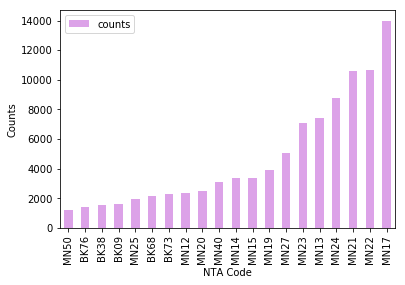

In [345]:
most_popular_ntas.plot.bar(x='nta_code',y='counts',color='#dca2e8')
plt.xlabel('NTA Code')
plt.ylabel('Counts')
plt.savefig('most_circulated_stations.pdf',forma='pdf',dpi=1200)
plt.savefig('most_circulated_stations.png',forma='png',dpi=400)

In [289]:
df_merged

index  tripduration          starttime           stoptime  \
0        9060107           605  08-11-13 16:19:18  08-11-13 16:29:23   
1        3940895           575  04-14-16 01:22:22  04-14-16 01:31:58   
2       24822744           255  10-06-16 20:22:54  10-06-16 20:27:09   
3        3163027           552  12-10-17 15:14:11  12-10-17 15:23:23   
4        3135141           448  06-04-15 00:13:37  06-04-15 00:13:44   
5        9589714           667  04-20-16 15:30:29  04-20-16 15:41:37   
6        3914299           472  05-15-14 15:12:36  05-15-14 15:20:28   
7         802559          1025  06-08-18 06:36:37  06-08-18 06:53:43   
8       14104298           889  05-20-17 14:17:45  05-20-17 14:32:34   
9        7639586           921  11-06-14 00:12:04  11-06-14 00:27:25   
10        471595          1569  10-02-15 07:45:24  10-02-15 08:11:33   
11       2991766          1408  08-10-19 13:25:14  08-10-19 13:48:42   
12      26834741           405  10-14-19 17:14:45  10-14-19 17:21:31   
13       9085042           386  04-25-15 16:08:09  04-25-15 16:14:35   
14       2926674           569  07-08-15 06:35:01  07-08-15 06:44:30   
15      13785359          1728  12-09-15 17:08:36  12-09-15 17:37:25   
16       3985551           687  02-09-19 21:13:17  02-09-19 21:24:44   
17      26666367           185  04-08-19 20:33:42  04-08-19 20:36:47   
18       4144286           482  06-03-16 16:09:26  06-03-16 16:17:29   
19       3922581          1547  10-31-14 20:52:20  10-31-14 21:18:07   
20       3984377           241  12-25-18 13:29:26  12-25-18 13:33:28   
21       4155155           416  12-11-16 21:09:15  12-11-16 21:16:12   
22        465314           444  05-20-15 13:52:46  05-20-15 14:00:11   
23       9409106           312  11-18-17 14:25:48  11-18-17 14:31:01   
24      21241383          1335  03-07-16 09:31:04  03-07-16 09:53:20   
25      10007134           985  05-21-17 13:44:15  05-21-17 14:00:40   
26      10739388           536  03-18-18 13:58:12  03-18-18 14:07:09   
27       9431632          1328  10-07-19 15:43:53  10-07-19 16:06:01   
28       9347281           594  04-14-18 13:24:00  04-14-18 13:33:55   
29       7644727           582  06-24-15 00:18:04  06-24-15 00:18:14   
...          ...           ...                ...                ...   
106378  25811235          1202  07-13-19 13:13:13  07-13-19 13:33:16   
106379  23563645            78  07-27-16 05:55:53  07-27-16 05:57:12   
106380  25811455          1075  08-20-19 15:49:57  08-20-19 16:07:52   
106381  18587019           744  06-22-13 09:30:48  06-22-13 09:43:12   
106382  18587035           651  06-25-13 09:27:33  06-25-13 09:38:24   
106383  25809090          1954  06-26-18 18:39:37  06-26-18 19:12:11   
106384  25808502          1319  04-21-18 12:17:36  04-21-18 12:39:36   
106385  25808825          1592  06-01-18 22:32:38  06-01-18 22:59:10   
106386  25809912          2326  09-29-18 16:33:44  09-29-18 17:12:31   
106387  25808031          2672  12-05-17 18:32:03  12-05-17 19:16:36   
106388  25811727           745  10-06-19 01:12:56  10-06-19 01:25:21   
106389  25809989          1711  10-07-18 14:27:40  10-07-18 14:56:11   
106390  25807850          2154  11-01-17 22:25:54  11-01-17 23:01:48   
106391  25811326            89  07-27-19 23:26:04  07-27-19 23:27:34   
106392  25808124          2157  01-11-18 10:17:35  01-11-18 10:53:33   
106393  25809618           319  08-22-18 12:44:52  08-22-18 12:50:11   
106394  25813630          3504  10-01-19 18:13:33  10-01-19 19:11:57   
106395  25810868          2291  05-16-19 18:31:36  05-16-19 19:09:47   
106396  25809205          1292  07-08-18 15:54:18  07-08-18 16:15:51   
106397  25811962           931  08-27-17 11:53:57  08-27-17 12:09:28   
106398  26477248          1303  09-01-19 15:42:42  09-01-19 16:04:25   
106399  26476447          2695  09-02-18 12:29:00  09-02-18 13:13:56   
106400  26477070          1131  07-20-19 18:21:22  07-20-19 18:40:14   
106401  26477290          2047  09-09-19 12:32:45  

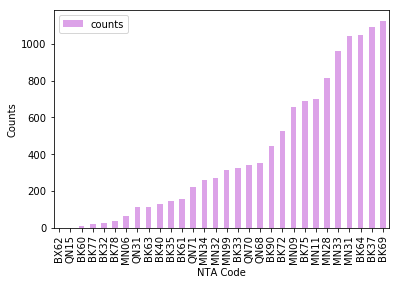

In [301]:
least_popular_ntas = borough_distrib.sort_values(by='counts').iloc[:30]
least_popular_ntas.plot.bar(x='nta_code',y='counts',color='#dca2e8')
plt.xlabel('NTA Code')
plt.ylabel('Counts')
plt.savefig('least_circulated_stations.pdf',forma='pdf',dpi=1200)

In [307]:
# rides vs median income
# make dictionary of code to median_income
nta_to_income = {}
for item,row in df_demo.iterrows():
    nta_to_income[row.nta_code] = row.median_income


In [309]:
def convert_to_income(x):
    return nta_to_income(x)

    

nta_code  counts
20     BX62       1
45     QN15       1
7      BK60       8
17     BK77      22
1      BK32      26
18     BK78      39
21     MN06      67
46     QN31     111
9      BK63     116
6      BK40     132
3      BK35     148
8      BK61     156
49     QN71     220
41     MN34     263
39     MN32     269
44     MN99     317
2      BK33     326
48     QN70     340
47     QN68     352
19     BK90     444
13     BK72     526
22     MN09     658
15     BK75     688
23     MN11     701
37     MN28     812
40     MN33     960
38     MN31    1041
10     BK64    1047
4      BK37    1089
12     BK69    1125
43     MN50    1244
16     BK76    1402
5      BK38    1578
0      BK09    1590
35     MN25    1983
11     BK68    2125
14     BK73    2279
24     MN12    2383
30     MN20    2476
42     MN40    3077
26     MN14    3356
27     MN15    3393
29     MN19    3918
36     MN27    5092
33     MN23    7075
25     MN13    7412
34     MN24    8761
31     MN21   10586
32     MN22   10687
28     MN17   13986

In [310]:
df_borough = borough_distrib.sort_values(by='counts')

In [320]:
ride_counts = []
income =[]
for item, row in df_borough.iterrows():
    ride_counts.append(row.counts)
    income.append(nta_to_income[row.nta_code])

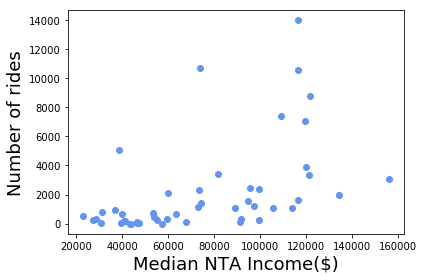

In [344]:
plt.plot(income,ride_counts,marker='o',linewidth=0,color='cornflowerblue')
plt.ylabel('Number of rides',fontsize=18)
plt.xlabel('Median NTA Income($)',fontsize=18)
plt.savefig('num_rides.pdf',format='pdf',dpi=1200)
plt.tight_layout()
plt.savefig('num_rides.png',format='png',dpi=400)

In [330]:
df_merged

index  tripduration          starttime           stoptime  \
0        9060107           605  08-11-13 16:19:18  08-11-13 16:29:23   
1        3940895           575  04-14-16 01:22:22  04-14-16 01:31:58   
2       24822744           255  10-06-16 20:22:54  10-06-16 20:27:09   
3        3163027           552  12-10-17 15:14:11  12-10-17 15:23:23   
4        3135141           448  06-04-15 00:13:37  06-04-15 00:13:44   
5        9589714           667  04-20-16 15:30:29  04-20-16 15:41:37   
6        3914299           472  05-15-14 15:12:36  05-15-14 15:20:28   
7         802559          1025  06-08-18 06:36:37  06-08-18 06:53:43   
8       14104298           889  05-20-17 14:17:45  05-20-17 14:32:34   
9        7639586           921  11-06-14 00:12:04  11-06-14 00:27:25   
10        471595          1569  10-02-15 07:45:24  10-02-15 08:11:33   
11       2991766          1408  08-10-19 13:25:14  08-10-19 13:48:42   
12      26834741           405  10-14-19 17:14:45  10-14-19 17:21:31   
13       9085042           386  04-25-15 16:08:09  04-25-15 16:14:35   
14       2926674           569  07-08-15 06:35:01  07-08-15 06:44:30   
15      13785359          1728  12-09-15 17:08:36  12-09-15 17:37:25   
16       3985551           687  02-09-19 21:13:17  02-09-19 21:24:44   
17      26666367           185  04-08-19 20:33:42  04-08-19 20:36:47   
18       4144286           482  06-03-16 16:09:26  06-03-16 16:17:29   
19       3922581          1547  10-31-14 20:52:20  10-31-14 21:18:07   
20       3984377           241  12-25-18 13:29:26  12-25-18 13:33:28   
21       4155155           416  12-11-16 21:09:15  12-11-16 21:16:12   
22        465314           444  05-20-15 13:52:46  05-20-15 14:00:11   
23       9409106           312  11-18-17 14:25:48  11-18-17 14:31:01   
24      21241383          1335  03-07-16 09:31:04  03-07-16 09:53:20   
25      10007134           985  05-21-17 13:44:15  05-21-17 14:00:40   
26      10739388           536  03-18-18 13:58:12  03-18-18 14:07:09   
27       9431632          1328  10-07-19 15:43:53  10-07-19 16:06:01   
28       9347281           594  04-14-18 13:24:00  04-14-18 13:33:55   
29       7644727           582  06-24-15 00:18:04  06-24-15 00:18:14   
...          ...           ...                ...                ...   
106378  25811235          1202  07-13-19 13:13:13  07-13-19 13:33:16   
106379  23563645            78  07-27-16 05:55:53  07-27-16 05:57:12   
106380  25811455          1075  08-20-19 15:49:57  08-20-19 16:07:52   
106381  18587019           744  06-22-13 09:30:48  06-22-13 09:43:12   
106382  18587035           651  06-25-13 09:27:33  06-25-13 09:38:24   
106383  25809090          1954  06-26-18 18:39:37  06-26-18 19:12:11   
106384  25808502          1319  04-21-18 12:17:36  04-21-18 12:39:36   
106385  25808825          1592  06-01-18 22:32:38  06-01-18 22:59:10   
106386  25809912          2326  09-29-18 16:33:44  09-29-18 17:12:31   
106387  25808031          2672  12-05-17 18:32:03  12-05-17 19:16:36   
106388  25811727           745  10-06-19 01:12:56  10-06-19 01:25:21   
106389  25809989          1711  10-07-18 14:27:40  10-07-18 14:56:11   
106390  25807850          2154  11-01-17 22:25:54  11-01-17 23:01:48   
106391  25811326            89  07-27-19 23:26:04  07-27-19 23:27:34   
106392  25808124          2157  01-11-18 10:17:35  01-11-18 10:53:33   
106393  25809618           319  08-22-18 12:44:52  08-22-18 12:50:11   
106394  25813630          3504  10-01-19 18:13:33  10-01-19 19:11:57   
106395  25810868          2291  05-16-19 18:31:36  05-16-19 19:09:47   
106396  25809205          1292  07-08-18 15:54:18  07-08-18 16:15:51   
106397  25811962           931  08-27-17 11:53:57  08-27-17 12:09:28   
106398  26477248          1303  09-01-19 15:42:42  09-01-19 16:04:25   
106399  26476447          2695  09-02-18 12:29:00  09-02-18 13:13:56   
106400  26477070          1131  07-20-19 18:21:22  07-20-19 18:40:14   
106401  26477290          2047  09-09-19 12:32:45  

In [342]:
df_nyc_all['starttime']

tripduration          starttime           stoptime  \
0                 2059  06-01-13 00:00:44  06-01-13 00:35:03   
1                  977  06-01-13 03:26:18  06-01-13 03:42:35   
2                 1344  06-01-13 04:15:42  06-01-13 04:38:06   
3                  636  06-01-13 07:12:30  06-01-13 07:23:06   
4                  572  06-01-13 12:41:51  06-01-13 12:51:23   
5                 1568  06-01-13 16:28:03  06-01-13 16:54:11   
6                  982  06-01-13 17:40:57  06-01-13 17:57:19   
7                 1147  06-01-13 21:25:26  06-01-13 21:44:33   
8                  648  06-02-13 01:04:07  06-02-13 01:14:55   
9                  511  06-02-13 02:21:38  06-02-13 02:30:09   
10                1660  06-02-13 10:39:41  06-02-13 11:07:21   
11                 679  06-02-13 11:46:44  06-02-13 11:58:03   
12                 496  06-02-13 12:01:29  06-02-13 12:09:45   
13                1035  06-02-13 12:03:36  06-02-13 12:20:51   
14                1518  06-02-13 12:26:55  06-02-13 12:52:13   
15                 478  06-02-13 12:37:59  06-02-13 12:45:57   
16                 758  06-02-13 13:02:24  06-02-13 13:15:02   
17                 517  06-02-13 13:22:12  06-02-13 13:30:49   
18                 950  06-02-13 13:30:17  06-02-13 13:46:07   
19                 771  06-02-13 13:33:03  06-02-13 13:45:54   
20                1256  06-02-13 13:39:19  06-02-13 14:00:15   
21                 578  06-02-13 14:34:36  06-02-13 14:44:14   
22                2477  06-02-13 15:05:18  06-02-13 15:46:35   
23                4962  06-02-13 15:17:11  06-02-13 16:39:53   
24                 767  06-02-13 15:34:06  06-02-13 15:46:53   
25                1265  06-02-13 15:46:49  06-02-13 16:07:54   
26                 670  06-02-13 16:01:50  06-02-13 16:13:00   
27                 985  06-02-13 16:13:36  06-02-13 16:30:01   
28                1605  06-02-13 16:24:15  06-02-13 16:51:00   
29                 450  06-02-13 16:30:39  06-02-13 16:38:09   
...                ...                ...                ...   
27214491           941  11-28-19 15:21:35  11-28-19 15:37:16   
27214492           887  11-28-19 15:22:04  11-28-19 15:36:52   
27214493           659  11-28-19 16:17:59  11-28-19 16:28:58   
27214494           254  11-29-19 09:37:04  11-29-19 09:41:19   
27214495           428  11-29-19 10:02:18  11-29-19 10:09:27   
27214496           306  11-29-19 11:24:47  11-29-19 11:29:53   
27214497          1568  11-29-19 12:00:36  11-29-19 12:26:44   
27214498           842  11-29-19 13:05:35  11-29-19 13:19:38   
27214499          1693  11-29-19 13:10:08  11-29-19 13:38:22   
27214500          1279  11-29-19 14:09:28  11-29-19 14:30:47   
27214501            98  11-29-19 14:20:44  11-29-19 14:22:23   
27214502           215  11-29-19 16:51:08  11-29-19 16:54:44   
27214503            87  11-29-19 17:21:46  11-29-19 17:23:14   
27214504           110  11-29-19 18:25:48  11-29-19 18:27:39   
27214505           737  11-30-19 11:14:05  11-30-19 11:26:22   
27214506          1347  11-30-19 12:29:10  11-30-19 12:51:38   
27214507          1153  11-30-19 12:45:37  11-30-19 13:04:50   
27214508          1240  11-30-19 12:55:46  11-30-19 13:16:27   
27214509           534  11-30-19 15:05:21  11-30-19 15:14:16   
27214510          1288  11-30-19 15:44:10  11-30-19 16:05:38   
27214511          1207  11-30-19 15:45:21  11-30-19 16:05:29   
27214512           636  11-30-19 15:47:42  11-30-19 15:58:18   
27214513          1458  11-30-19 15:48:55  11-30-19 16:13:13   
27214514          1442  11-30-19 15:48:58  11-30-19 16:13:01   
27214515           238  11-30-19 17:47:13  11-30-19 17:51:12   
27214516          2457  11-30-19 18:03:15  11-30-19 18:44:12   
27214517           117  11-30-19 21:40:29  11-30-19 21:42:27   
27214518           183  11-28-19 06:22:25  11-28-19 06:25:29   
27214519           851  11-29-19 12:46:27  11-29-19 13:00:38   
27214520          4781  11-29-19 18:32:51  11-29-19 19:52:32   

          start_station_id  end_station_i